In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import math
import warnings
warnings.filterwarnings(action='ignore')
from google.colab import files

**Paper Title**

**Multi Disease Prediction Using Ensembling of Distinct Machine Learning and Deep Learning Classifiers**

In [ ]:
from google.colab import drive
drive.mount("/content/drive")

Mounted at /content/drive


In [ ]:
ckd = pd.read_csv('/content/drive/My Drive/Colab Notebooks/Chronic_Kidney_Disease.csv', delimiter = ',')

In [ ]:
ckd.head()

id   age    bp     sg   al   su     rbc        pc         pcc          ba  \
0   0  48.0  80.0  1.020  1.0  0.0     NaN    normal  notpresent  notpresent   
1   1   7.0  50.0  1.020  4.0  0.0     NaN    normal  notpresent  notpresent   
2   2  62.0  80.0  1.010  2.0  3.0  normal    normal  notpresent  notpresent   
3   3  48.0  70.0  1.005  4.0  0.0  normal  abnormal     present  notpresent   
4   4  51.0  80.0  1.010  2.0  0.0  normal    normal  notpresent  notpresent   

   ...  pcv    wc   rc  htn   dm  cad appet   pe  ane classification  
0  ...   44  7800  5.2  yes  yes   no  good   no   no            ckd  
1  ...   38  6000  NaN   no   no   no  good   no   no            ckd  
2  ...   31  7500  NaN   no  yes   no  poor   no  yes            ckd  
3  ...   32  6700  3.9  yes   no   no  poor  yes  yes            ckd  
4  ...   35  7300  4.6   no   no   no  good   no   no            ckd  

[5 rows x 26 columns]

In [ ]:
ckd_NP = ckd.to_numpy()
print(ckd_NP)

[[0 48.0 80.0 ... 'no' 'no' 'ckd']
 [1 7.0 50.0 ... 'no' 'no' 'ckd']
 [2 62.0 80.0 ... 'no' 'yes' 'ckd']
 ...
 [397 12.0 80.0 ... 'no' 'no' 'notckd']
 [398 17.0 60.0 ... 'no' 'no' 'notckd']
 [399 58.0 80.0 ... 'no' 'no' 'notckd']]


In [ ]:
ckd.shape

(400, 26)

In [ ]:
ckd.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 26 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   id              400 non-null    int64  
 1   age             391 non-null    float64
 2   bp              388 non-null    float64
 3   sg              353 non-null    float64
 4   al              354 non-null    float64
 5   su              351 non-null    float64
 6   rbc             248 non-null    object 
 7   pc              335 non-null    object 
 8   pcc             396 non-null    object 
 9   ba              396 non-null    object 
 10  bgr             356 non-null    float64
 11  bu              381 non-null    float64
 12  sc              383 non-null    float64
 13  sod             313 non-null    float64
 14  pot             312 non-null    float64
 15  hemo            348 non-null    float64
 16  pcv             330 non-null    object 
 17  wc              295 non-null    obj

In [ ]:
ckd.describe()

id         age          bp          sg          al          su  \
count  400.000000  391.000000  388.000000  353.000000  354.000000  351.000000   
mean   199.500000   51.483376   76.469072    1.017408    1.016949    0.450142   
std    115.614301   17.169714   13.683637    0.005717    1.352679    1.099191   
min      0.000000    2.000000   50.000000    1.005000    0.000000    0.000000   
25%     99.750000   42.000000   70.000000    1.010000    0.000000    0.000000   
50%    199.500000   55.000000   80.000000    1.020000    0.000000    0.000000   
75%    299.250000   64.500000   80.000000    1.020000    2.000000    0.000000   
max    399.000000   90.000000  180.000000    1.025000    5.000000    5.000000   

              bgr          bu          sc         sod         pot        hemo  
count  356.000000  381.000000  383.000000  313.000000  312.000000  348.000000  
mean   148.036517   57.425722    3.072454  137.528754    4.627244   12.526437  
std     79.281714   50.503006    5.741126   10.408752    3.193904    2.912587  
min     22.000000    1.500000    0.400000    4.500000    2.500000    3.100000  
25%     99.000000   27.000000    0.900000  135.000000    3.800000   10.300000  
50%    121.000000   42.000000    1.300000  138.000000    4.400000   12.650000  
75%    163.000000   66.000000    2.800000  142.000000    4.900000   15.000000  
max    490.000000  391.000000   76.000000  163.000000   47.000000   17.800000

In [ ]:
ckd = ckd.rename(columns={
    'id':'Id',
    "age":'Age',
    "bp":"blood_pressure",
    "sg":"specific_gravity",
    "al":"albumin",
    "su":"sugar",
    "rbc":"red_blood_cells",
    "pc":"pus_cell",
    "pcc":"pus_cell_clumps",
    "ba":"bacteria",
    "bgr":"blood_glucose_random",
    "bu":"blood_urea",
    "sc":"serum_creatinine",
    "sod":"sodium",
    "pot":"potassium",
    "hemo":"hemoglobin",
    "pcv":"packed_cell_volume",
    "wc":"white_blood_cell_count",
    "rc":"red_blood_cell_count",
    "htn":"hypertension",
    "dm":"diabetes_mellitus",
    "cad":"coronary_artery_disease",
    "appet":"appetite",
    "pe":"pedal_edema",
    "ane":"anemia",
    'classification': 'Class'
})

In [ ]:
ckd.head(10)

Id   Age  blood_pressure  specific_gravity  albumin  sugar red_blood_cells  \
0   0  48.0            80.0             1.020      1.0    0.0             NaN   
1   1   7.0            50.0             1.020      4.0    0.0             NaN   
2   2  62.0            80.0             1.010      2.0    3.0          normal   
3   3  48.0            70.0             1.005      4.0    0.0          normal   
4   4  51.0            80.0             1.010      2.0    0.0          normal   
5   5  60.0            90.0             1.015      3.0    0.0             NaN   
6   6  68.0            70.0             1.010      0.0    0.0             NaN   
7   7  24.0             NaN             1.015      2.0    4.0          normal   
8   8  52.0           100.0             1.015      3.0    0.0          normal   
9   9  53.0            90.0             1.020      2.0    0.0        abnormal   

   pus_cell pus_cell_clumps    bacteria  ...  packed_cell_volume  \
0    normal      notpresent  notpresent  ...                  44   
1    normal      notpresent  notpresent  ...                  38   
2    normal      notpresent  notpresent  ...                  31   
3  abnormal         present  notpresent  ...                  32   
4    normal      notpresent  notpresent  ...                  35   
5       NaN      notpresent  notpresent  ...                  39   
6    normal      notpresent  notpresent  ...                  36   
7  abnormal      notpresent  notpresent  ...                  44   
8  abnormal         present  notpresent  ...                  33   
9  abnormal         present  notpresent  ...                  29   

   white_blood_cell_count  red_blood_cell_count  hypertension  \
0                    7800                   5.2           yes   
1                    6000                   NaN            no   
2                    7500                   NaN            no   
3                    6700                   3.9           yes   
4                    7300                   4.6            no   
5                    7800                   4.4           yes   
6                     NaN                   NaN            no   
7                    6900                     5            no   
8                    9600                     4           yes   
9                   12100                   3.7           yes   

   diabetes_mellitus  coronary_artery_disease appetite pedal_edema anemia  \
0                yes                       no     good          no     no   
1                 no                       no     good          no     no   
2                yes                       no     poor          no    yes   
3                 no                       no     poor         yes    yes   
4                 no                       no     good          no     no   
5                yes                       no     good         yes     no   
6                 no                       no     good          no     no   
7                yes                       no     good         yes     no   
8                yes                       no     good          no    yes   
9                yes                       no     poor          no    yes   

  Class  
0   ckd  
1   ckd  
2   ckd  
3   ckd  
4   ckd  
5   ckd  
6   ckd  
7   ckd  
8   ckd  
9   ckd  

[10 rows x 26 columns]

In [ ]:
ckd.count()

Id                         400
Age                        391
blood_pressure             388
specific_gravity           353
albumin                    354
sugar                      351
red_blood_cells            248
pus_cell                   335
pus_cell_clumps            396
bacteria                   396
blood_glucose_random       356
blood_urea                 381
serum_creatinine           383
sodium                     313
potassium                  312
hemoglobin                 348
packed_cell_volume         330
white_blood_cell_count     295
red_blood_cell_count       270
hypertension               398
diabetes_mellitus          398
coronary_artery_disease    398
appetite                   399
pedal_edema                399
anemia                     399
Class                      400
dtype: int64

In [ ]:
NumericalColumns = ['Age','blood_pressure','albumin','sugar','blood_glucose_random','blood_urea','serum_creatinine','sodium','potassium','hemoglobin']
CategoricalColumns = ['red_blood_cells','specific_gravity','pus_cell','pus_cell_clumps','bacteria','packed_cell_volume','white_blood_cell_count','red_blood_cell_count','hypertension','diabetes_mellitus','coronary_artery_disease','appetite','pedal_edema','anemia']

In [ ]:
ckd= ckd.drop(['Id'], axis=1)

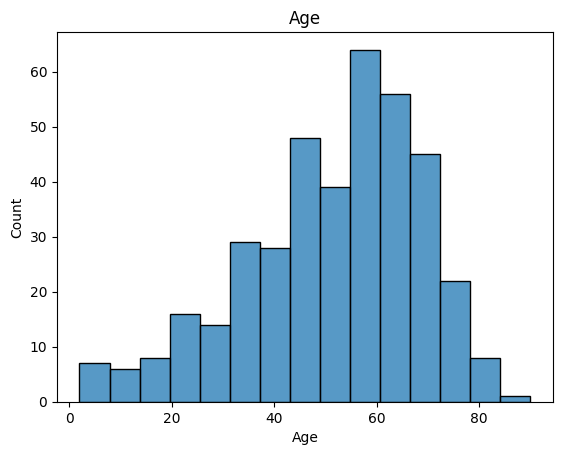

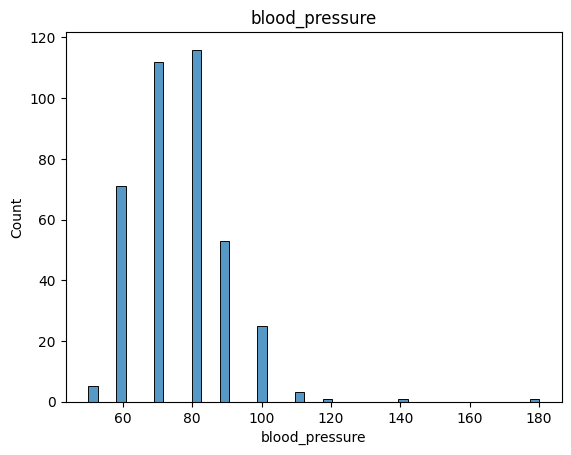

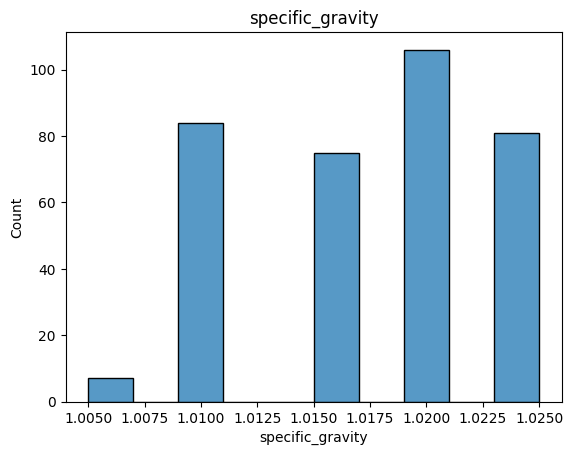

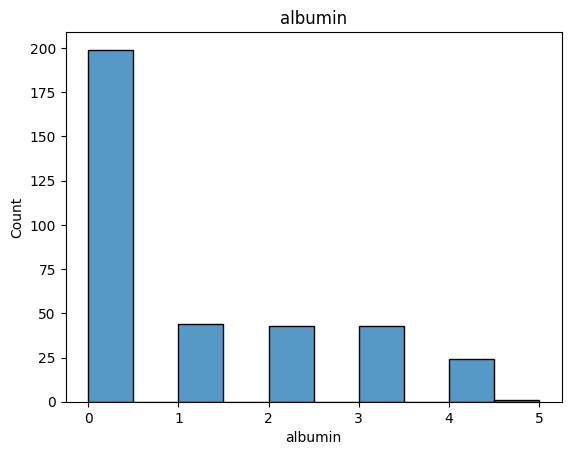

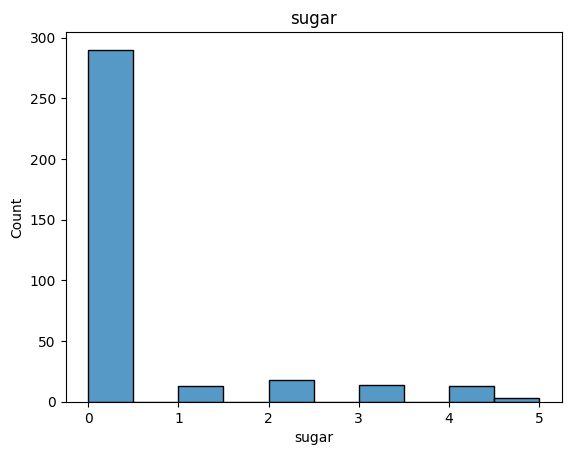

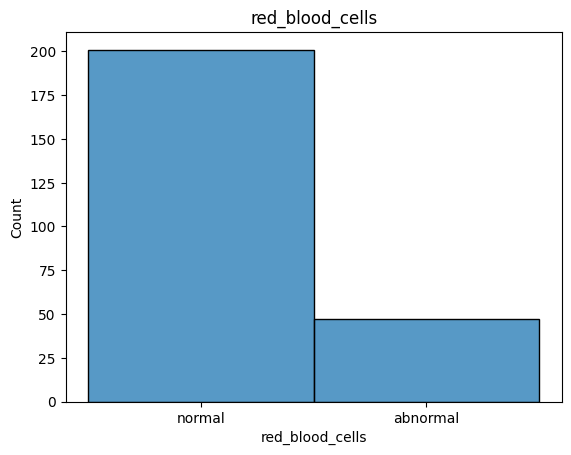

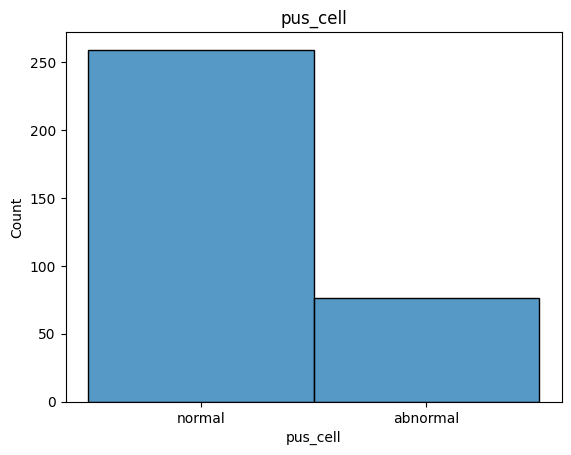

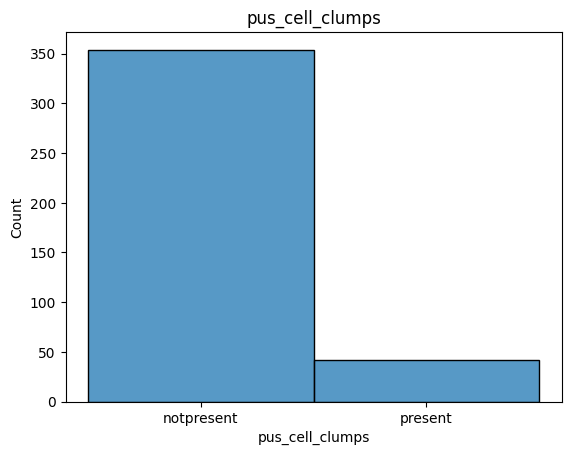

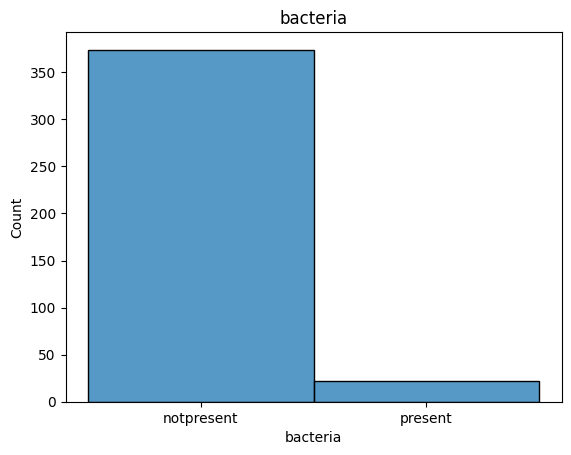

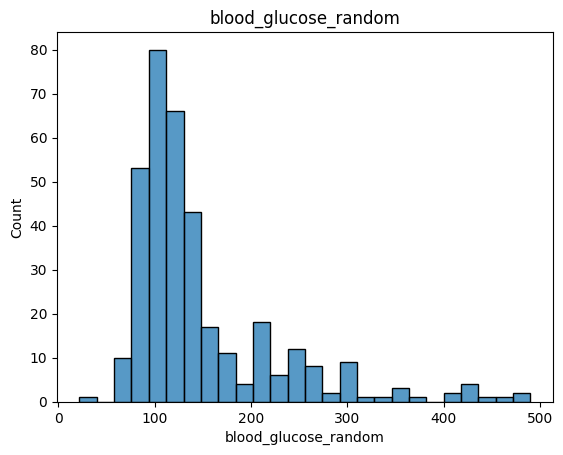

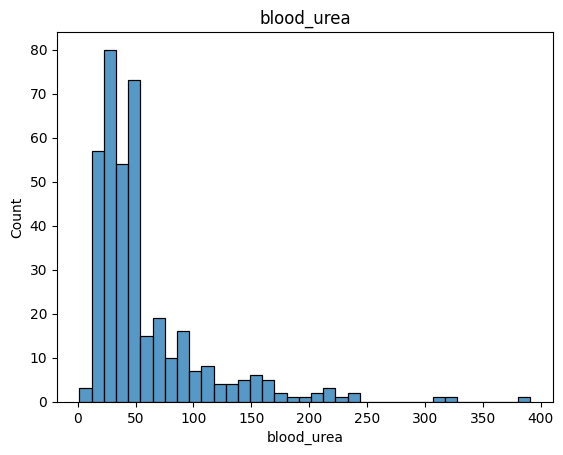

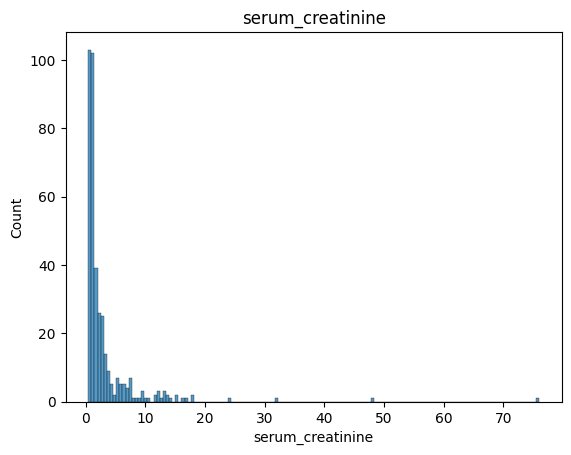

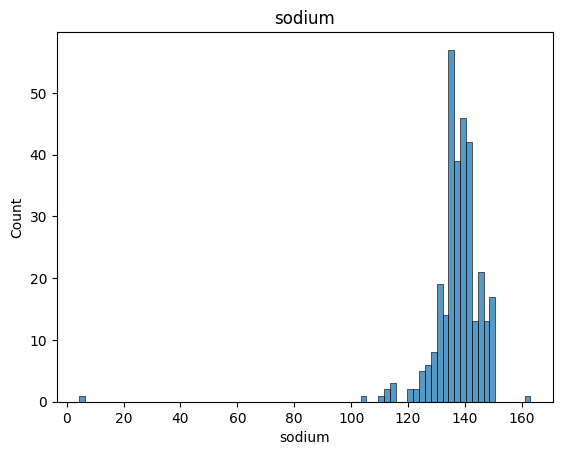

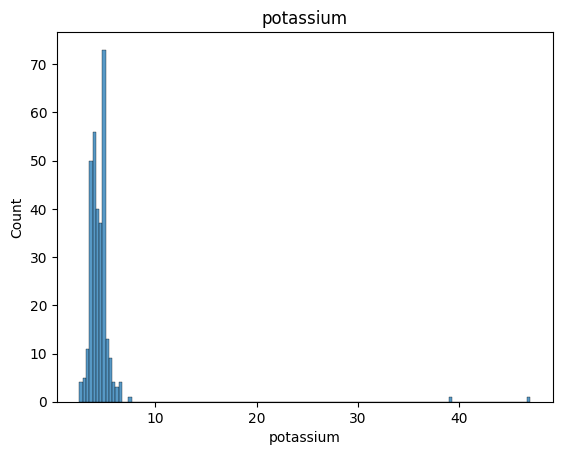

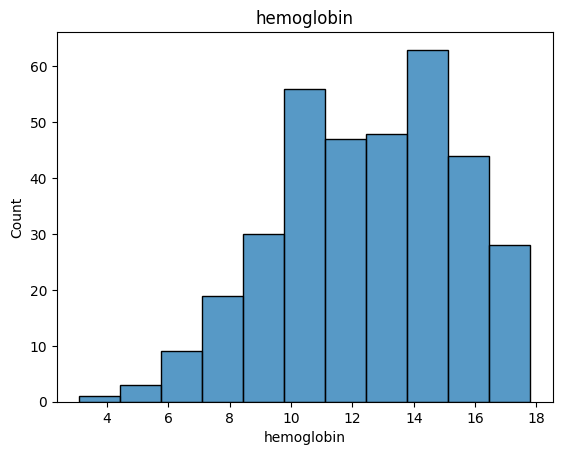

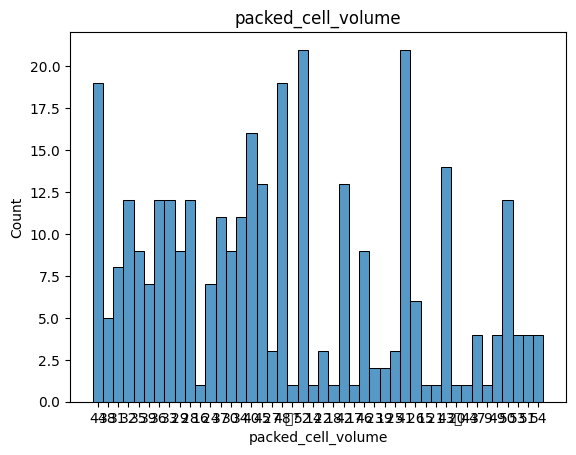

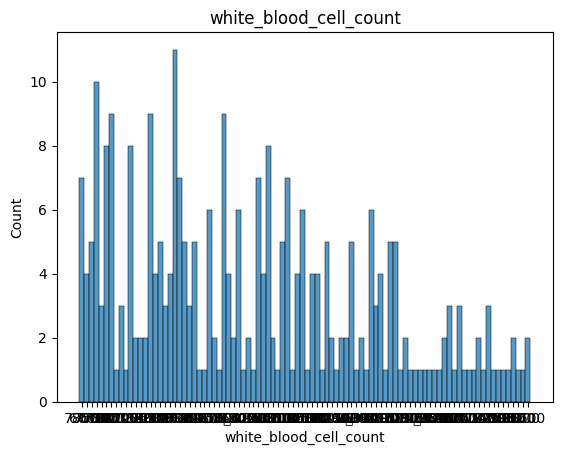

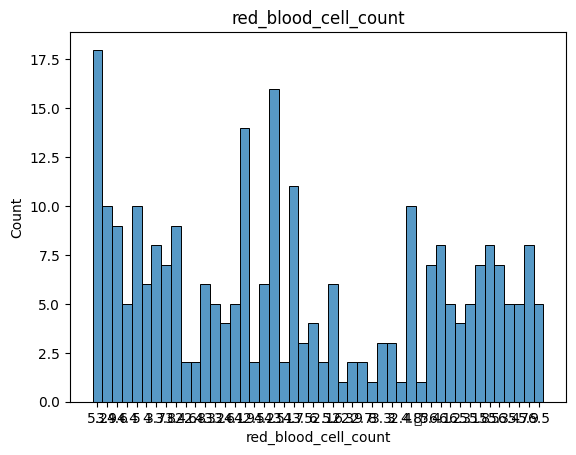

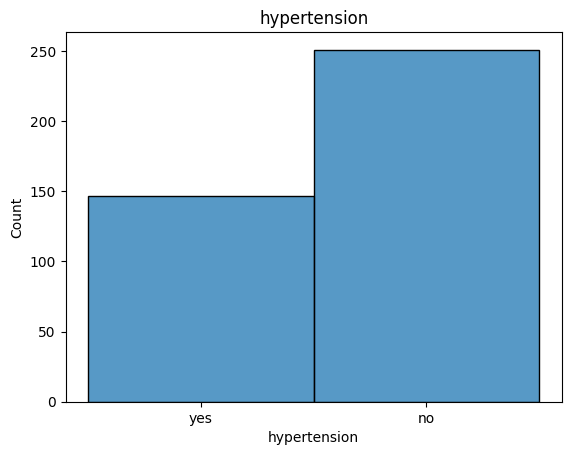

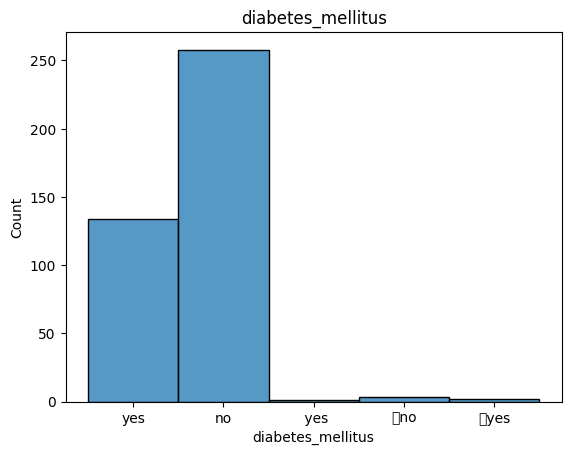

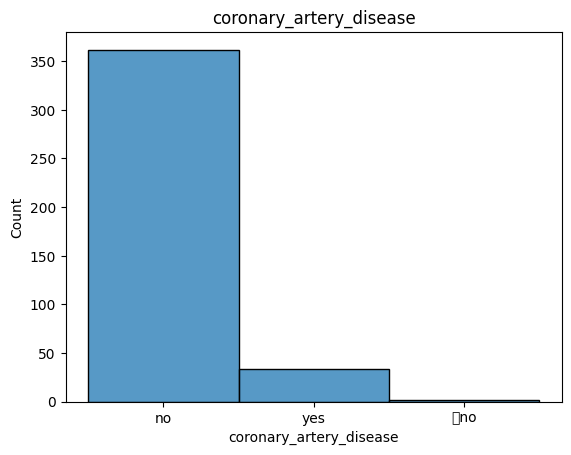

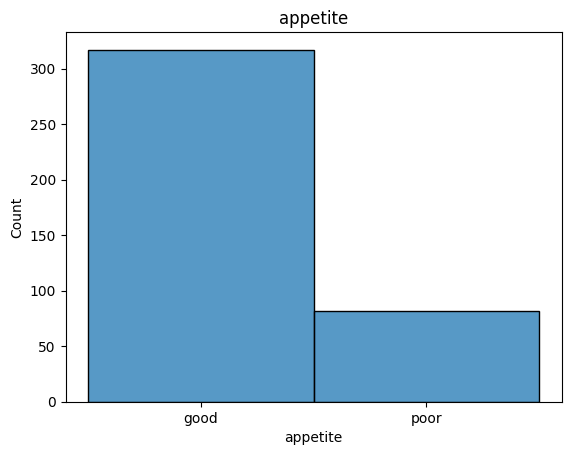

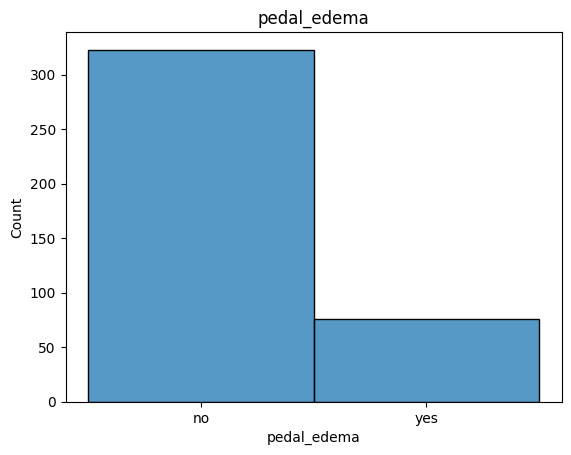

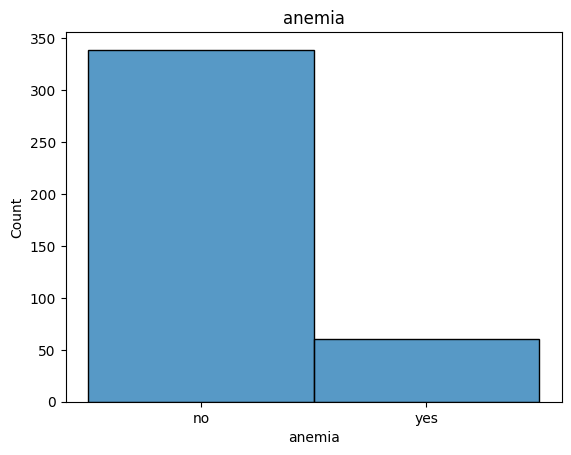

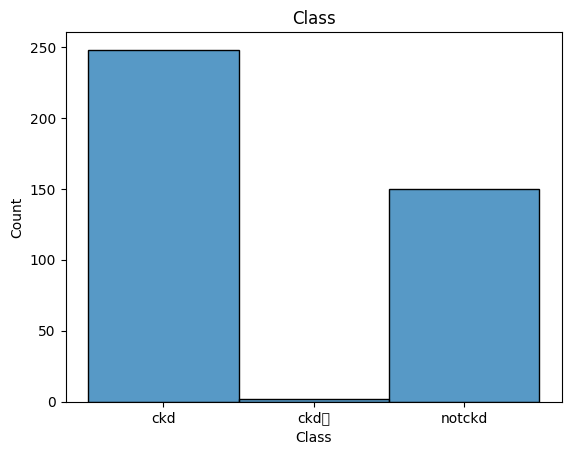

In [ ]:
for columnName in ckd.columns:
    sns.histplot(ckd[columnName])
    plt.title(columnName)
    plt.show()

Checking nulls

In [ ]:
ckd.isnull().sum()

Age                          9
blood_pressure              12
specific_gravity            47
albumin                     46
sugar                       49
red_blood_cells            152
pus_cell                    65
pus_cell_clumps              4
bacteria                     4
blood_glucose_random        44
blood_urea                  19
serum_creatinine            17
sodium                      87
potassium                   88
hemoglobin                  52
packed_cell_volume          70
white_blood_cell_count     105
red_blood_cell_count       130
hypertension                 2
diabetes_mellitus            2
coronary_artery_disease      2
appetite                     1
pedal_edema                  1
anemia                       1
Class                        0
dtype: int64

In [ ]:
#sorting result Desc to read it perfectly
ckd.isnull().sum().sort_values(ascending= False)

red_blood_cells            152
red_blood_cell_count       130
white_blood_cell_count     105
potassium                   88
sodium                      87
packed_cell_volume          70
pus_cell                    65
hemoglobin                  52
sugar                       49
specific_gravity            47
albumin                     46
blood_glucose_random        44
blood_urea                  19
serum_creatinine            17
blood_pressure              12
Age                          9
bacteria                     4
pus_cell_clumps              4
hypertension                 2
diabetes_mellitus            2
coronary_artery_disease      2
appetite                     1
pedal_edema                  1
anemia                       1
Class                        0
dtype: int64

<Axes: >

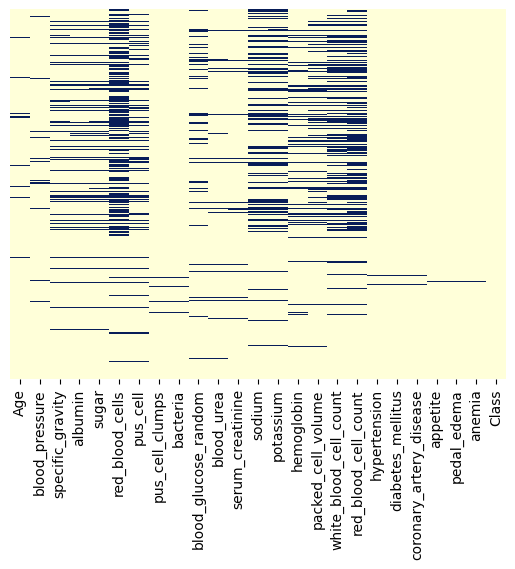

In [ ]:
 sns.heatmap(ckd.isnull(),yticklabels=False,cbar=False,cmap='YlGnBu')

In [ ]:
missing = (ckd.isnull().sum().sort_values(ascending= False))

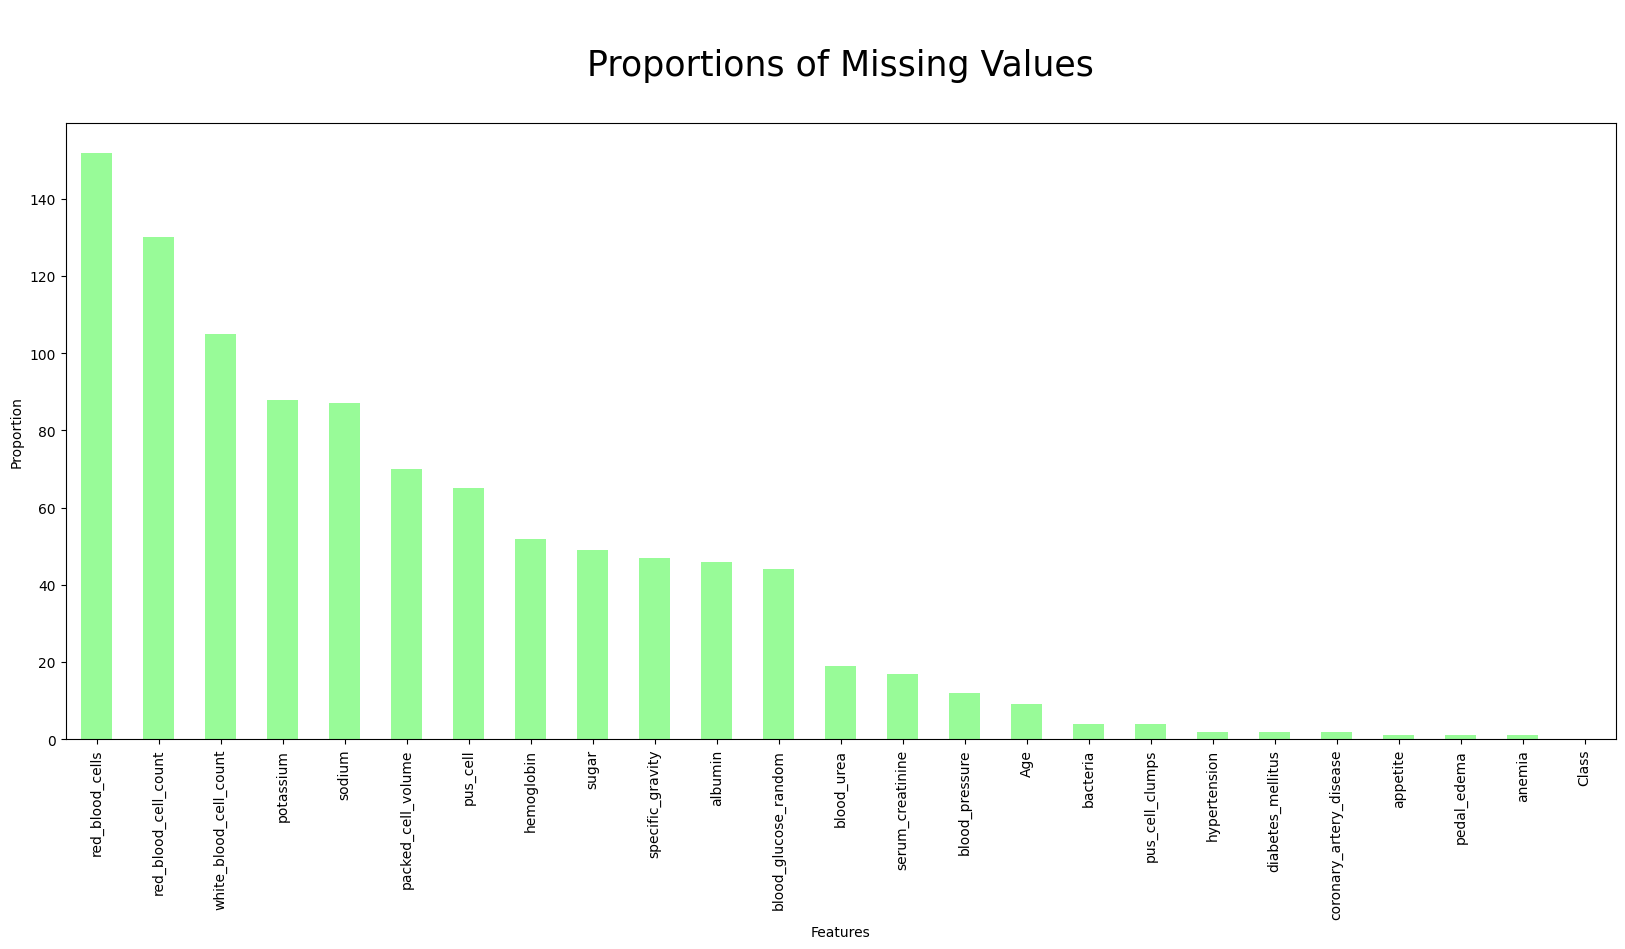

In [ ]:
plt.figure(figsize=(20,8))
missing.plot(kind="bar", color="palegreen")
#The "missing" variable contains the numbers of missing values, so we divide by 400 to get the proportions.
plt.title('\nProportions of Missing Values\n', fontsize=25)
plt.ylabel("Proportion")
plt.xlabel("Features")
plt.show()

#Data Cleaning

In [ ]:
ckd['Class'].unique()

array(['ckd', 'ckd\t', 'notckd'], dtype=object)

In [ ]:
ckd['diabetes_mellitus'].unique()

array(['yes', 'no', ' yes', '\tno', '\tyes', nan], dtype=object)

In [ ]:
# Make loop for this categorical cols to get unique
for col in ['hypertension', 'diabetes_mellitus', 'coronary_artery_disease', 'appetite', 'pedal_edema', 'anemia', 'Class']:
    print(col, ckd[col].unique())

hypertension ['yes' 'no' nan]
diabetes_mellitus ['yes' 'no' ' yes' '\tno' '\tyes' nan]
coronary_artery_disease ['no' 'yes' '\tno' nan]
appetite ['good' 'poor' nan]
pedal_edema ['no' 'yes' nan]
anemia ['no' 'yes' nan]
Class ['ckd' 'ckd\t' 'notckd']


Filling NaN or null values

In [ ]:
stat_data = ckd

In [ ]:
stat_data['Class'].replace("ckd\t","ckd",inplace=True)
stat_data['diabetes_mellitus'].replace(["\tno","\tyes"," yes"],["no","yes","yes"],inplace=True)
stat_data['coronary_artery_disease'].replace(["\tno"],["no"],inplace=True)

In [ ]:
stat_data['red_blood_cell_count'].replace("\t?",np.nan, inplace=True)
stat_data['white_blood_cell_count'].replace("\t?",np.nan, inplace=True)
stat_data['packed_cell_volume'].replace(["\t?","\t43"],np.nan, inplace=True)

Data Encoding

In [ ]:
cleaning_data = {
    'red_blood_cells': {'normal': 1, 'abnormal': 0},
    'pus_cell': {'normal': 1, 'abnormal': 0},
    'pus_cell_clumps': {'present': 1, 'notpresent': 0},
    'bacteria': {'present': 1, 'notpresent': 0},
    'hypertension': {'yes': 1, 'no': 0},
    'diabetes_mellitus': {'yes': 1, 'no': 0},
    'coronary_artery_disease': {'yes': 1, 'no': 0},
    'appetite': {'good': 1, 'poor': 0},
    'pedal_edema': {'yes': 1, 'no': 0},
    'anemia': {'yes': 1, 'no': 0},
    'Class': {'ckd': 1 , 'notckd': 0},
    'white_blood_cell_count':{'\t6200': 6200, '\t8400': 8400}
}

stat_data.replace(cleaning_data, inplace=True)

Filling missing values

Filling missing values in categorical columns with the mode ( ) for dealing with missing data in categorical variables


Filling missing values in numerical columns with the mean ( ) for dealing with missing data in numerical variables

In [ ]:
for columnName in CategoricalColumns:
    stat_data[columnName].fillna(stat_data[columnName].mode()[0], inplace=True)

In [ ]:
for columnName in NumericalColumns:
    stat_data[columnName].fillna(stat_data[columnName].mean(), inplace=True)

In [ ]:
stat_data.isnull().sum()

Age                        0
blood_pressure             0
specific_gravity           0
albumin                    0
sugar                      0
red_blood_cells            0
pus_cell                   0
pus_cell_clumps            0
bacteria                   0
blood_glucose_random       0
blood_urea                 0
serum_creatinine           0
sodium                     0
potassium                  0
hemoglobin                 0
packed_cell_volume         0
white_blood_cell_count     0
red_blood_cell_count       0
hypertension               0
diabetes_mellitus          0
coronary_artery_disease    0
appetite                   0
pedal_edema                0
anemia                     0
Class                      0
dtype: int64

In [ ]:
stat_data.head(10)

Age  blood_pressure  specific_gravity  albumin  sugar  red_blood_cells  \
0  48.0       80.000000             1.020      1.0    0.0              1.0   
1   7.0       50.000000             1.020      4.0    0.0              1.0   
2  62.0       80.000000             1.010      2.0    3.0              1.0   
3  48.0       70.000000             1.005      4.0    0.0              1.0   
4  51.0       80.000000             1.010      2.0    0.0              1.0   
5  60.0       90.000000             1.015      3.0    0.0              1.0   
6  68.0       70.000000             1.010      0.0    0.0              1.0   
7  24.0       76.469072             1.015      2.0    4.0              1.0   
8  52.0      100.000000             1.015      3.0    0.0              1.0   
9  53.0       90.000000             1.020      2.0    0.0              0.0   

   pus_cell  pus_cell_clumps  bacteria  blood_glucose_random  ...  \
0       1.0              0.0       0.0            121.000000  ...   
1       1.0              0.0       0.0            148.036517  ...   
2       1.0              0.0       0.0            423.000000  ...   
3       0.0              1.0       0.0            117.000000  ...   
4       1.0              0.0       0.0            106.000000  ...   
5       1.0              0.0       0.0             74.000000  ...   
6       1.0              0.0       0.0            100.000000  ...   
7       0.0              0.0       0.0            410.000000  ...   
8       0.0              1.0       0.0            138.000000  ...   
9       0.0              1.0       0.0             70.000000  ...   

   packed_cell_volume  white_blood_cell_count  red_blood_cell_count  \
0                  44                    7800                   5.2   
1                  38                    6000                   5.2   
2                  31                    7500                   5.2   
3                  32                    6700                   3.9   
4                  35                    7300                   4.6   
5                  39                    7800                   4.4   
6                  36                    9800                   5.2   
7                  44                    6900                     5   
8                  33                    9600                     4   
9                  29                   12100                   3.7   

   hypertension  diabetes_mellitus coronary_artery_disease appetite  \
0           1.0                1.0                     0.0      1.0   
1           0.0                0.0                     0.0      1.0   
2           0.0                1.0                     0.0      0.0   
3           1.0                0.0                     0.0      0.0   
4           0.0                0.0                     0.0      1.0   
5           1.0                1.0                     0.0      1.0   
6           0.0                0.0                     0.0      1.0   
7           0.0                1.0                     0.0      1.0   
8           1.0                1.0                     0.0      1.0   
9           1.0                1.0                     0.0      0.0   

  pedal_edema  anemia  Class  
0         0.0     0.0      1  
1         0.0     0.0      1  
2         0.0     1.0      1  
3         1.0     1.0      1  
4         0.0     0.0      1  
5         1.0     0.0      1  
6         0.0     0.0      1  
7         1.0     0.0      1  
8         0.0     1.0      1  
9         0.0     1.0      1  

[10 rows x 25 columns]

In [ ]:
stat_data.head(100)

Age  blood_pressure  specific_gravity   albumin     sugar  \
0   48.0            80.0             1.020  1.000000  0.000000   
1    7.0            50.0             1.020  4.000000  0.000000   
2   62.0            80.0             1.010  2.000000  3.000000   
3   48.0            70.0             1.005  4.000000  0.000000   
4   51.0            80.0             1.010  2.000000  0.000000   
..   ...             ...               ...       ...       ...   
95  62.0            90.0             1.015  1.000000  0.000000   
96  60.0            80.0             1.010  1.000000  1.000000   
97  65.0            60.0             1.015  1.000000  0.000000   
98  50.0           140.0             1.020  1.016949  0.450142   
99  56.0           180.0             1.020  0.000000  4.000000   

    red_blood_cells  pus_cell  pus_cell_clumps  bacteria  \
0               1.0       1.0              0.0       0.0   
1               1.0       1.0              0.0       0.0   
2               1.0       1.0              0.0       0.0   
3               1.0       0.0              1.0       0.0   
4               1.0       1.0              0.0       0.0   
..              ...       ...              ...       ...   
95              1.0       1.0              0.0       0.0   
96              1.0       1.0              0.0       0.0   
97              1.0       1.0              0.0       0.0   
98              1.0       1.0              0.0       0.0   
99              1.0       0.0              0.0       0.0   

    blood_glucose_random  ...  packed_cell_volume  white_blood_cell_count  \
0             121.000000  ...                  44                    7800   
1             148.036517  ...                  38                    6000   
2             423.000000  ...                  31                    7500   
3             117.000000  ...                  32                    6700   
4             106.000000  ...                  35                    7300   
..                   ...  ...                 ...                     ...   
95             94.000000  ...                  41                    9800   
96            172.000000  ...                  36                    9800   
97             91.000000  ...                  32                    9100   
98            101.000000  ...                  18                    5800   
99            298.000000  ...                  32                   10400   

    red_blood_cell_count  hypertension  diabetes_mellitus  \
0                    5.2           1.0                1.0   
1                    5.2           0.0                0.0   
2                    5.2           0.0                1.0   
3                    3.9           1.0                0.0   
4                    4.6           0.0                0.0   
..                   ...           ...                ...   
95                   5.2           1.0                0.0   
96                   5.2           0.0                1.0   
97                     4           1.0                1.0   
98                   2.3           1.0                1.0   
99                   4.2           1.0                1.0   

   coronary_artery_disease appetite pedal_edema  anemia  Class  
0                      0.0      1.0         0.0     0.0      1  
1                      0.0      1.0         0.0     0.0      1  
2                      0.0      0.0         0.0     1.0      1  
3                      0.0      0.0         1.0     1.0      1  
4                      0.0      1.0         0.0     0.0      1  
..                     ...      ...         ...     ...    ...  
95                     0.0      1.0         1.0     1.0      1  
96                     1.0      0.0         0.0     0.0      1  
97                     0.0      0.0         1.0     0.0      1  
98                     0.0      0.0         0.0     1.0      1  
99                     0.0      0.0         1.0     0.0      1  

[100 rows x 25 columns]

In [ ]:
stat_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 25 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Age                      400 non-null    float64
 1   blood_pressure           400 non-null    float64
 2   specific_gravity         400 non-null    float64
 3   albumin                  400 non-null    float64
 4   sugar                    400 non-null    float64
 5   red_blood_cells          400 non-null    float64
 6   pus_cell                 400 non-null    float64
 7   pus_cell_clumps          400 non-null    float64
 8   bacteria                 400 non-null    float64
 9   blood_glucose_random     400 non-null    float64
 10  blood_urea               400 non-null    float64
 11  serum_creatinine         400 non-null    float64
 12  sodium                   400 non-null    float64
 13  potassium                400 non-null    float64
 14  hemoglobin               4

In [ ]:
stat_data['packed_cell_volume'] = stat_data['packed_cell_volume'].replace('[^\d\.]', '', regex=True)
stat_data['white_blood_cell_count'] = stat_data['white_blood_cell_count'].replace('[^\d\.]', '', regex=True)
stat_data['red_blood_cell_count'] = stat_data['red_blood_cell_count'].replace('[^\d\.]', '', regex=True)

In [ ]:
stat_data['packed_cell_volume'] = pd.to_numeric(stat_data['packed_cell_volume'], errors='coerce')
stat_data['white_blood_cell_count'] = pd.to_numeric(stat_data['white_blood_cell_count'], errors='coerce')
stat_data['red_blood_cell_count'] = pd.to_numeric(stat_data['red_blood_cell_count'], errors='coerce')

In [ ]:
stat_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 25 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Age                      400 non-null    float64
 1   blood_pressure           400 non-null    float64
 2   specific_gravity         400 non-null    float64
 3   albumin                  400 non-null    float64
 4   sugar                    400 non-null    float64
 5   red_blood_cells          400 non-null    float64
 6   pus_cell                 400 non-null    float64
 7   pus_cell_clumps          400 non-null    float64
 8   bacteria                 400 non-null    float64
 9   blood_glucose_random     400 non-null    float64
 10  blood_urea               400 non-null    float64
 11  serum_creatinine         400 non-null    float64
 12  sodium                   400 non-null    float64
 13  potassium                400 non-null    float64
 14  hemoglobin               4

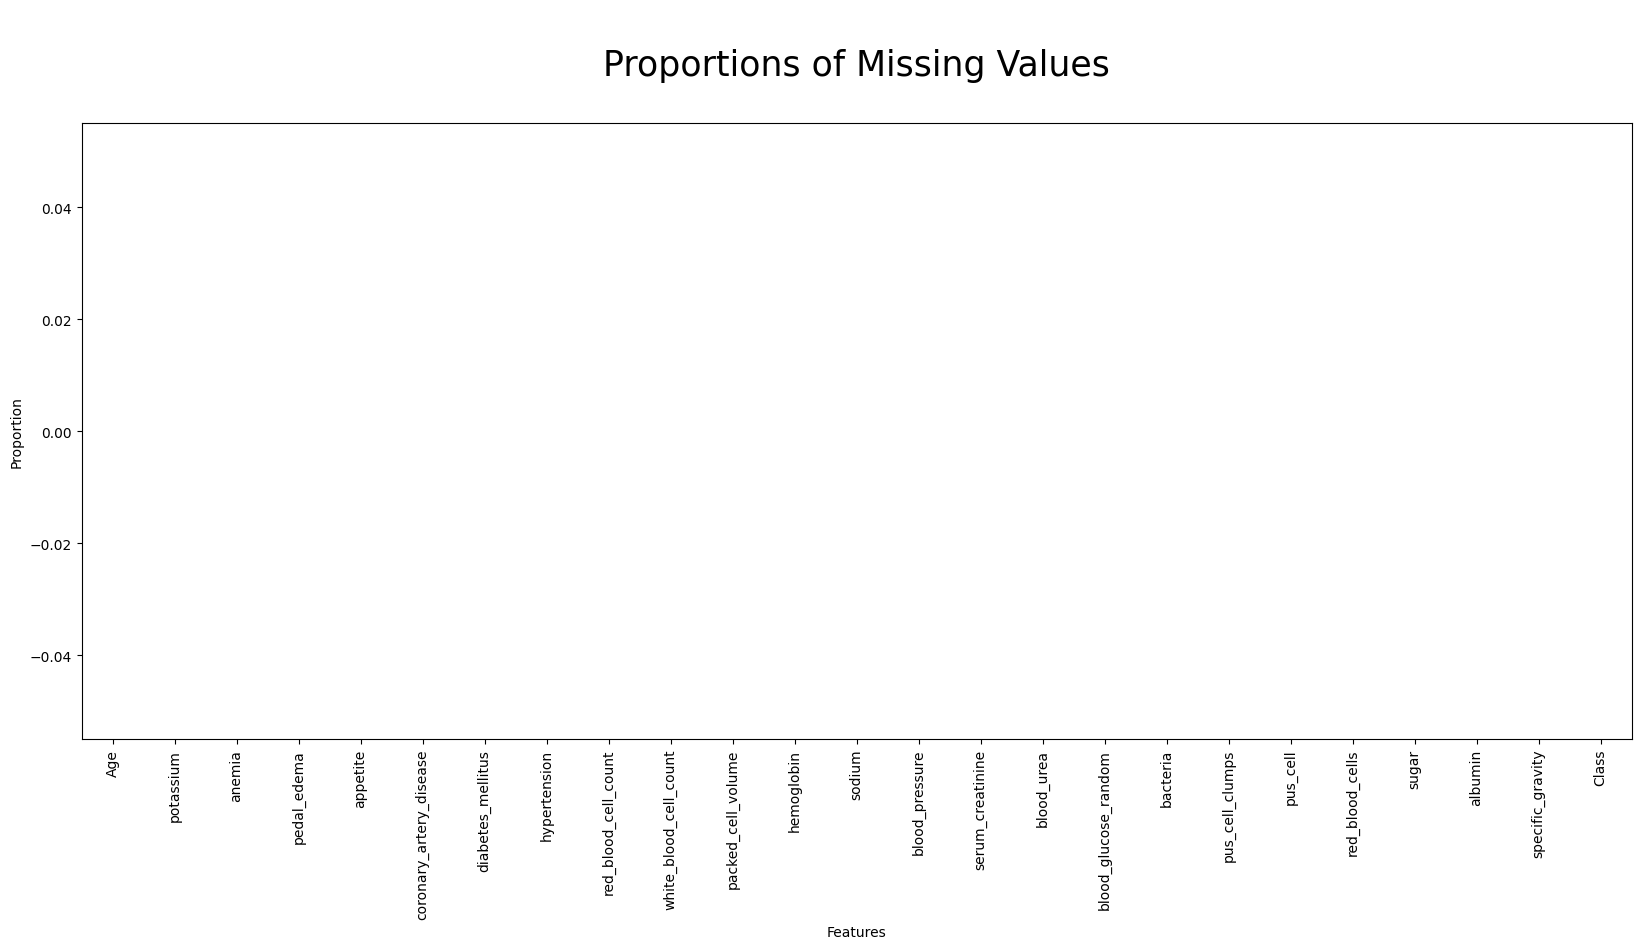

In [ ]:
missing_2 = (stat_data.isnull().sum().sort_values(ascending= False))

plt.figure(figsize=(20,8))
missing_2.plot(kind="bar", color="palegreen")
#The "missing" variable contains the numbers of missing values, so we divide by 400 to get the proportions.
plt.title('\nProportions of Missing Values\n', fontsize=25)
plt.ylabel("Proportion")
plt.xlabel("Features")
plt.show()

In [ ]:
final_ckd=stat_data

In [ ]:
final_ckd.head(10)

Age  blood_pressure  specific_gravity  albumin  sugar  red_blood_cells  \
0  48.0       80.000000             1.020      1.0    0.0              1.0   
1   7.0       50.000000             1.020      4.0    0.0              1.0   
2  62.0       80.000000             1.010      2.0    3.0              1.0   
3  48.0       70.000000             1.005      4.0    0.0              1.0   
4  51.0       80.000000             1.010      2.0    0.0              1.0   
5  60.0       90.000000             1.015      3.0    0.0              1.0   
6  68.0       70.000000             1.010      0.0    0.0              1.0   
7  24.0       76.469072             1.015      2.0    4.0              1.0   
8  52.0      100.000000             1.015      3.0    0.0              1.0   
9  53.0       90.000000             1.020      2.0    0.0              0.0   

   pus_cell  pus_cell_clumps  bacteria  blood_glucose_random  ...  \
0       1.0              0.0       0.0            121.000000  ...   
1       1.0              0.0       0.0            148.036517  ...   
2       1.0              0.0       0.0            423.000000  ...   
3       0.0              1.0       0.0            117.000000  ...   
4       1.0              0.0       0.0            106.000000  ...   
5       1.0              0.0       0.0             74.000000  ...   
6       1.0              0.0       0.0            100.000000  ...   
7       0.0              0.0       0.0            410.000000  ...   
8       0.0              1.0       0.0            138.000000  ...   
9       0.0              1.0       0.0             70.000000  ...   

   packed_cell_volume  white_blood_cell_count  red_blood_cell_count  \
0                  44                    7800                   5.2   
1                  38                    6000                   5.2   
2                  31                    7500                   5.2   
3                  32                    6700                   3.9   
4                  35                    7300                   4.6   
5                  39                    7800                   4.4   
6                  36                    9800                   5.2   
7                  44                    6900                   5.0   
8                  33                    9600                   4.0   
9                  29                   12100                   3.7   

   hypertension  diabetes_mellitus  coronary_artery_disease  appetite  \
0           1.0                1.0                      0.0       1.0   
1           0.0                0.0                      0.0       1.0   
2           0.0                1.0                      0.0       0.0   
3           1.0                0.0                      0.0       0.0   
4           0.0                0.0                      0.0       1.0   
5           1.0                1.0                      0.0       1.0   
6           0.0                0.0                      0.0       1.0   
7           0.0                1.0                      0.0       1.0   
8           1.0                1.0                      0.0       1.0   
9           1.0                1.0                      0.0       0.0   

   pedal_edema  anemia  Class  
0          0.0     0.0      1  
1          0.0     0.0      1  
2          0.0     1.0      1  
3          1.0     1.0      1  
4          0.0     0.0      1  
5          1.0     0.0      1  
6          0.0     0.0      1  
7          1.0     0.0      1  
8          0.0     1.0      1  
9          0.0     1.0      1  

[10 rows x 25 columns]

In [ ]:
def histogram(col):
    plt.figure(figsize=(10, 6))
    sns.histplot(data=final_ckd, x=col, hue="Class", multiple="stack", kde=True)
    plt.xlabel(col)
    plt.ylabel("Count")
    plt.title(f"Histogram of {col} with [CKD - NOtCKD] Classes")
    plt.legend()
    plt.show()

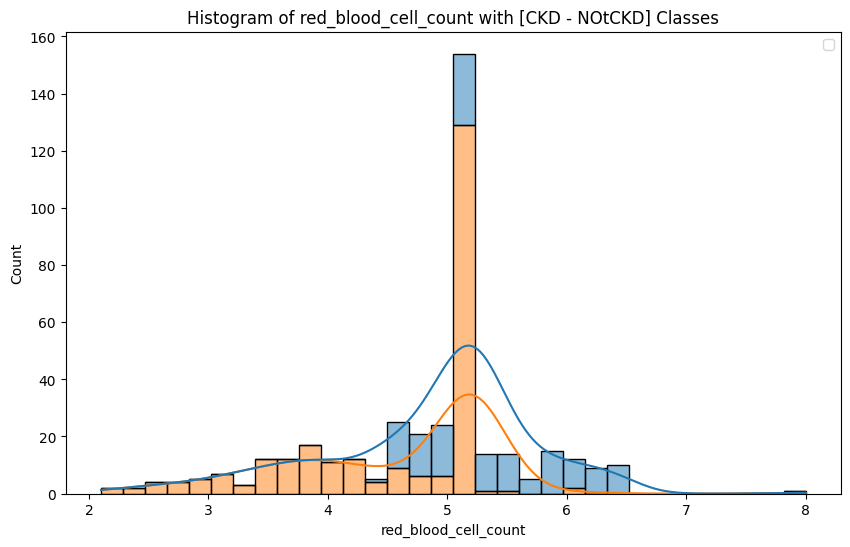

In [ ]:
histogram('red_blood_cell_count')

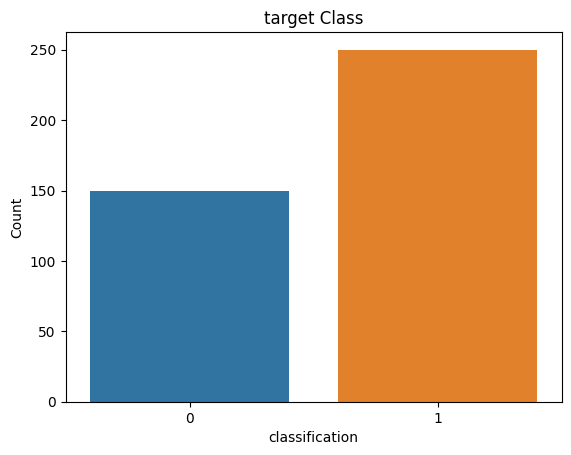

In [ ]:
sns.countplot(x='Class',data=final_ckd)
plt.xlabel("classification")
plt.ylabel("Count")
plt.title("target Class")
plt.show()

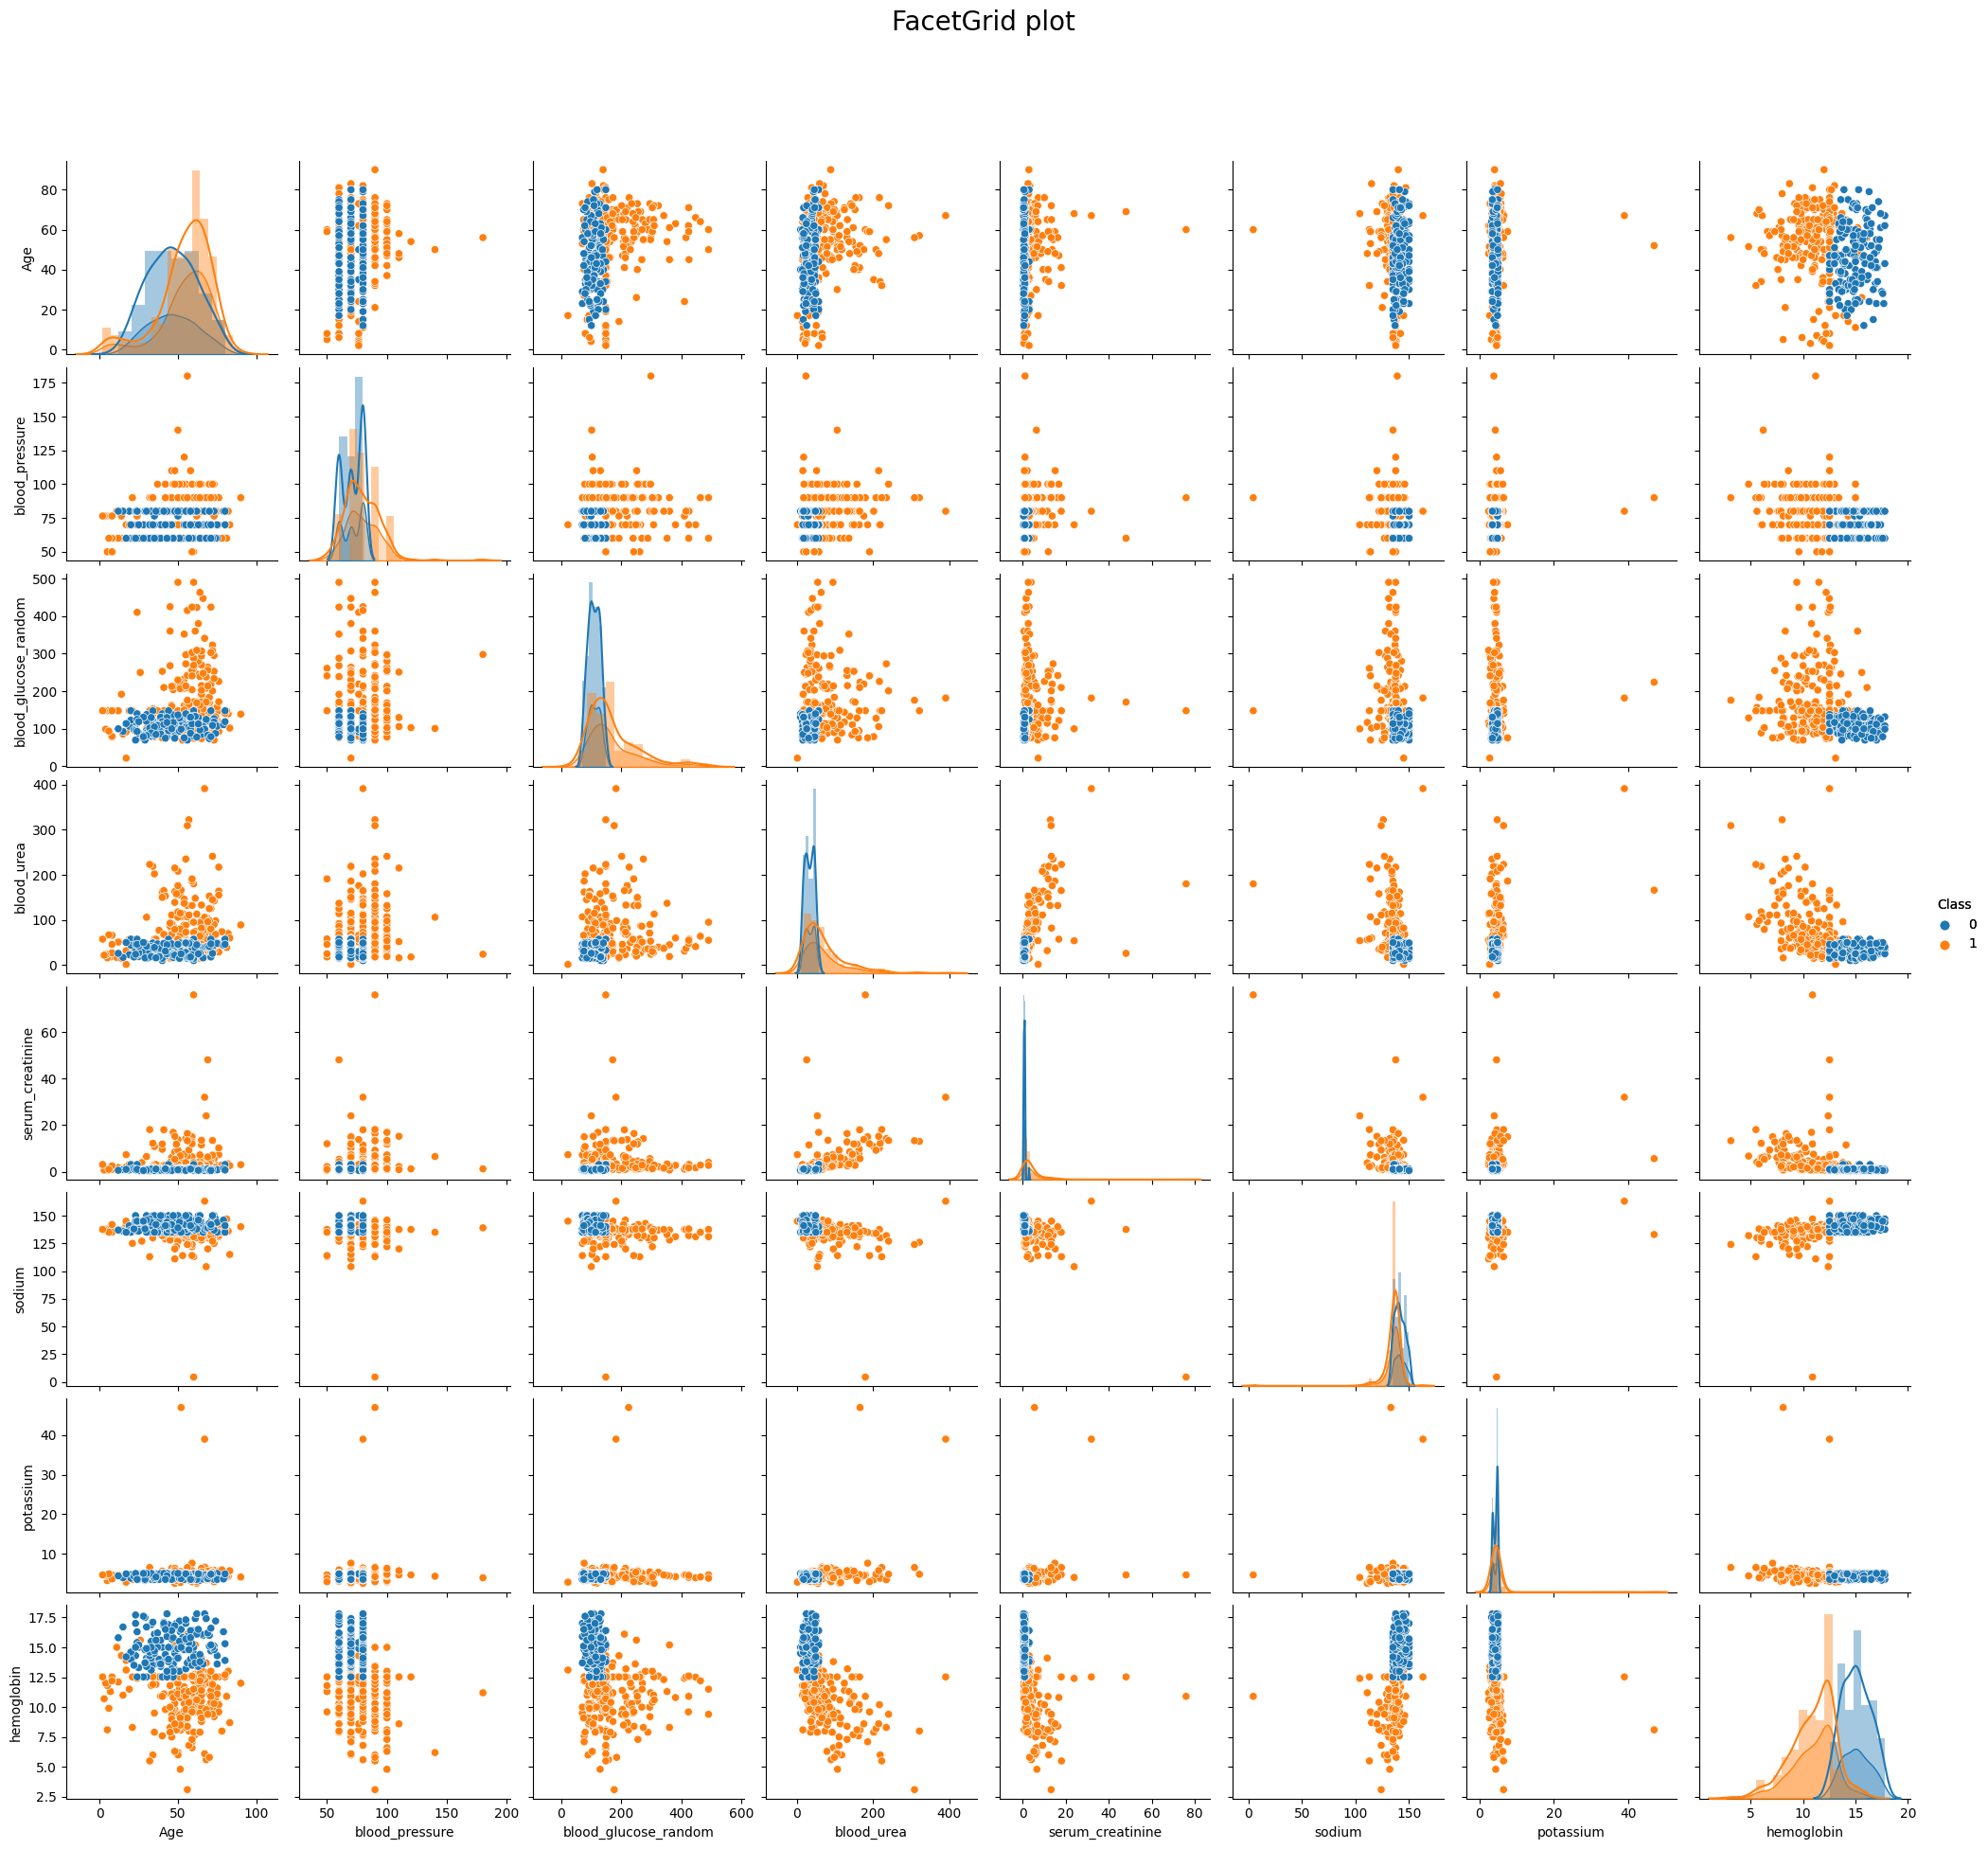

In [ ]:
g = sns.pairplot(final_ckd, vars =['Age', 'blood_pressure','blood_glucose_random', 'blood_urea', 'serum_creatinine','sodium', 'potassium', 'hemoglobin'],hue = 'Class')
g.map_diag(sns.distplot)
g.add_legend()
g.fig.suptitle('FacetGrid plot', fontsize = 20)
g.fig.subplots_adjust(top= 0.9);

In [ ]:
final_ckd[final_ckd['Class'] == 1 ].describe()

Age  blood_pressure  specific_gravity     albumin       sugar  \
count  250.000000      250.000000        250.000000  250.000000  250.000000   
mean    54.443468       79.498763          1.014940    1.606780    0.711225   
std     17.115776       14.937872          0.004795    1.281575    1.229581   
min      2.000000       50.000000          1.005000    0.000000    0.000000   
25%     48.000000       70.000000          1.010000    1.000000    0.000000   
50%     59.000000       80.000000          1.015000    1.016949    0.000000   
75%     65.000000       90.000000          1.020000    3.000000    0.450142   
max     90.000000      180.000000          1.025000    5.000000    5.000000   

       red_blood_cells    pus_cell  pus_cell_clumps    bacteria  \
count       250.000000  250.000000       250.000000  250.000000   
mean          0.812000    0.696000         0.168000    0.088000   
std           0.391496    0.460905         0.374616    0.283863   
min           0.000000    0.000000         0.000000    0.000000   
25%           1.000000    0.000000         0.000000    0.000000   
50%           1.000000    1.000000         0.000000    0.000000   
75%           1.000000    1.000000         0.000000    0.000000   
max           1.000000    1.000000         1.000000    1.000000   

       blood_glucose_random  ...  packed_cell_volume  white_blood_cell_count  \
count            250.000000  ...          250.000000              250.000000   
mean             171.257551  ...           35.092000             9358.800000   
std               85.335639  ...            7.118302             2801.982689   
min               22.000000  ...            9.000000             2200.000000   
25%              111.250000  ...           30.000000             7900.000000   
50%              148.036517  ...           36.000000             9800.000000   
75%              210.000000  ...           41.000000             9800.000000   
max              490.000000  ...           52.000000            26400.000000   

       red_blood_cell_count  hypertension  diabetes_mellitus  \
count            250.000000    250.000000         250.000000   
mean               4.567600      0.588000           0.548000   
std                0.878086      0.493182           0.498689   
min                2.100000      0.000000           0.000000   
25%                3.900000      0.000000           0.000000   
50%                5.200000      1.000000           1.000000   
75%                5.200000      1.000000           1.000000   
max                8.000000      1.000000           1.000000   

       coronary_artery_disease    appetite  pedal_edema     anemia  Class  
count               250.000000  250.000000   250.000000  250.00000  250.0  
mean                  0.136000    0.672000     0.304000    0.24000    1.0  
std                   0.343476    0.470427     0.460905    0.42794    0.0  
min                   0.000000    0.000000     0.000000    0.00000    1.0  
25%                   0.000000    0.000000     0.000000    0.00000    1.0  
50%                   0.000000    1.000000     0.000000    0.00000    1.0  
75%                   0.000000    1.000000     1.000000    0.00000    1.0  
max                   1.000000    1.000000     1.000000    1.00000    1.0  

[8 rows x 25 columns]

In [ ]:
final_ckd[final_ckd['Class'] == 1 ].describe()

Age  blood_pressure  specific_gravity     albumin       sugar  \
count  250.000000      250.000000        250.000000  250.000000  250.000000   
mean    54.443468       79.498763          1.014940    1.606780    0.711225   
std     17.115776       14.937872          0.004795    1.281575    1.229581   
min      2.000000       50.000000          1.005000    0.000000    0.000000   
25%     48.000000       70.000000          1.010000    1.000000    0.000000   
50%     59.000000       80.000000          1.015000    1.016949    0.000000   
75%     65.000000       90.000000          1.020000    3.000000    0.450142   
max     90.000000      180.000000          1.025000    5.000000    5.000000   

       red_blood_cells    pus_cell  pus_cell_clumps    bacteria  \
count       250.000000  250.000000       250.000000  250.000000   
mean          0.812000    0.696000         0.168000    0.088000   
std           0.391496    0.460905         0.374616    0.283863   
min           0.000000    0.000000         0.000000    0.000000   
25%           1.000000    0.000000         0.000000    0.000000   
50%           1.000000    1.000000         0.000000    0.000000   
75%           1.000000    1.000000         0.000000    0.000000   
max           1.000000    1.000000         1.000000    1.000000   

       blood_glucose_random  ...  packed_cell_volume  white_blood_cell_count  \
count            250.000000  ...          250.000000              250.000000   
mean             171.257551  ...           35.092000             9358.800000   
std               85.335639  ...            7.118302             2801.982689   
min               22.000000  ...            9.000000             2200.000000   
25%              111.250000  ...           30.000000             7900.000000   
50%              148.036517  ...           36.000000             9800.000000   
75%              210.000000  ...           41.000000             9800.000000   
max              490.000000  ...           52.000000            26400.000000   

       red_blood_cell_count  hypertension  diabetes_mellitus  \
count            250.000000    250.000000         250.000000   
mean               4.567600      0.588000           0.548000   
std                0.878086      0.493182           0.498689   
min                2.100000      0.000000           0.000000   
25%                3.900000      0.000000           0.000000   
50%                5.200000      1.000000           1.000000   
75%                5.200000      1.000000           1.000000   
max                8.000000      1.000000           1.000000   

       coronary_artery_disease    appetite  pedal_edema     anemia  Class  
count               250.000000  250.000000   250.000000  250.00000  250.0  
mean                  0.136000    0.672000     0.304000    0.24000    1.0  
std                   0.343476    0.470427     0.460905    0.42794    0.0  
min                   0.000000    0.000000     0.000000    0.00000    1.0  
25%                   0.000000    0.000000     0.000000    0.00000    1.0  
50%                   0.000000    1.000000     0.000000    0.00000    1.0  
75%                   0.000000    1.000000     1.000000    0.00000    1.0  
max                   1.000000    1.000000     1.000000    1.00000    1.0  

[8 rows x 25 columns]

In [ ]:
corr = final_ckd.corr()
corr.style.background_gradient(cmap='YlOrRd')

Text(120.5815972222222, 0.5, 'features')

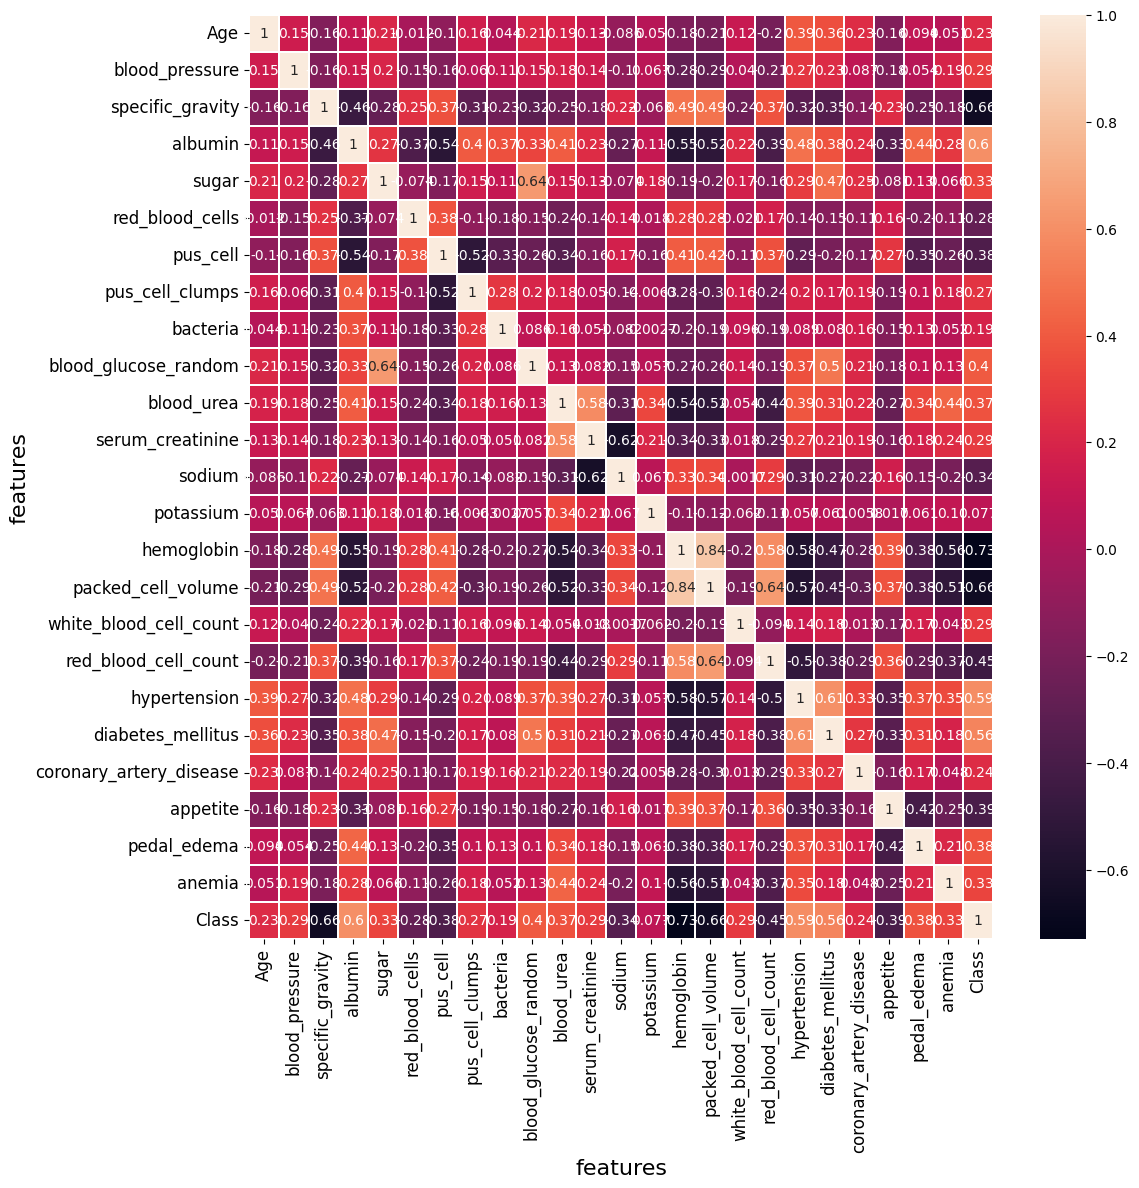

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
from google.colab import files

plt.figure(figsize=(12,12))
sns.heatmap(final_ckd.corr(),linewidth=.01,annot=True,annot_kws={'size': 10})
plt.xticks(rotation=90,size = 12)
plt.yticks(rotation=360,size = 12)
plt.xlabel('features', fontsize=16)
plt.ylabel('features', fontsize=16)

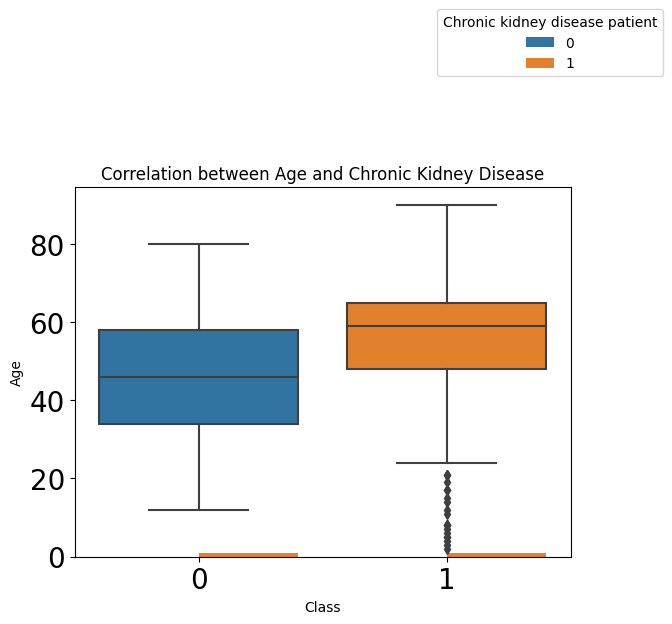

In [ ]:
g = sns.countplot(data = final_ckd, x = 'Age', hue = 'Class')
g.legend(title='Chronic kidney disease patient', loc='upper right', bbox_to_anchor=(1.2, 1.5), ncol=1)
g.tick_params(labelsize=20)
plt.setp(g.get_legend().get_texts(), fontsize='10')
plt.setp(g.get_legend().get_title(), fontsize='10')
sns.boxplot(x='Class', y='Age', data=ckd)
plt.title('Correlation between Age and Chronic Kidney Disease')
plt.show()

#Outlier Analysis

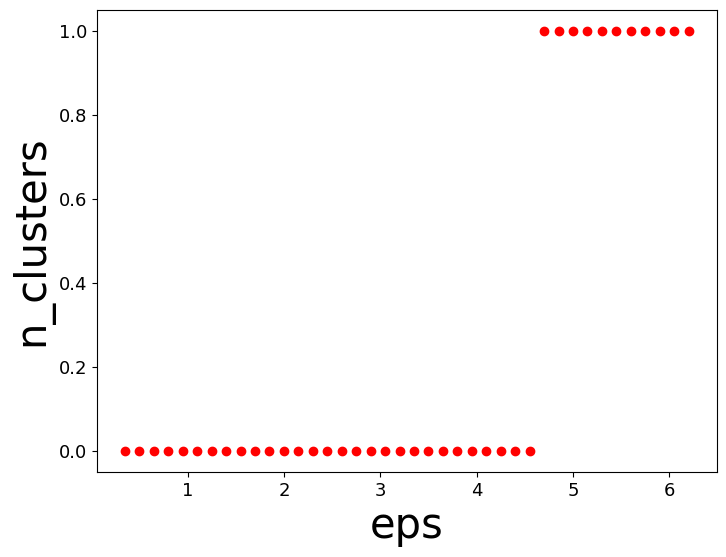

In [ ]:
from sklearn.cluster import DBSCAN

X = final_ckd.drop(['Class'], axis=1)

eps=0.2
for i in range(40):
    eps +=0.15
    model = DBSCAN(eps, min_samples=2).fit(X)
    labels = model.labels_
    n_clusters_ = len(set(labels)) - (1 if -1 in labels else 0)
    plt.figure(2, figsize=(8, 6))
    plt.plot(eps,  n_clusters_,'-o', c='red')
    plt.ylabel('n_clusters', fontsize=30)
    plt.xlabel('eps',fontsize=30)
plt.xticks(size = 13)
plt.yticks(size = 13)
plt.show()

In [ ]:
from sklearn.cluster import DBSCAN
from collections import Counter

def findOutliers(X):
  model = DBSCAN(eps=5.0, min_samples=2).fit(X)
  labels=model.labels_
  count= Counter(model.labels_)
  n_clusters_ = len(set(labels)) - (1 if -1 in labels else 0)
  outliers = final_ckd[model.labels_ != -1];
  return outliers

In [ ]:
findOutliers(final_ckd.drop(['Class'], axis=1))

Age  blood_pressure  specific_gravity  albumin  sugar  red_blood_cells  \
54   63.0            80.0              1.01      2.0    2.0              1.0   
165  60.0            80.0              1.02      0.0    2.0              1.0   

     pus_cell  pus_cell_clumps  bacteria  blood_glucose_random  ...  \
54        1.0              0.0       0.0            148.036517  ...   
165       1.0              0.0       0.0            148.036517  ...   

     packed_cell_volume  white_blood_cell_count  red_blood_cell_count  \
54                   40                    9800                   4.2   
165                  41                    9800                   5.2   

     hypertension  diabetes_mellitus  coronary_artery_disease  appetite  \
54            1.0                0.0                      1.0       1.0   
165           0.0                1.0                      0.0       1.0   

     pedal_edema  anemia  Class  
54           0.0     0.0      1  
165          0.0     0.0      1  

[2 rows x 25 columns]

In [ ]:
print(final_ckd.shape)
final_ckd = final_ckd.drop([final_ckd.index[54], final_ckd.index[165]])
print(final_ckd.shape)

(400, 25)
(398, 25)


In [ ]:
print("correlations among attributes - closer to +/- 1 are more likely to be related")
print()
correlation=final_ckd.corr()
correlation

correlations among attributes - closer to +/- 1 are more likely to be related



Age  blood_pressure  specific_gravity   albumin  \
Age                      1.000000        0.147383         -0.157757  0.114736   
blood_pressure           0.147383        1.000000         -0.164244  0.146863   
specific_gravity        -0.157757       -0.164244          1.000000 -0.458634   
albumin                  0.114736        0.146863         -0.458634  1.000000   
sugar                    0.204736        0.199976         -0.276033  0.270134   
red_blood_cells         -0.012882       -0.151928          0.255600 -0.374609   
pus_cell                -0.103543       -0.157614          0.367798 -0.536272   
pus_cell_clumps          0.160282        0.060040         -0.308226  0.400464   
bacteria                 0.044335        0.112527         -0.232985  0.368464   
blood_glucose_random     0.214603        0.149126         -0.318771  0.326906   
blood_urea               0.187713        0.184001         -0.250058  0.406408   
serum_creatinine         0.127331        0.144346         -0.176425  0.230725   
sodium                  -0.085745       -0.103132          0.217488 -0.271425   
potassium                0.050454        0.066762         -0.064042  0.114902   
hemoglobin              -0.175842       -0.279710          0.494144 -0.550909   
packed_cell_volume      -0.209627       -0.286962          0.493055 -0.517173   
white_blood_cell_count   0.115531        0.039459         -0.238493  0.224429   
red_blood_cell_count    -0.202668       -0.209571          0.369908 -0.392447   
hypertension             0.393652        0.270912         -0.319976  0.479786   
diabetes_mellitus        0.364396        0.228551         -0.357108  0.383977   
coronary_artery_disease  0.231109        0.085847         -0.125884  0.233342   
appetite                -0.159495       -0.178417          0.233043 -0.331255   
pedal_edema              0.096014        0.054763         -0.255875  0.441805   
anemia                   0.051884        0.195637         -0.185803  0.282841   
Class                    0.223643        0.290067         -0.660371  0.601127   

                            sugar  red_blood_cells  pus_cell  pus_cell_clumps  \
Age                      0.204736        -0.012882 -0.103543         0.160282   
blood_pressure           0.199976        -0.151928 -0.157614         0.060040   
specific_gravity        -0.276033         0.255600  0.367798        -0.308226   
albumin                  0.270134        -0.374609 -0.536272         0.400464   
sugar                    1.000000        -0.077557 -0.173590         0.154972   
red_blood_cells         -0.077557         1.000000  0.376854        -0.102384   
pus_cell                -0.173590         0.376854  1.000000        -0.519744   
pus_cell_clumps          0.154972        -0.102384 -0.519744         1.000000   
bacteria                 0.110158        -0.184048 -0.330056         0.274788   
blood_glucose_random     0.642867        -0.153127 -0.262413         0.197651   
blood_urea               0.153063        -0.236401 -0.344251         0.184470   
serum_creatinine         0.130649        -0.138494 -0.158061         0.050005   
sodium                  -0.073509         0.140776  0.173634        -0.142325   
potassium                0.182641         0.018337 -0.158664        -0.006449   
hemoglobin              -0.193293         0.280934  0.411546        -0.275705   
packed_cell_volume      -0.200213         0.277930  0.418591        -0.297677   
white_blood_cell_count   0.163619        -0.021844 -0.108821         0.159013   
red_blood_cell_count    -0.156822         0.166725  0.366503        -0.239397   
hypertension             0.293620        -0.141497 -0.293406         0.196721   
diabetes_mellitus        0.473970        -0.146752 -0.202578         0.166365   
coronary_artery_disease  0.240073        -0.115846 -0.178464         0.193293   
appetite                -0.085036         0.160094  0.274088        -0.188992   
pedal_edema              0.135243        -0.198580 -0.349461

Text(120.5815972222222, 0.5, 'features')

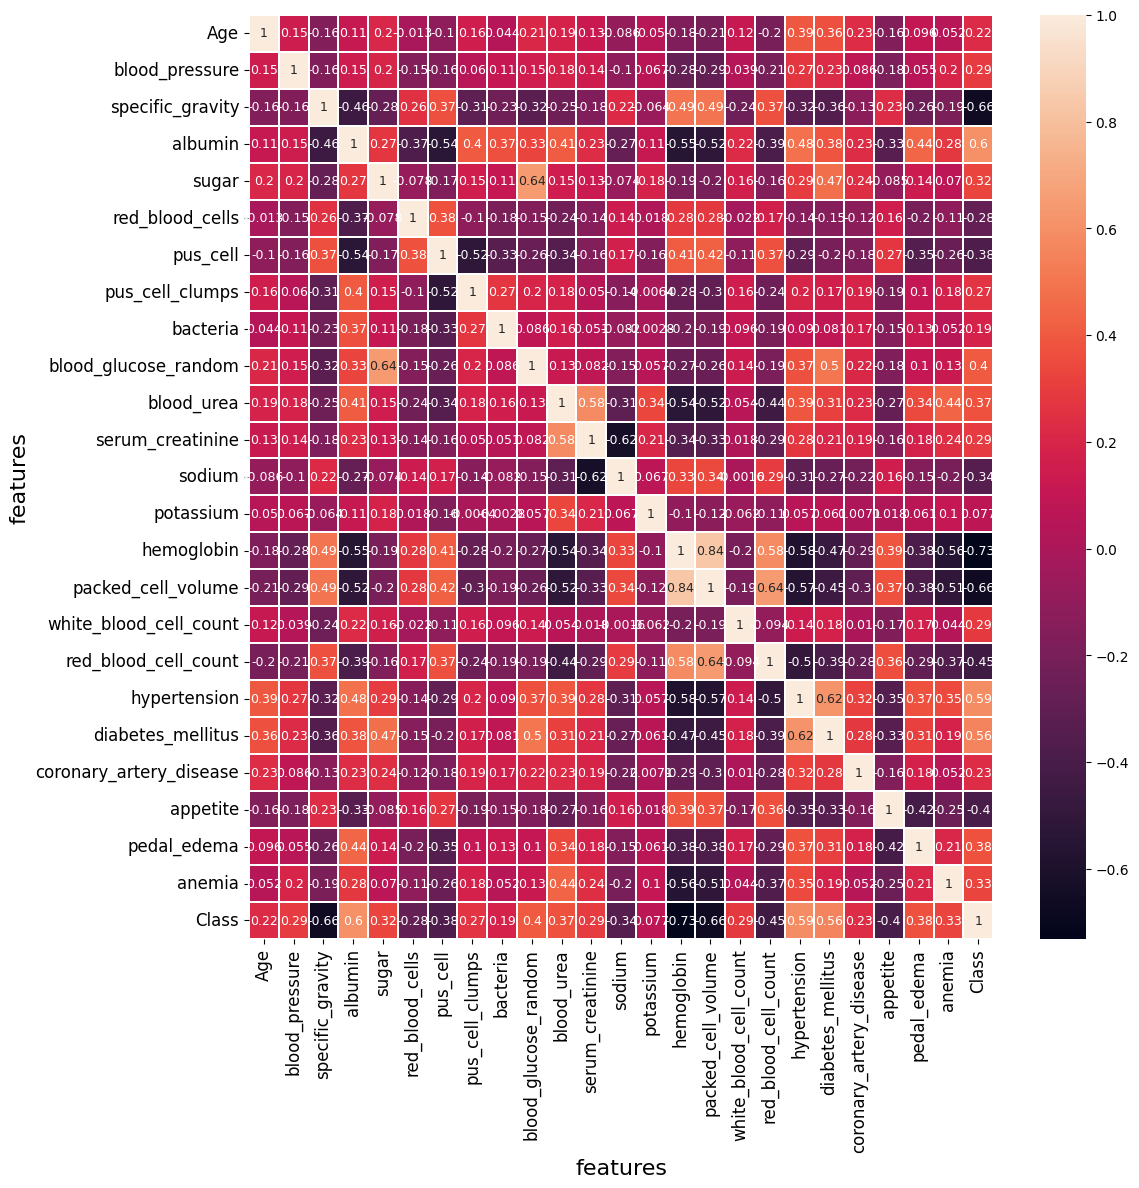

In [ ]:
plt.figure(figsize=(12,12))
sns.heatmap(final_ckd.corr(),linewidth=.01,annot=True,annot_kws={'size': 9})
plt.xticks(rotation=90,size = 12)
plt.yticks(rotation=360,size = 12)
plt.xlabel('features', fontsize=16)
plt.ylabel('features', fontsize=16)

#Diabetes

In [ ]:
db = pd.read_csv('/content/drive/My Drive/Colab Notebooks/diabetes.csv', delimiter = ',')

In [ ]:
db.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [ ]:
db.head(10)

Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
0            6      148             72             35        0  33.6   
1            1       85             66             29        0  26.6   
2            8      183             64              0        0  23.3   
3            1       89             66             23       94  28.1   
4            0      137             40             35      168  43.1   
5            5      116             74              0        0  25.6   
6            3       78             50             32       88  31.0   
7           10      115              0              0        0  35.3   
8            2      197             70             45      543  30.5   
9            8      125             96              0        0   0.0   

   DiabetesPedigreeFunction  Age  Outcome  
0                     0.627   50        1  
1                     0.351   31        0  
2                     0.672   32        1  
3                     0.167   21        0  
4                     2.288   33        1  
5                     0.201   30        0  
6                     0.248   26        1  
7                     0.134   29        0  
8                     0.158   53        1  
9                     0.232   54        1

In [ ]:
db.describe()

Pregnancies     Glucose  BloodPressure  SkinThickness     Insulin  \
count   768.000000  768.000000     768.000000     768.000000  768.000000   
mean      3.845052  120.894531      69.105469      20.536458   79.799479   
std       3.369578   31.972618      19.355807      15.952218  115.244002   
min       0.000000    0.000000       0.000000       0.000000    0.000000   
25%       1.000000   99.000000      62.000000       0.000000    0.000000   
50%       3.000000  117.000000      72.000000      23.000000   30.500000   
75%       6.000000  140.250000      80.000000      32.000000  127.250000   
max      17.000000  199.000000     122.000000      99.000000  846.000000   

              BMI  DiabetesPedigreeFunction         Age     Outcome  
count  768.000000                768.000000  768.000000  768.000000  
mean    31.992578                  0.471876   33.240885    0.348958  
std      7.884160                  0.331329   11.760232    0.476951  
min      0.000000                  0.078000   21.000000    0.000000  
25%     27.300000                  0.243750   24.000000    0.000000  
50%     32.000000                  0.372500   29.000000    0.000000  
75%     36.600000                  0.626250   41.000000    1.000000  
max     67.100000                  2.420000   81.000000    1.000000

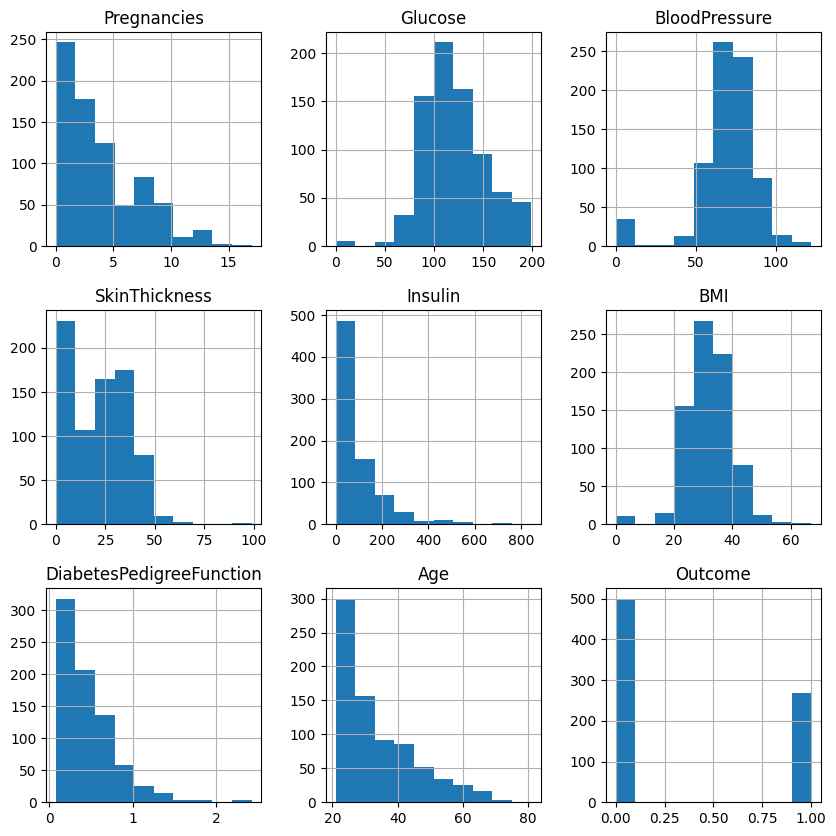

In [ ]:
histo = db.hist(figsize = (10,10))

#Data Preprocessing

In [ ]:
db.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

In [ ]:
diabetes_df_copy = db.copy(deep = True)
diabetes_df_copy[['Glucose','BloodPressure','SkinThickness','Insulin','BMI']] = diabetes_df_copy[['Glucose','BloodPressure','SkinThickness','Insulin','BMI']].replace(0,np.NaN)

# Showing the Count of NANs
print(diabetes_df_copy.isnull().sum())

Pregnancies                   0
Glucose                       5
BloodPressure                35
SkinThickness               227
Insulin                     374
BMI                          11
DiabetesPedigreeFunction      0
Age                           0
Outcome                       0
dtype: int64


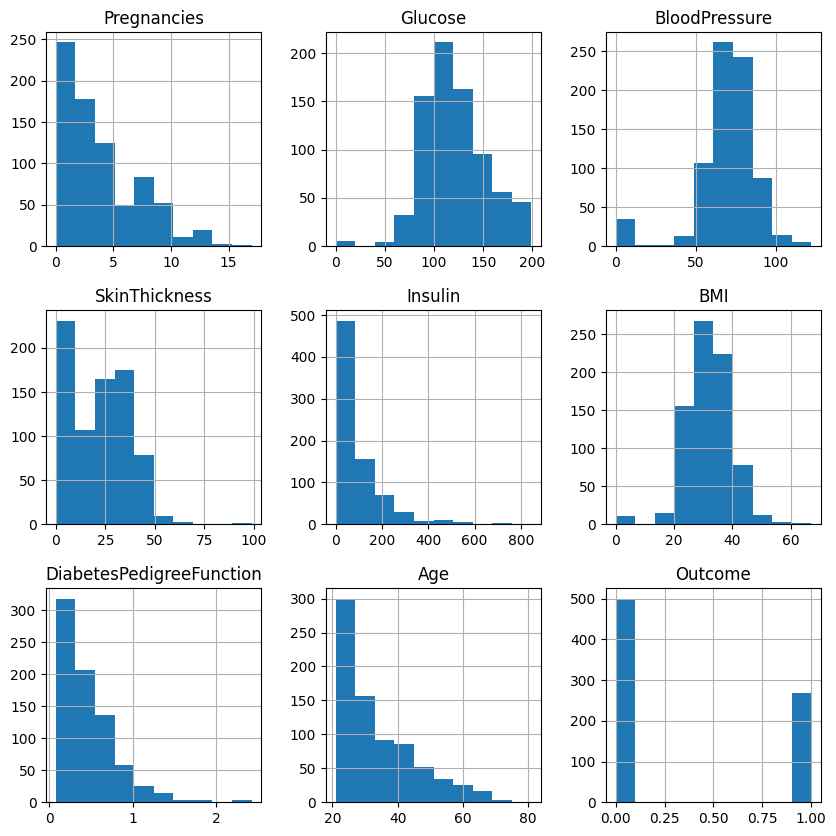

In [ ]:
p = db.hist(figsize = (10,10))

Filling missing values

In [ ]:
diabetes_df_copy['Glucose'].fillna(diabetes_df_copy['Glucose'].mean(), inplace = True)
diabetes_df_copy['BloodPressure'].fillna(diabetes_df_copy['BloodPressure'].mean(), inplace = True)
diabetes_df_copy['SkinThickness'].fillna(diabetes_df_copy['SkinThickness'].median(), inplace = True)
diabetes_df_copy['Insulin'].fillna(diabetes_df_copy['Insulin'].median(), inplace = True)
diabetes_df_copy['BMI'].fillna(diabetes_df_copy['BMI'].median(), inplace = True)

In [ ]:
print(diabetes_df_copy.isnull().sum())
db=diabetes_df_copy

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64


0    500
1    268
Name: Outcome, dtype: int64


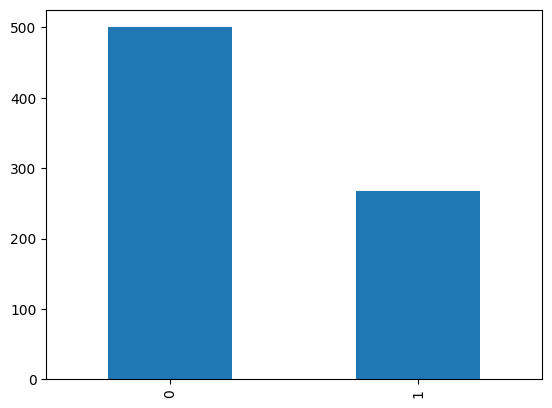

In [ ]:
print(db.Outcome.value_counts())
p=db.Outcome.value_counts().plot(kind="bar")

0    500
1    268
Name: Outcome, dtype: int64


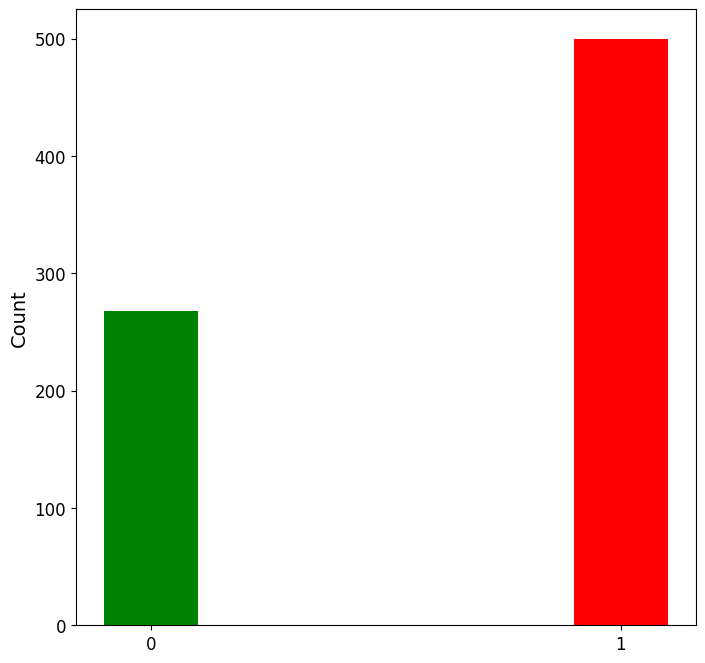

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
from matplotlib.pyplot import rcParams
import matplotlib.pyplot as plt
import seaborn as sns


print(db.Outcome.value_counts())

rcParams['figure.figsize'] = 8,8
plt.bar(db['Outcome'].unique(), db['Outcome'].value_counts(), color = ['red', 'green'],width=0.2)
plt.xticks([0, 1])
plt.xticks(size = 12)
plt.yticks(size = 12)
plt.ylabel('Count',size=14)
plt.savefig('target-count.eps')
plt.show()
files.download('target-count.eps')

Text(120.7222222222222, 0.5, 'features')

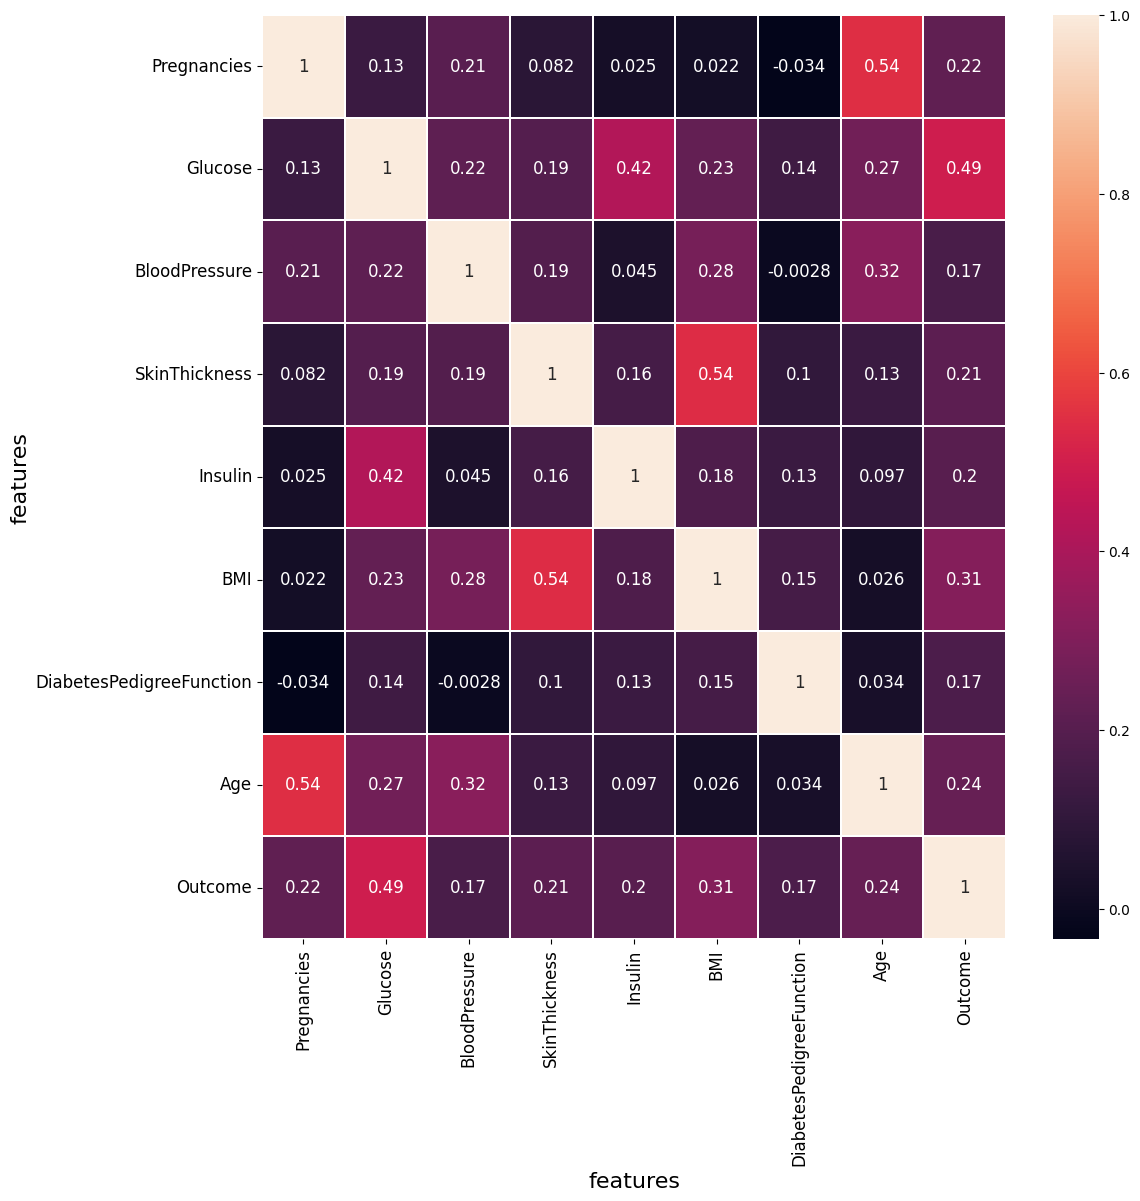

In [ ]:
plt.figure(figsize=(12,12))
sns.heatmap(db.corr(),linewidth=.02,annot=True,annot_kws={'size':12})
plt.xticks(rotation=90,size = 12)
plt.yticks(rotation=360,size = 12)
plt.xlabel('features', fontsize=16)
plt.ylabel('features', fontsize=16)

#Outlier Analysis

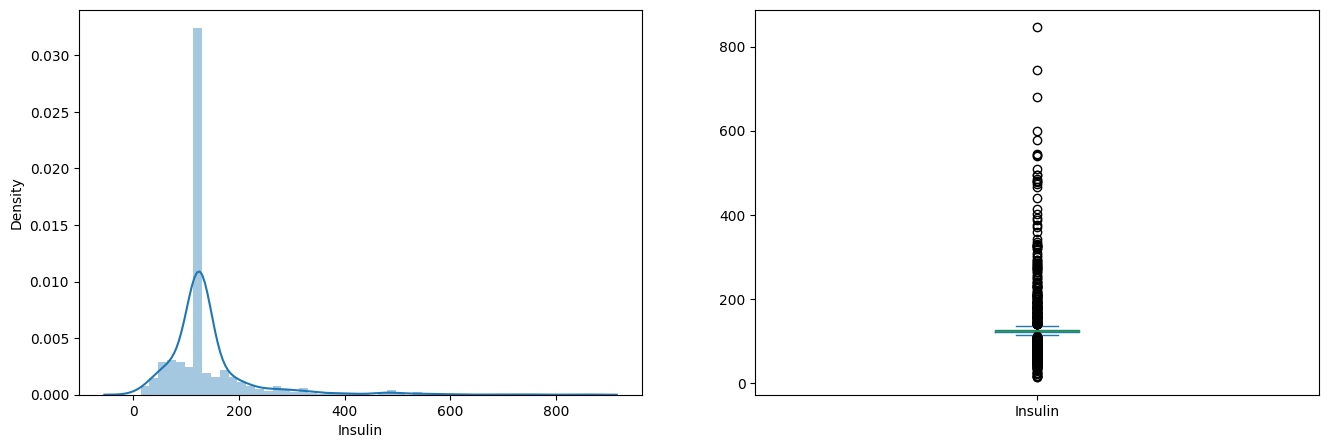

In [ ]:
plt.subplot(121), sns.distplot(db['Insulin'])
plt.subplot(122), db['Insulin'].plot.box(figsize=(16,5))
plt.show()

In [ ]:
sns.pairplot(db, hue = 'Outcome', vars = ['Pregnancies', 'Glucose', 'BloodPressure','SkinThickness','Insulin','BMI','DiabetesPedigreeFunction','Age'] )
plt.xticks(size = 12)
plt.yticks(size = 12)
plt.xlabel('feature', size = 14)
plt.ylabel('feature',size=14)
plt.savefig('pairplot.eps')
plt.show()
#files.download('pairplot.eps')

Output hidden; open in https://colab.research.google.com to view.

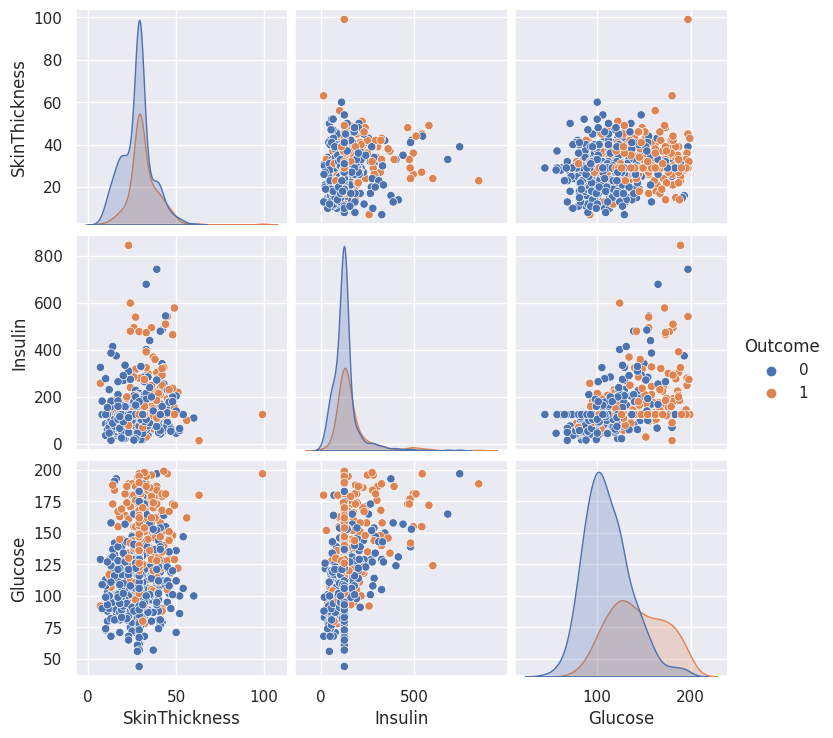

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
sns.pairplot(db, hue = 'Outcome', vars = ['SkinThickness','Insulin','Glucose'] )
plt.xticks(size = 12)
plt.yticks(size = 12)
plt.xlabel('feature', size = 14)
plt.ylabel('feature',size=14)
plt.savefig('outlier_detect.eps')
plt.show()
files.download('outlier_detect.eps')

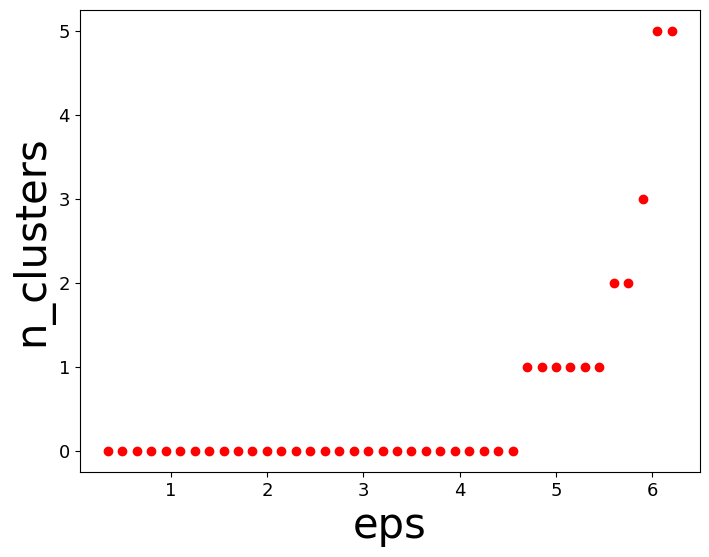

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
from sklearn.cluster import DBSCAN

X1 = db.drop(['Outcome'], axis=1)

eps=0.2
for i in range(40):
    eps +=0.15
    model = DBSCAN(eps, min_samples=4).fit(X1)
    labels = model.labels_
    n_clusters_ = len(set(labels)) - (1 if -1 in labels else 0)
    plt.figure(2, figsize=(8, 6))
    plt.plot(eps,  n_clusters_,'-o', c='red')
    plt.ylabel('n_clusters', fontsize=30)
    plt.xlabel('eps',fontsize=30)
plt.xticks(size = 13)
plt.yticks(size = 13)
plt.savefig('dbscan.eps')
plt.show()
files.download('dbscan.eps')

In [ ]:
from sklearn.cluster import DBSCAN
from collections import Counter

def findOutliers(X):
  model = DBSCAN(eps=5.0, min_samples=4).fit(X1)
  labels=model.labels_
  count= Counter(model.labels_)
  n_clusters_ = len(set(labels)) - (1 if -1 in labels else 0)
  outliers = db[model.labels_ != -1];
  return outliers

In [ ]:
findOutliers(db.drop(['Outcome'], axis=1))

Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
85             2    110.0      74.000000           29.0    125.0  32.4   
124            0    113.0      76.000000           29.0    125.0  33.3   
321            3    112.0      74.000000           30.0    125.0  31.6   
522            6    114.0      72.405184           29.0    125.0  32.3   

     DiabetesPedigreeFunction  Age  Outcome  
85                      0.698   27        0  
124                     0.278   23        1  
321                     0.197   25        1  
522                     0.189   26        0

In [ ]:
print(db.shape)
db = db.drop([db.index[85],db.index[124],db.index[321], db.index[522]])
print(db.shape)

(768, 9)
(764, 9)


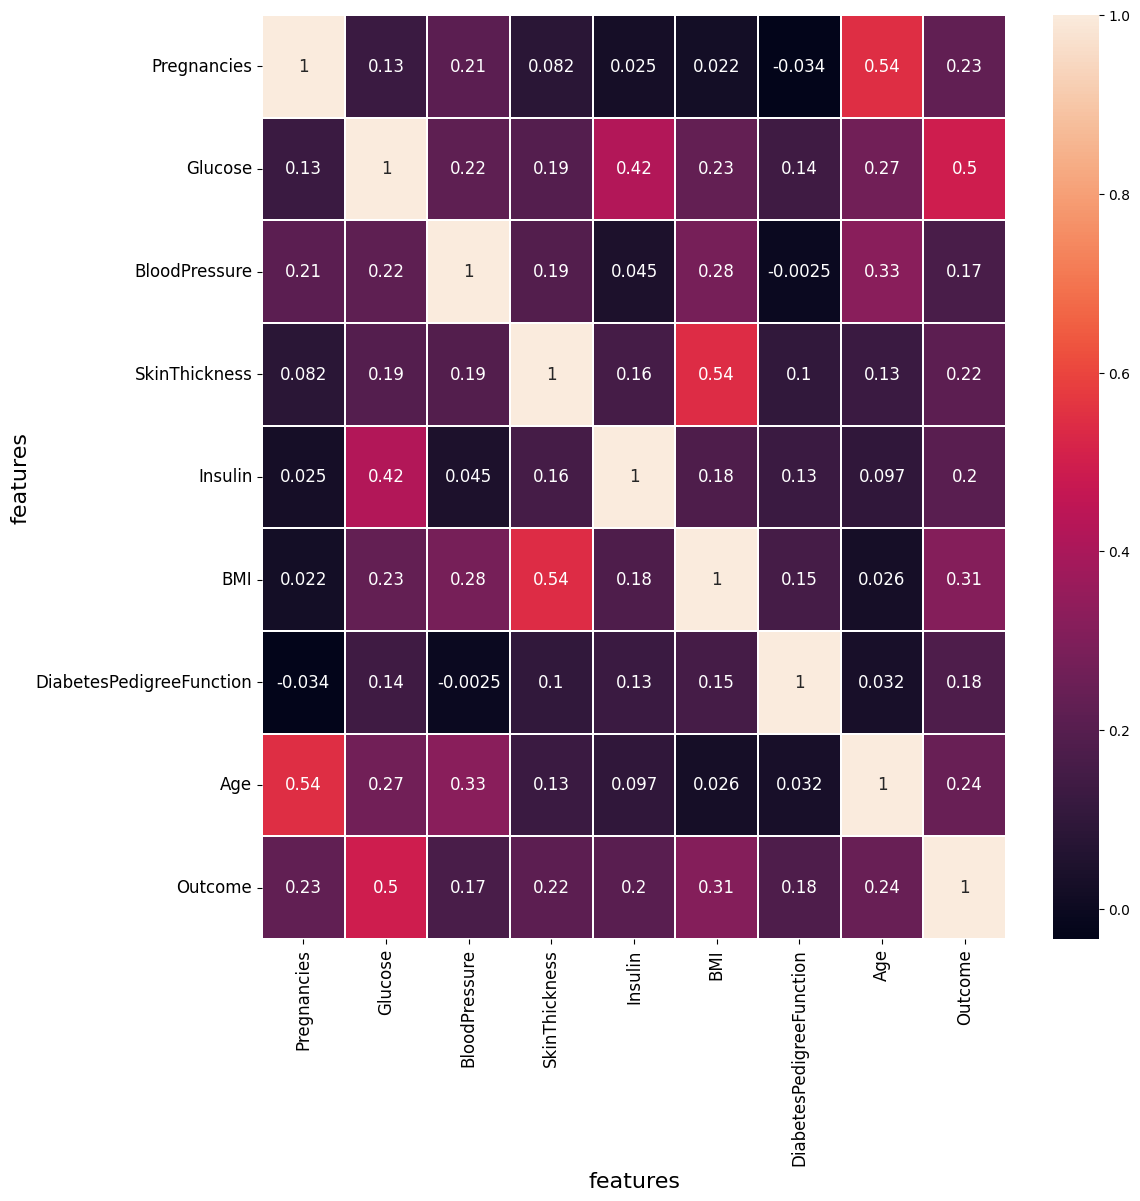

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
plt.figure(figsize=(12,12))
sns.heatmap(db.corr(),linewidth=.02,annot=True,annot_kws={'size':12})
plt.xticks(rotation=90,size = 12)
plt.yticks(rotation=360,size = 12)
plt.xlabel('features', fontsize=16)
plt.ylabel('features', fontsize=16)
plt.savefig('corr.eps')
plt.show()
files.download('corr.eps')

#Model Building

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score,precision_score,recall_score,f1_score

In [ ]:
from sklearn.model_selection import cross_validate
def cross_validation(model, _X, _y, _cv=3):
      _scoring = ['accuracy', 'precision', 'recall', 'f1']
      results = cross_validate(estimator=model,
                               X=_X,
                               y=_y,
                               cv=_cv,
                               scoring=_scoring,
                               return_train_score=True)

      return {"Training Accuracy scores": results['train_accuracy'],
              "Mean Training Accuracy": results['train_accuracy'].mean()*100,
              "Training Precision scores": results['train_precision'],
              "Mean Training Precision": results['train_precision'].mean(),
              "Training Recall scores": results['train_recall'],
              "Mean Training Recall": results['train_recall'].mean(),
              "Training F1 scores": results['train_f1'],
              "Mean Training F1 Score": results['train_f1'].mean(),
              "Validation Accuracy scores": results['test_accuracy'],
              "Mean Validation Accuracy": results['test_accuracy'].mean()*100,
              "Validation Precision scores": results['test_precision'],
              "Mean Validation Precision": results['test_precision'].mean(),
              "Validation Recall scores": results['test_recall'],
              "Mean Validation Recall": results['test_recall'].mean(),
              "Validation F1 scores": results['test_f1'],
              "Mean Validation F1 Score": results['test_f1'].mean()
              }

# Grouped Bar Chart for both training and validation data
def plot_result(x_label, y_label, plot_title, train_data, val_data):
        # Set size of plot
        plt.figure(figsize=(12,3))
        labels = ["1st Fold", "2nd Fold", "3rd Fold"]
        X_axis = np.arange(len(labels))
        ax = plt.gca()
        plt.ylim(0.40000, 1)
        plt.bar(X_axis-0.2, train_data, 0.4, color='blue', label='Training')
        plt.bar(X_axis+0.2, val_data, 0.4, color='red', label='Validation')
        plt.title(plot_title, fontsize=30)
        plt.xticks(X_axis, labels)
        plt.xlabel(x_label, fontsize=14)
        plt.ylabel(y_label, fontsize=14)
        plt.legend()
        plt.grid(True)
        plt.show()

#Data Splitting

In [ ]:
final_ckd.head(5)

Age  blood_pressure  specific_gravity  albumin  sugar  red_blood_cells  \
0  48.0            80.0             1.020      1.0    0.0              1.0   
1   7.0            50.0             1.020      4.0    0.0              1.0   
2  62.0            80.0             1.010      2.0    3.0              1.0   
3  48.0            70.0             1.005      4.0    0.0              1.0   
4  51.0            80.0             1.010      2.0    0.0              1.0   

   pus_cell  pus_cell_clumps  bacteria  blood_glucose_random  ...  \
0       1.0              0.0       0.0            121.000000  ...   
1       1.0              0.0       0.0            148.036517  ...   
2       1.0              0.0       0.0            423.000000  ...   
3       0.0              1.0       0.0            117.000000  ...   
4       1.0              0.0       0.0            106.000000  ...   

   packed_cell_volume  white_blood_cell_count  red_blood_cell_count  \
0                  44                    7800                   5.2   
1                  38                    6000                   5.2   
2                  31                    7500                   5.2   
3                  32                    6700                   3.9   
4                  35                    7300                   4.6   

   hypertension  diabetes_mellitus  coronary_artery_disease  appetite  \
0           1.0                1.0                      0.0       1.0   
1           0.0                0.0                      0.0       1.0   
2           0.0                1.0                      0.0       0.0   
3           1.0                0.0                      0.0       0.0   
4           0.0                0.0                      0.0       1.0   

   pedal_edema  anemia  Class  
0          0.0     0.0      1  
1          0.0     0.0      1  
2          0.0     1.0      1  
3          1.0     1.0      1  
4          0.0     0.0      1  

[5 rows x 25 columns]

In [ ]:
predictors_ckd = final_ckd.drop("Class",axis=1)
target_ckd = final_ckd["Class"]

X_train,X_test,Y_train,Y_test = train_test_split(predictors_ckd,target_ckd,test_size=0.2,random_state=42)

In [ ]:
db.head(5)

Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
0            6    148.0           72.0           35.0    125.0  33.6   
1            1     85.0           66.0           29.0    125.0  26.6   
2            8    183.0           64.0           29.0    125.0  23.3   
3            1     89.0           66.0           23.0     94.0  28.1   
4            0    137.0           40.0           35.0    168.0  43.1   

   DiabetesPedigreeFunction  Age  Outcome  
0                     0.627   50        1  
1                     0.351   31        0  
2                     0.672   32        1  
3                     0.167   21        0  
4                     2.288   33        1

In [ ]:
predictors_db = db.drop("Outcome",axis=1)
target_db = db["Outcome"]

X_train1,X_test1,Y_train1,Y_test1 = train_test_split(predictors_db,target_db,test_size=0.3,random_state=42)

In [ ]:
#Decision Tree
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV

params = {
    'max_depth': [2, 3, 5, 10, 20],
    'min_samples_leaf': [5, 10, 20, 50, 100],
    'criterion': ["gini", "entropy","log_loss"]
}

dt = DecisionTreeClassifier(random_state=42)
dt = GridSearchCV(estimator=dt, param_grid=params, cv=3, verbose=True, n_jobs=-1, scoring = "accuracy")
dt.fit(X_train,Y_train)
dt_result = cross_validation(dt, X_train, Y_train, 3)
print(dt_result)

Y_pred_dt = dt.predict(X_test)

score_dt = round(accuracy_score(Y_pred_dt,Y_test)*100,2)
precision_dt= round(precision_score(Y_test,Y_pred_dt)*100,2)
recall_dt = round(recall_score(Y_test,Y_pred_dt)*100,2)
f1_dt = round(f1_score(Y_test,Y_pred_dt)*100,2)

print("Chronic Kidney Disease")
print("The accuracy score achieved using Decision Tree is: "+str(score_dt)+" %")
print("The precision score achieved using Decision Tree is: "+str(precision_dt)+" %")
print("The recall score achieved using Decision Tree is: "+str(recall_dt)+" %")
print("The f1 score achieved using Decision Tree is: "+str(f1_dt)+" %")
print()

#Diabetes Disease
dt1 = DecisionTreeClassifier(random_state=42)
dt1 = GridSearchCV(estimator=dt1, param_grid=params, cv=3, verbose=True, n_jobs=-1, scoring = "accuracy")
dt1.fit(X_train1,Y_train1)

dt_result1 = cross_validation(dt1, X_train1, Y_train1, 3)
print(dt_result1)

Y_pred_dt1 = dt1.predict(X_test1)

score_dt1 = round(accuracy_score(Y_pred_dt1,Y_test1)*100,2)
precision_dt1= round(precision_score(Y_test1,Y_pred_dt1)*100,2)
recall_dt1 = round(recall_score(Y_test1,Y_pred_dt1)*100,2)
f1_dt1 = round(f1_score(Y_test1,Y_pred_dt1)*100,2)

print("Diabetes Disease")
print("The accuracy score achieved using Decision Tree is: "+str(score_dt1)+" %")
print("The precision score achieved using Decision Tree is: "+str(precision_dt1)+" %")
print("The recall score achieved using Decision Tree is: "+str(recall_dt1)+" %")
print("The f1 score achieved using Decision Tree is: "+str(f1_dt1)+" %")
print()


Fitting 3 folds for each of 75 candidates, totalling 225 fits
Fitting 3 folds for each of 75 candidates, totalling 225 fits
Fitting 3 folds for each of 75 candidates, totalling 225 fits
Fitting 3 folds for each of 75 candidates, totalling 225 fits
{'Training Accuracy scores': array([0.96698113, 0.98113208, 0.97641509]), 'Mean Training Accuracy': 97.48427672955975, 'Training Precision scores': array([0.97674419, 0.97744361, 0.97014925]), 'Mean Training Precision': 0.9747790162668037, 'Training Recall scores': array([0.96923077, 0.99236641, 0.99236641]), 'Mean Training Recall': 0.9846545312194167, 'Training F1 scores': array([0.97297297, 0.98484848, 0.98113208]), 'Mean Training F1 Score': 0.9796511777643854, 'Validation Accuracy scores': array([0.97169811, 0.96226415, 0.94339623]), 'Mean Validation Accuracy': 95.9119496855346, 'Validation Precision scores': array([1.        , 0.95522388, 0.92753623]), 'Mean Validation Precision': 0.960920037493691, 'Validation Recall scores': array([0.95

In [ ]:
#Logistic Regression
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV

param_grid = [
    {'penalty' : ['l1', 'l2', 'elasticnet', 'none'],
    'C' : np.logspace(-4, 4, 20),
    'solver' : ['lbfgs','newton-cg','liblinear','sag','saga'],
    'max_iter' : [100]
    }
]

#Chronic Kidney Disease
lr = LogisticRegression()

lr = GridSearchCV(lr, param_grid = param_grid, cv = 3, verbose=True, n_jobs=-1)

lr.fit(X_train,Y_train)
print("best params are :",lr.best_estimator_)

lr_result = cross_validation(lr, X_train, Y_train, 3)
print(lr_result)

Y_pred_lr = lr.predict(X_test)
Y_pred_lr.shape

score_lr = round(accuracy_score(Y_pred_lr,Y_test)*100,2)
precision_lr = round(precision_score(Y_test,Y_pred_lr)*100,2)
recall_lr = round(recall_score(Y_test,Y_pred_lr)*100,2)
f1_lr = round(f1_score(Y_test,Y_pred_lr)*100,2)

print("Chronic Kidney Disease")
print("The accuracy score achieved using Logistic Regression is: "+str(score_lr)+" %")
print("The precision score achieved using Logistic Regression is: "+str(precision_lr)+" %")
print("The recall score achieved using Logistic Regression is: "+str(recall_lr)+" %")
print("The f1 score achieved using Logistic Regression is: "+str(f1_lr)+" %")
print()

#Diabetes Disease
lr1 = LogisticRegression()

lr1 = GridSearchCV(lr1, param_grid = param_grid, cv = 3, verbose=True, n_jobs=-1)

lr1.fit(X_train1,Y_train1)
print("best params are :",lr1.best_estimator_)

lr_result1 = cross_validation(lr1, X_train1, Y_train1, 3)
print(lr_result1)

Y_pred_lr1 = lr1.predict(X_test1)
Y_pred_lr1.shape

score_lr1 = round(accuracy_score(Y_pred_lr1,Y_test1)*100,2)
precision_lr1 = round(precision_score(Y_test1,Y_pred_lr1)*100,2)
recall_lr1 = round(recall_score(Y_test1,Y_pred_lr1)*100,2)
f1_lr1 = round(f1_score(Y_test1,Y_pred_lr1)*100,2)

print("Diabetes Disease")
print("The accuracy score achieved using Logistic Regression is: "+str(score_lr1)+" %")
print("The precision score achieved using Logistic Regression is: "+str(precision_lr1)+" %")
print("The recall score achieved using Logistic Regression is: "+str(recall_lr1)+" %")
print("The f1 score achieved using Logistic Regression is: "+str(f1_lr1)+" %")
print()

Fitting 3 folds for each of 400 candidates, totalling 1200 fits
best params are : LogisticRegression(C=4.281332398719396, penalty='l1', solver='liblinear')
Fitting 3 folds for each of 400 candidates, totalling 1200 fits
Fitting 3 folds for each of 400 candidates, totalling 1200 fits
Fitting 3 folds for each of 400 candidates, totalling 1200 fits
{'Training Accuracy scores': array([0.98584906, 1.        , 1.        ]), 'Mean Training Accuracy': 99.52830188679246, 'Training Precision scores': array([0.99224806, 1.        , 1.        ]), 'Mean Training Precision': 0.9974160206718347, 'Training Recall scores': array([0.98461538, 1.        , 1.        ]), 'Mean Training Recall': 0.9948717948717949, 'Training F1 scores': array([0.98841699, 1.        , 1.        ]), 'Mean Training F1 Score': 0.996138996138996, 'Validation Accuracy scores': array([0.99056604, 0.99056604, 0.96226415]), 'Mean Validation Accuracy': 98.11320754716982, 'Validation Precision scores': array([1.        , 1.        , 0

In [ ]:
#Neural Network
from keras.models import Sequential
from keras.layers import Dense
from keras.wrappers.scikit_learn import KerasClassifier
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import MinMaxScaler, Normalizer
from sklearn.base import BaseEstimator, ClassifierMixin
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.layers import Input, Dense, Dropout,Flatten
#from tensorflow.keras import layers

# https://stats.stackexchange.com/a/136542 helped a lot in avoiding overfitting
#Chronic Kidney Disease-ckd

model_ckd = Sequential()
model_ckd.add(Input(shape=X_train.shape[1]))
model_ckd.add(Dense(11, input_dim=24, activation='relu'))
model_ckd.add(Dropout(0.2))
model_ckd.add(Flatten())
model_ckd.add(Dense(units = 1, activation = 'sigmoid'))
optimizer= keras.optimizers.RMSprop(learning_rate=0.001)
model_ckd.compile(loss='binary_crossentropy',optimizer=optimizer,metrics=['accuracy'])
model_ckd.fit(X_train, Y_train, epochs = 200, verbose = False)

Y_pred_nn = model_ckd.predict(X_test)
Y_pred_nn.shape
rounded = [round(x[0]) for x in Y_pred_nn]

Y_pred_nn = rounded
score_nn = round(accuracy_score(Y_pred_nn,Y_test)*100,2)
precision_nn= round(precision_score(Y_test,Y_pred_nn)*100,2)
recall_nn = round(recall_score(Y_test,Y_pred_nn)*100,2)
f1_nn = round(f1_score(Y_test,Y_pred_nn)*100,2)

print("Chronic Kidney Disease")
print("The accuracy score achieved using Neural Network is: "+str(score_nn)+" %")
print("The precision score achieved using Neural Network is: "+str(precision_nn)+" %")
print("The recall score achieved using Neural Network is: "+str(recall_nn)+" %")
print("The f1 score achieved using Neural Network is: "+str(f1_nn)+" %")

3/3 [==============================] - 0s 5ms/step
Chronic Kidney Disease
The accuracy score achieved using Neural Network is: 80.0 %
The precision score achieved using Neural Network is: 92.86 %
The recall score achieved using Neural Network is: 75.0 %
The f1 score achieved using Neural Network is: 82.98 %


In [ ]:
# define and fit the model
def get_model(trainX, trainy):
 model_ckd.fit(X_train, Y_train, epochs=300, verbose=0)
 return model_ckd

In [ ]:
#Neural Network
from keras.models import Sequential
from keras.layers import Dense
from keras.wrappers.scikit_learn import KerasClassifier
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import MinMaxScaler, Normalizer
from sklearn.base import BaseEstimator, ClassifierMixin
import tensorflow as tf
from tensorflow import keras

#Diaetes Disease-db
model1 = Sequential()
model1.add(Input(shape=X_train1.shape[1]))
model1.add(Dense(6, input_dim=8, activation='relu'))
model1.add(Dropout(0.2))
model1.add(Flatten())
model1.add(Dense(units = 1, activation = 'sigmoid'))
optimizer= keras.optimizers.RMSprop(learning_rate=0.001)
model1.compile(loss='binary_crossentropy',optimizer=optimizer,metrics=['accuracy'])
model1.fit(X_train1, Y_train1, epochs = 400, verbose = False)

Y_pred_nn1 = model1.predict(X_test1)
Y_pred_nn1.shape
rounded1 = [round(x[0]) for x in Y_pred_nn1]

Y_pred_nn1 = rounded1
score_nn1 = round(accuracy_score(Y_pred_nn1,Y_test1)*100,2)
precision_nn1 = round(precision_score(Y_test1,Y_pred_nn1)*100,2)
recall_nn1 = round(recall_score(Y_test1,Y_pred_nn1)*100,2)
f1_nn1 = round(f1_score(Y_test1,Y_pred_nn1)*100,2)

print("Diabetes Disease")
print("The accuracy score achieved using Neural Network is: "+str(score_nn1)+" %")
print("The precision score achieved using Neural Network is: "+str(precision_nn1)+" %")
print("The recall score achieved using Neural Network is: "+str(recall_nn1)+" %")
print("The f1 score achieved using Neural Network is: "+str(f1_nn1)+" %")

8/8 [==============================] - 0s 2ms/step
Diabetes Disease
The accuracy score achieved using Neural Network is: 64.78 %
The precision score achieved using Neural Network is: 0.0 %
The recall score achieved using Neural Network is: 0.0 %
The f1 score achieved using Neural Network is: 0.0 %


In [ ]:
# Results - Accuracy
scores_model = model_ckd.evaluate(X_train, Y_train, verbose = False)
print("Training Accuracy: %.2f%%\n" % (scores_model[1] * 100))
scores_model = model_ckd.evaluate(X_test, Y_test, verbose = False)
print("Testing Accuracy: %.2f%%\n" % (scores_model[1] * 100))

Training Accuracy: 84.91%

Testing Accuracy: 80.00%



In [ ]:
# Results - Accuracy
scores_model1 = model1.evaluate(X_train1, Y_train1, verbose = False)
print("Training Accuracy: %.2f%%\n" % (scores_model1[1] * 100))
scores_model1 = model1.evaluate(X_test1, Y_test1, verbose = False)
print("Testing Accuracy: %.2f%%\n" % (scores_model1[1] * 100))

Training Accuracy: 65.54%

Testing Accuracy: 64.78%



In [ ]:
print(model_ckd.summary())

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 11)                275       
                                                                 
 dropout (Dropout)           (None, 11)                0         
                                                                 
 flatten (Flatten)           (None, 11)                0         
                                                                 
 dense_1 (Dense)             (None, 1)                 12        
                                                                 
Total params: 287
Trainable params: 287
Non-trainable params: 0
_________________________________________________________________
None


In [ ]:
print(model1.summary())

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_2 (Dense)             (None, 6)                 54        
                                                                 
 dropout_1 (Dropout)         (None, 6)                 0         
                                                                 
 flatten_1 (Flatten)         (None, 6)                 0         
                                                                 
 dense_3 (Dense)             (None, 1)                 7         
                                                                 
Total params: 61
Trainable params: 61
Non-trainable params: 0
_________________________________________________________________
None


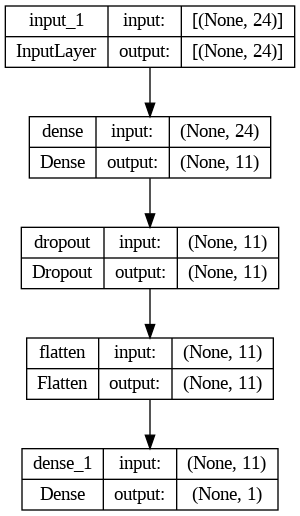

In [ ]:
from keras.utils.vis_utils import plot_model

plot_model(model_ckd, to_file='model_plot.png', show_shapes=True, show_layer_names=True)
#files.download('model_plot.png')

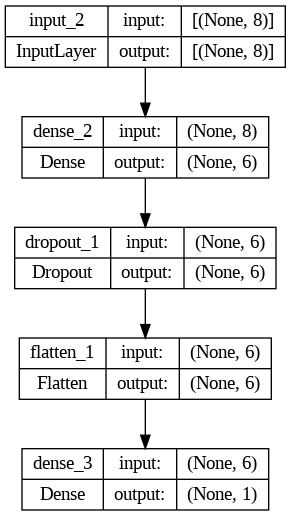

In [ ]:
from keras.utils.vis_utils import plot_model

plot_model(model1, to_file='model_plot1.png', show_shapes=True, show_layer_names=True)
#files.download('model_plot1.png')

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
  Preparing metadata (setup.py) ... done
  Created wheel for ann_visualizer: filename=ann_visualizer-2.5-py3-none-any.whl size=4167 sha256=4119306482897ec4b3e8a91f4699174d62f2b7a78cc286b9d62e20dea74fc06a
  Stored in directory: /root/.cache/pip/wheels/6e/0f/ae/f5dba91db71b1b32bf03d0ad18c32e86126093aba5ec6b6488
Successfully built ann_visualizer


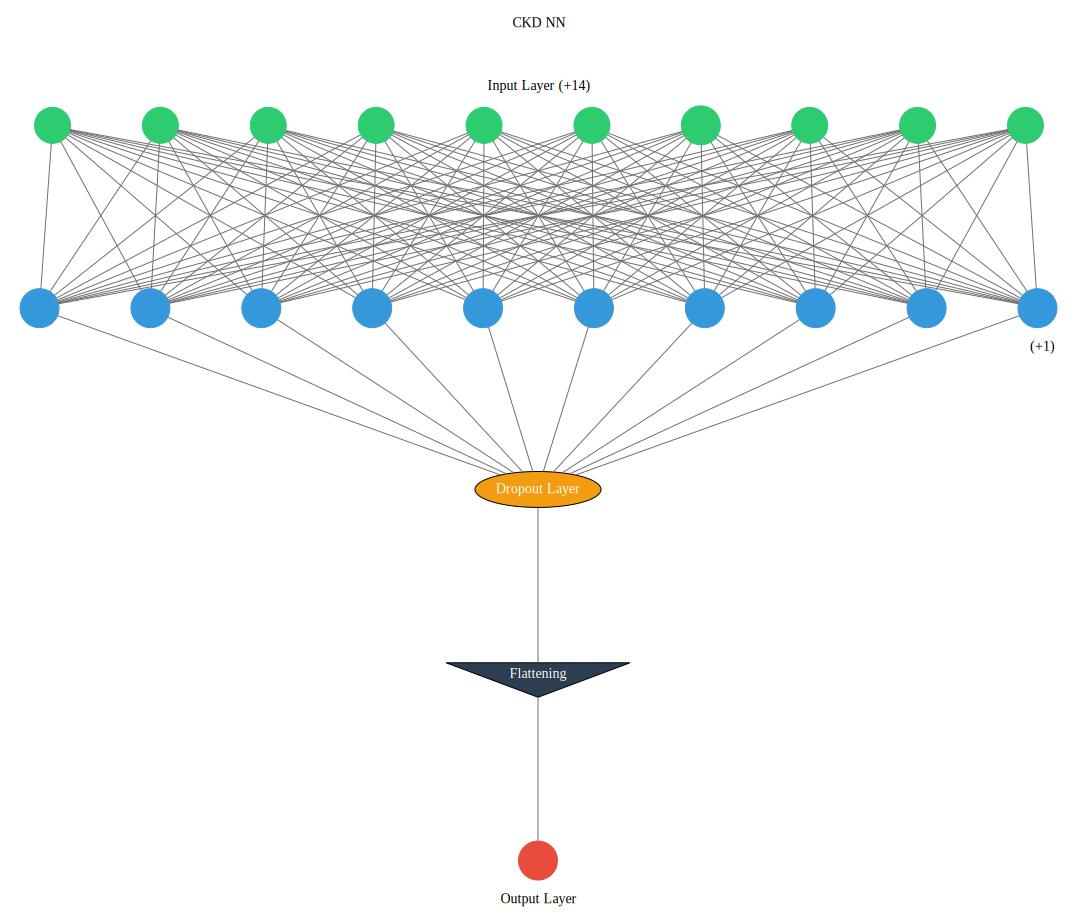

In [ ]:
!pip install ann_visualizer
from ann_visualizer.visualize import ann_viz;
import graphviz

ann_viz(model_ckd,filename='NN_model.gv',title="CKD NN")
graph_file=graphviz.Source.from_file('NN_model.gv')
graph_file
#files.download()

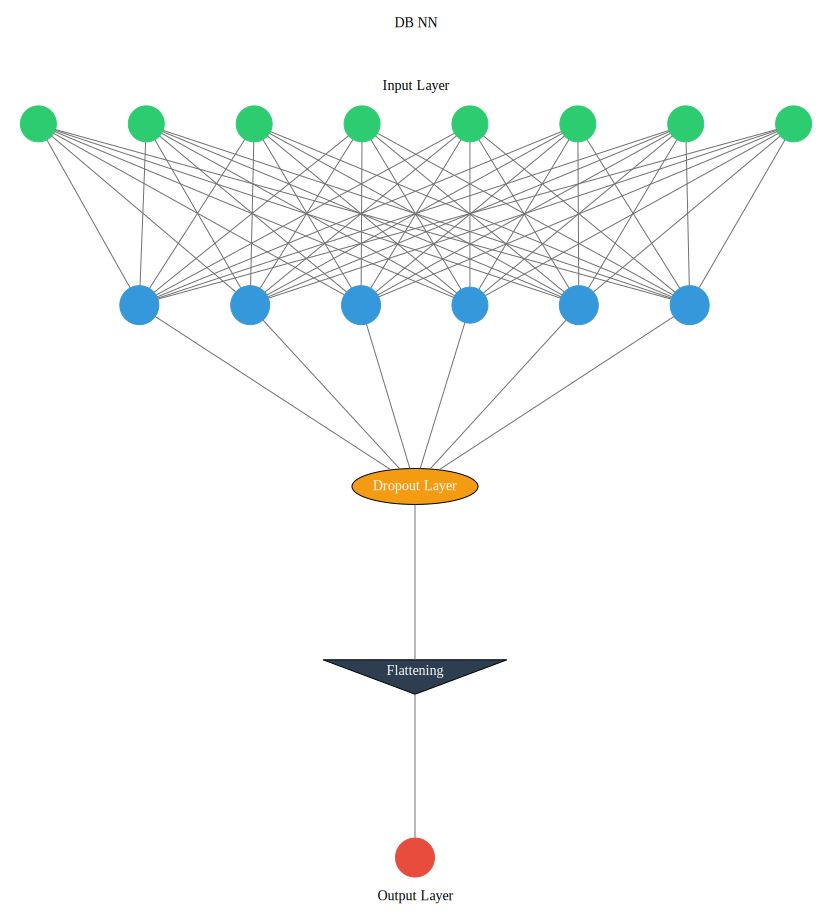

In [ ]:
ann_viz(model1,filename='NN_model1.gv',title="DB NN")
graph_file1=graphviz.Source.from_file('NN_model1.gv')
graph_file1

In [ ]:
#NN for Hard and Soft voting ensemble

# https://stats.stackexchange.com/a/136542 helped a lot in avoiding overfitting
#Chronic Kidney Disease-ckd

from tensorflow.keras import layers

class CKD_HardKerasModel(BaseEstimator, ClassifierMixin):
    def fit(self, X, y):
        model = keras.Sequential()
        model.add(layers.Input(shape=X.shape[1]))
        model.add(layers.Dense(11, input_dim=24, activation='relu'))
        model.add(layers.Dropout(0.2))
        model.add(layers.Flatten())
        model.add(layers.Dense(units = 1, activation = 'sigmoid'))
        optimizer= keras.optimizers.RMSprop(learning_rate=0.001)
        model.compile(loss='binary_crossentropy',optimizer=optimizer, metrics=[keras.metrics.AUC(), 'accuracy'])
        model.fit(X, y)
        self.model = model
        return self
    def predict(self, X):
        return (self.model.predict(X) > 0.5).flatten()

class CKD_SoftKerasModel(BaseEstimator, ClassifierMixin):
    def fit(self, X, y):
        model = keras.Sequential()
        model.add(layers.Input(shape=X.shape[1]))
        model.add(layers.Dense(11, input_dim=24, activation='relu'))
        model.add(layers.Dropout(0.2))
        model.add(layers.Flatten())
        model.add(layers.Dense(units = 1, activation = 'sigmoid'))
        optimizer= keras.optimizers.RMSprop(learning_rate=0.001)
        model.compile(loss='binary_crossentropy',optimizer=optimizer, metrics=[keras.metrics.AUC(), 'accuracy'])
        model.fit(X, y)
        self.model = model
        return self
    def predict(self, X):
        return (self.model.predict(X) > 0.5).flatten()
    def filter_sk_params(self, fn, override=None):
        override = override or {}
        res = {}
        for name, value in self.sk_params.items():
            if has_arg(fn, name):
                res.update({name: value})
        res.update(override)
        return res
    def predict_proba(self, x, **kwargs):
        probs = self.model.predict(x, **kwargs)
        # check if binary classification
        if probs.shape[1] == 1:
            # first column is probability of class 0 and second is of class 1
            probs = np.hstack([1 - probs, probs])
        return probs

In [ ]:
#NN for Hard and Soft voting ensemble

# https://stats.stackexchange.com/a/136542 helped a lot in avoiding overfitting
#Chronic Kidney Disease-ckd

class DB_HardKerasModel(BaseEstimator, ClassifierMixin):
    def fit(self, X, y):
        model = keras.Sequential()
        model.add(layers.Input(shape=X.shape[1]))
        model.add(layers.Dense(6, input_dim=8, activation='relu'))
        model.add(layers.Dropout(0.2))
        model.add(layers.Flatten())
        model.add(layers.Dense(units = 1, activation = 'sigmoid'))
        optimizer= keras.optimizers.RMSprop(learning_rate=0.001)
        model.compile(loss='binary_crossentropy',optimizer=optimizer, metrics=[keras.metrics.AUC(), 'accuracy'])
        model.fit(X, y)
        self.model = model
        return self
    def predict(self, X):
        return (self.model.predict(X) > 0.5).flatten()

class DB_SoftKerasModel(BaseEstimator, ClassifierMixin):
    def fit(self, X, y):
        model = keras.Sequential()
        model.add(layers.Input(shape=X.shape[1]))
        model.add(layers.Dense(6, input_dim=8, activation='relu'))
        model.add(layers.Dropout(0.2))
        model.add(layers.Flatten())
        model.add(layers.Dense(units = 1, activation = 'sigmoid'))
        optimizer= keras.optimizers.RMSprop(learning_rate=0.001)
        model.compile(loss='binary_crossentropy',optimizer=optimizer, metrics=[keras.metrics.AUC(), 'accuracy'])
        model.fit(X, y)
        self.model = model
        return self
    def predict(self, X):
        return (self.model.predict(X) > 0.5).flatten()
    def filter_sk_params(self, fn, override=None):
        override = override or {}
        res = {}
        for name, value in self.sk_params.items():
            if has_arg(fn, name):
                res.update({name: value})
        res.update(override)
        return res
    def predict_proba(self, x, **kwargs):
        probs = self.model.predict(x, **kwargs)
        # check if binary classification
        if probs.shape[1] == 1:
            # first column is probability of class 0 and second is of class 1
            probs = np.hstack([1 - probs, probs])
        return probs

In [ ]:
from sklearn.svm import SVC

# DTC pipeline
featuriser = MinMaxScaler()
dtc = DecisionTreeClassifier()
dtc_pipe = Pipeline([('featuriser', featuriser), ('dtc', dtc)])

# SVC pipeline
scaler = Normalizer()
svc = SVC(C=100, gamma=0.001, kernel='rbf')
svc_pipe = Pipeline([('scaler', scaler), ('svc', svc)])

#**Hard Voting**

#CKD

Fitting 3 folds for each of 75 candidates, totalling 225 fits
Fitting 3 folds for each of 400 candidates, totalling 1200 fits
3/3 [==============================] - 0s 6ms/step


Model  Accuracy  Precision  Sensitivity  Specificity  F1 Score  \
0  Hard Voting    0.9625        1.0     0.942308          1.0  0.970297   

        ROC  Log_Loss  mathew_corrcoef  
0  0.971154  1.351637          0.92256

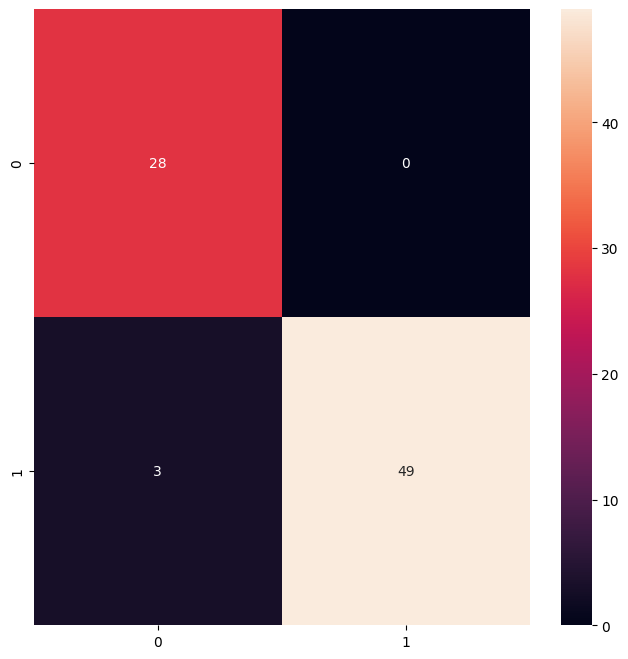

In [ ]:
from sklearn.metrics import confusion_matrix,log_loss,roc_auc_score,matthews_corrcoef
from sklearn.ensemble import VotingClassifier
import seaborn as sns

#estimators=[('dtc', dtc_pipe), ('svc', svc_pipe),('ann', MyKerasModel())]
hv_estimators=[ ('dt', dt), ('lr',lr),('ann', CKD_HardKerasModel())]
sv_estimators=[ ('dt', dt), ('lr',lr),('ann', CKD_SoftKerasModel())]

#estimators=[('dtc', dtc_pipe), ('svc', svc_pipe),('ann1', MyKerasModel1())]
#**1estimators1=[ ('dt1', dt1), ('lr1',lr1),('ann1', MyKerasModel1())]

#create our voting classifier, inputting our models
hv_ensemble = VotingClassifier(hv_estimators, voting='hard')

hv_ensemble.fit(X_train, Y_train)

hv_ensemble.score(X_test, Y_test)

y_pred_hv = hv_ensemble.predict(X_test)

CM_hv=confusion_matrix(Y_test,y_pred_hv)
sns.heatmap(CM_hv, annot=True)

TN = CM_hv[0][0]
FN = CM_hv[1][0]
TP = CM_hv[1][1]
FP = CM_hv[0][1]
specificity_hv = TN/(TN+FP)
loss_log_hv = log_loss(Y_test, y_pred_hv)
acc_hv = accuracy_score(Y_test, y_pred_hv)
roc_hv = roc_auc_score(Y_test, y_pred_hv)
prec_hv = precision_score(Y_test, y_pred_hv)
rec_hv = recall_score(Y_test, y_pred_hv)
f1s_hv = f1_score(Y_test, y_pred_hv)

score_hv= round(acc_hv*100,2)
precision_hv= round(prec_hv*100,2)
recall_hv = round(rec_hv*100,2)
f1_hv = round(f1s_hv*100,2)

mathew_hv = matthews_corrcoef(Y_test, y_pred_hv)
model_results_hv =pd.DataFrame([['Hard Voting',acc_hv, prec_hv,rec_hv,specificity_hv, f1s_hv,roc_hv, loss_log_hv,mathew_hv]],
               columns = ['Model', 'Accuracy','Precision', 'Sensitivity','Specificity', 'F1 Score','ROC','Log_Loss','mathew_corrcoef'])

model_results_hv

#Diabetes

Fitting 3 folds for each of 75 candidates, totalling 225 fits
Fitting 3 folds for each of 400 candidates, totalling 1200 fits
8/8 [==============================] - 0s 5ms/step


Model  Accuracy  Precision  Sensitivity  Specificity  F1 Score  \
0  Hard Voting  0.782609   0.724638     0.617284     0.872483  0.666667   

        ROC  Log_Loss  mathew_corrcoef  
0  0.744884  7.835577         0.510491

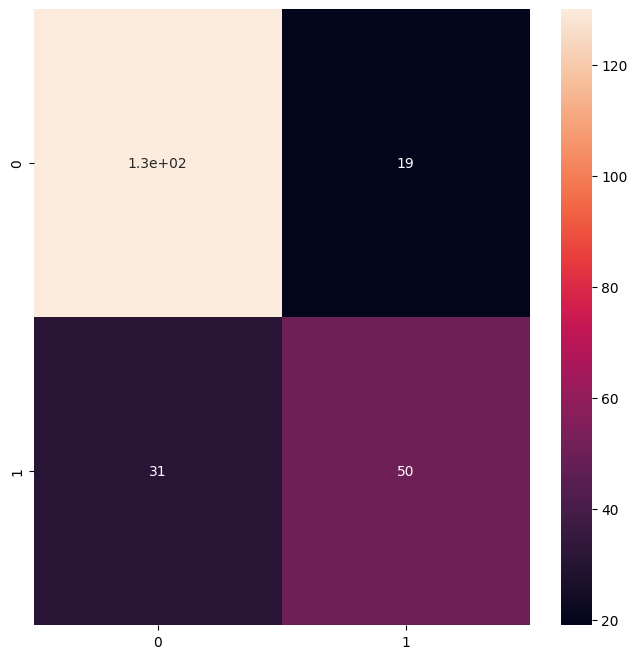

In [ ]:
from sklearn.metrics import confusion_matrix,log_loss,roc_auc_score,matthews_corrcoef
from sklearn.ensemble import VotingClassifier
import seaborn as sns

#estimators=[('dtc', dtc_pipe), ('svc', svc_pipe),('ann', MyKerasModel())]
hv_estimators1=[ ('dt', dt1), ('lr',lr1),('ann', DB_HardKerasModel())]
sv_estimators1=[ ('dt', dt1), ('lr',lr1),('ann', DB_SoftKerasModel())]

#create our voting classifier, inputting our models
hv_ensemble1 = VotingClassifier(hv_estimators1, voting='hard')

hv_ensemble1.fit(X_train1, Y_train1)

hv_ensemble1.score(X_test1, Y_test1)

y_pred_hv1 = hv_ensemble1.predict(X_test1)

CM_hv1 = confusion_matrix(Y_test1,y_pred_hv1)
sns.heatmap(CM_hv1, annot=True)

TN1 = CM_hv1[0][0]
FN1 = CM_hv1[1][0]
TP1 = CM_hv1[1][1]
FP1 = CM_hv1[0][1]
specificity_hv1 = TN1/(TN1+FP1)
loss_log_hv1 = log_loss(Y_test1, y_pred_hv1)
acc_hv1 = accuracy_score(Y_test1, y_pred_hv1)
roc_hv1 = roc_auc_score(Y_test1, y_pred_hv1)
prec_hv1 = precision_score(Y_test1, y_pred_hv1)
rec_hv1 = recall_score(Y_test1, y_pred_hv1)
f1s_hv1 = f1_score(Y_test1, y_pred_hv1)

score_hv1 = round(acc_hv1*100,2)
precision_hv1 = round(prec_hv1*100,2)
recall_hv1 = round(rec_hv1*100,2)
f1_hv1 = round(f1s_hv1*100,2)

mathew_hv1 = matthews_corrcoef(Y_test1, y_pred_hv1)
model_results_hv1 =pd.DataFrame([['Hard Voting',acc_hv1, prec_hv1,rec_hv1,specificity_hv1, f1s_hv1,roc_hv1, loss_log_hv1,mathew_hv1]],
               columns = ['Model', 'Accuracy','Precision', 'Sensitivity','Specificity', 'F1 Score','ROC','Log_Loss','mathew_corrcoef'])

model_results_hv1

#Soft Voting

#CKD

Fitting 3 folds for each of 75 candidates, totalling 225 fits
Fitting 3 folds for each of 400 candidates, totalling 1200 fits
3/3 [==============================] - 0s 7ms/step


Model  Accuracy  Precision  Sensitivity  Specificity  F1 Score  \
0  Soft Voting      0.95        1.0     0.923077          1.0      0.96   

        ROC  Log_Loss  mathew_corrcoef  
0  0.961538  1.802183         0.898717

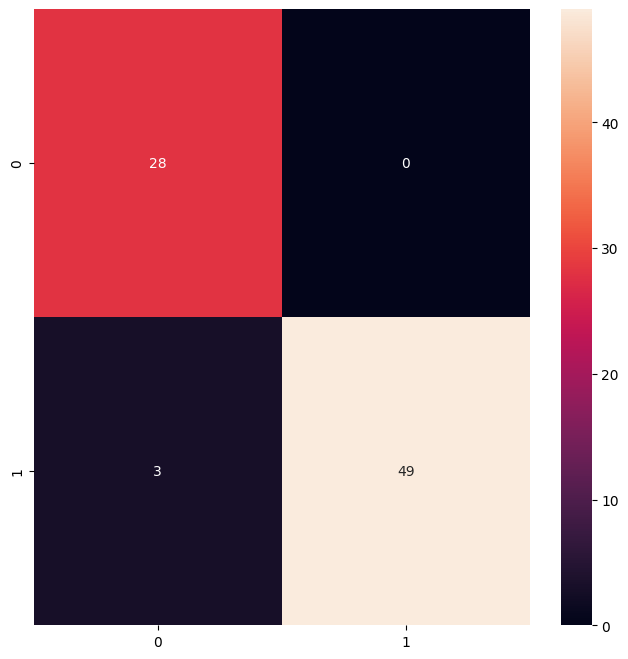

In [ ]:
sv_ensemble = VotingClassifier(sv_estimators, voting='soft')

sv_ensemble.fit(X_train, Y_train)

sv_ensemble.score(X_test, Y_test)

y_pred_sv = sv_ensemble.predict(X_test)

CM_sv = confusion_matrix(Y_test,y_pred_hv)
sns.heatmap(CM_sv, annot=True)

TN = CM_sv[0][0]
FN = CM_sv[1][0]
TP = CM_sv[1][1]
FP = CM_sv[0][1]
specificity_sv = TN/(TN+FP)
loss_log_sv = log_loss(Y_test, y_pred_sv)
acc_sv = accuracy_score(Y_test, y_pred_sv)
roc_sv = roc_auc_score(Y_test, y_pred_sv)
prec_sv = precision_score(Y_test, y_pred_sv)
rec_sv = recall_score(Y_test, y_pred_sv)
f1s_sv = f1_score(Y_test, y_pred_sv)

score_sv= round(acc_sv*100,2)
precision_sv= round(prec_sv*100,2)
recall_sv = round(rec_sv*100,2)
f1_sv = round(f1s_sv*100,2)

mathew_sv = matthews_corrcoef(Y_test, y_pred_sv)
model_results_sv =pd.DataFrame([['Soft Voting',acc_sv, prec_sv,rec_sv,specificity_sv, f1s_sv,roc_sv, loss_log_sv,mathew_sv]],
               columns = ['Model', 'Accuracy','Precision', 'Sensitivity','Specificity', 'F1 Score','ROC','Log_Loss','mathew_corrcoef'])

model_results_sv

#Diabetes

Fitting 3 folds for each of 75 candidates, totalling 225 fits
Fitting 3 folds for each of 400 candidates, totalling 1200 fits
8/8 [==============================] - 0s 4ms/step


Model  Accuracy  Precision  Sensitivity  Specificity  F1 Score  \
0  Soft Voting  0.773913   0.773585     0.506173          1.0   0.61194   

        ROC  Log_Loss  mathew_corrcoef  
0  0.712818     8.149          0.48278

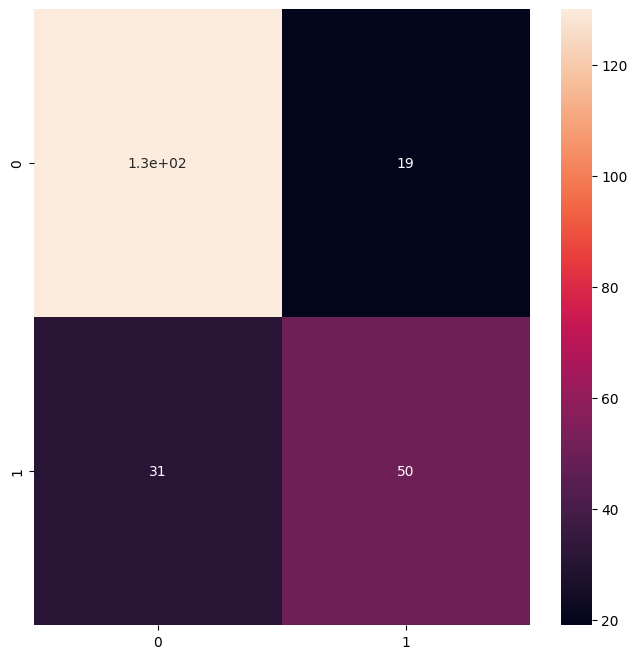

In [ ]:
sv_ensemble1 = VotingClassifier(sv_estimators, voting='soft')

sv_ensemble1.fit(X_train1, Y_train1)

sv_ensemble1.score(X_test1, Y_test1)

y_pred_sv1 = sv_ensemble1.predict(X_test1)

CM_sv1=confusion_matrix(Y_test1,y_pred_hv1)
sns.heatmap(CM_sv1, annot=True)

TN1 = CM_sv1[0][0]
FN1 = CM_sv1[1][0]
TP1 = CM_sv1[1][1]
FP1 = CM_sv1[0][1]
specificity_sv1 = TN1/(TN1+FP)
loss_log_sv1 = log_loss(Y_test1, y_pred_sv1)
acc_sv1 = accuracy_score(Y_test1, y_pred_sv1)
roc_sv1 = roc_auc_score(Y_test1, y_pred_sv1)
prec_sv1 = precision_score(Y_test1, y_pred_sv1)
rec_sv1 = recall_score(Y_test1, y_pred_sv1)
f1s_sv1 = f1_score(Y_test1, y_pred_sv1)

score_sv1 = round(acc_sv1*100,2)
precision_sv1 = round(prec_sv1*100,2)
recall_sv1 = round(rec_sv1*100,2)
f1_sv1 = round(f1s_sv1*100,2)

mathew_sv1 = matthews_corrcoef(Y_test1, y_pred_sv1)
model_results_sv1 =pd.DataFrame([['Soft Voting',acc_sv1, prec_sv1,rec_sv1,specificity_sv1, f1s_sv1,roc_sv1, loss_log_sv1,mathew_sv1]],
               columns = ['Model', 'Accuracy','Precision', 'Sensitivity','Specificity', 'F1 Score','ROC','Log_Loss','mathew_corrcoef'])

model_results_sv1

#**Results**

CKD

In [ ]:
acc_scores = [score_dt,score_lr,score_nn,score_hv,score_sv]
pre_scores = [precision_dt,precision_lr,precision_nn, precision_hv,precision_sv]
rec_scores = [recall_dt,recall_lr,recall_nn, recall_hv,recall_sv]
f1_scores = [f1_dt,f1_lr,f1_nn, f1_hv,f1_sv]
algorithms_ckd = ["Decision Tree","Logistic Regression","Neural Network", "Hard Voting","Soft Voting"]

DB

In [ ]:
acc_scores1 = [score_dt1,score_lr1,score_nn1,score_hv1,score_sv1]
pre_scores1 = [precision_dt1,precision_lr1,precision_nn1, precision_hv1,precision_sv1]
rec_scores1 = [recall_dt1,recall_lr1,recall_nn1, recall_hv1,recall_sv1]
f1_scores1 = [f1_dt1,f1_lr1,f1_nn1, f1_hv1,f1_sv1]
algorithms_db = ["Decision Tree","Logistic Regression","Neural Network", "Hard Voting","Soft Voting"]

In [ ]:
#VI. Output final score
algorithms_ckd = ["Decision Tree","Logistic Regression","Neural Network", "Hard Voting","Soft Voting"]
algorithms_db = ["Decision Tree","Logistic Regression","Neural Network", "Hard Voting","Soft Voting"]

The accuracy score achieved using Decision Tree is: 98.75 %
The accuracy score achieved using Logistic Regression is: 92.5 %
The accuracy score achieved using Neural Network is: 80.0 %
The accuracy score achieved using Hard Voting is: 96.25 %
The accuracy score achieved using Soft Voting is: 95.0 %


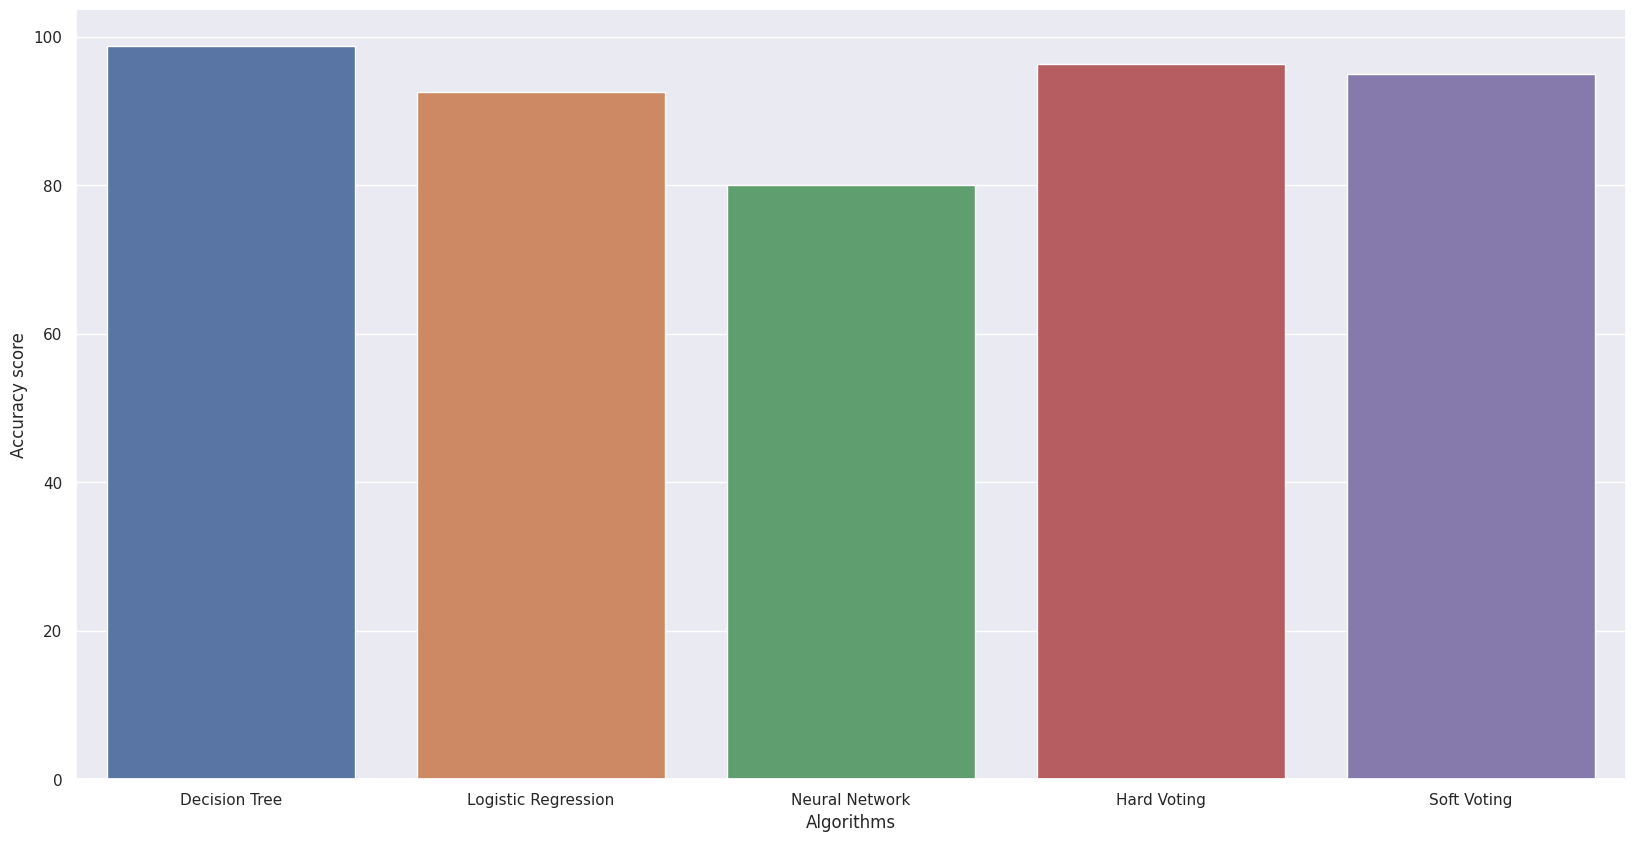


The precision score achieved using Decision Tree is: 100.0 %
The precision score achieved using Logistic Regression is: 100.0 %
The precision score achieved using Neural Network is: 92.86 %
The precision score achieved using Hard Voting is: 100.0 %
The precision score achieved using Soft Voting is: 100.0 %


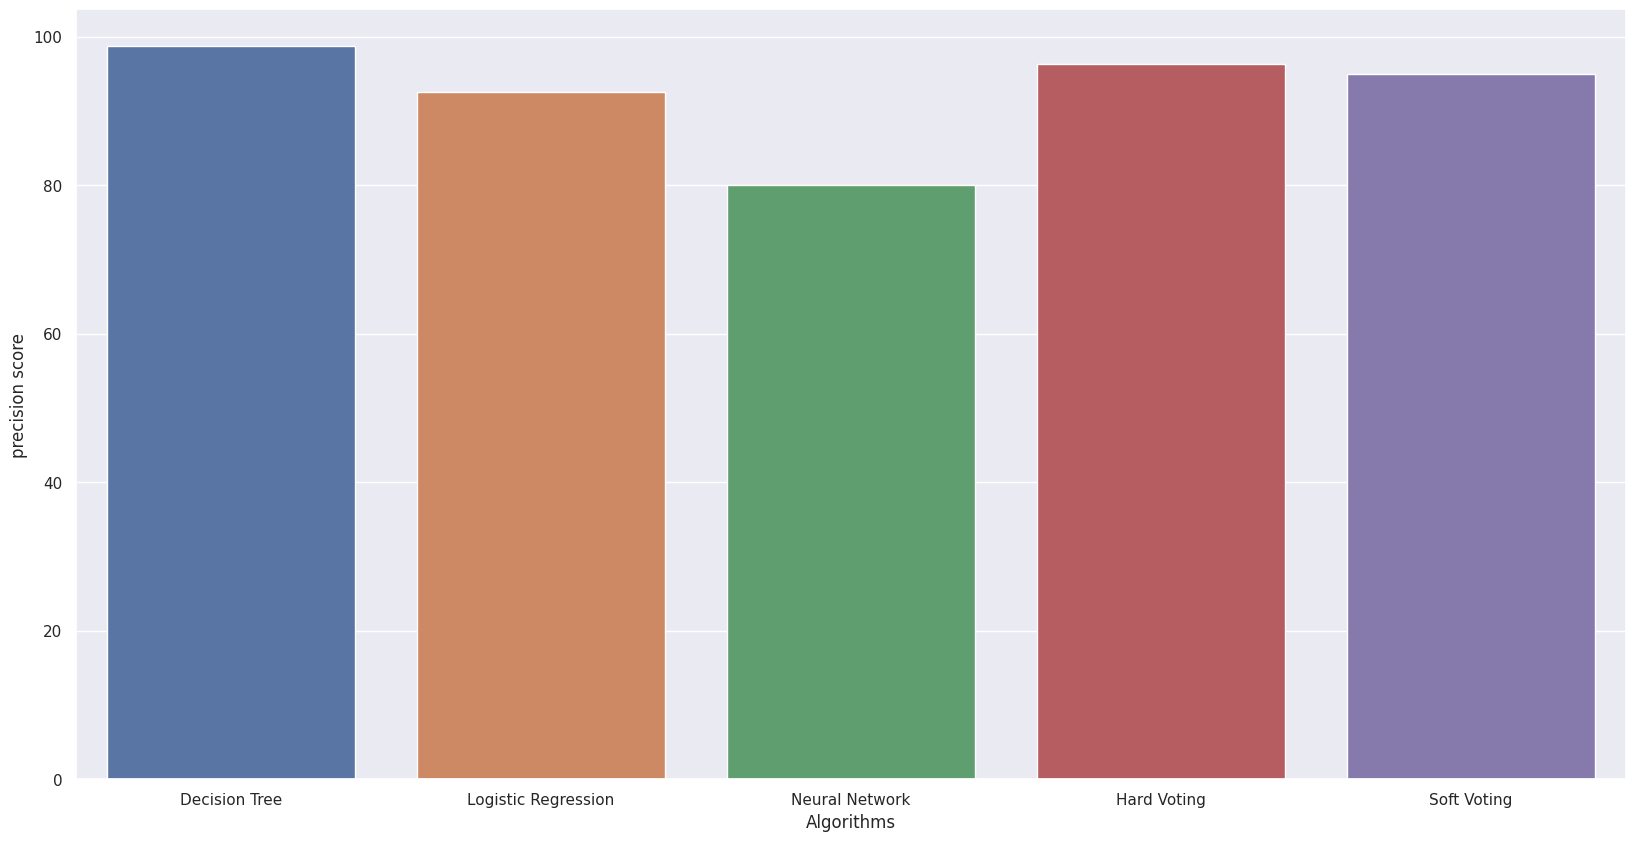


The recall score achieved using Decision Tree is: 98.08 %
The recall score achieved using Logistic Regression is: 88.46 %
The recall score achieved using Neural Network is: 75.0 %
The recall score achieved using Hard Voting is: 94.23 %
The recall score achieved using Soft Voting is: 92.31 %


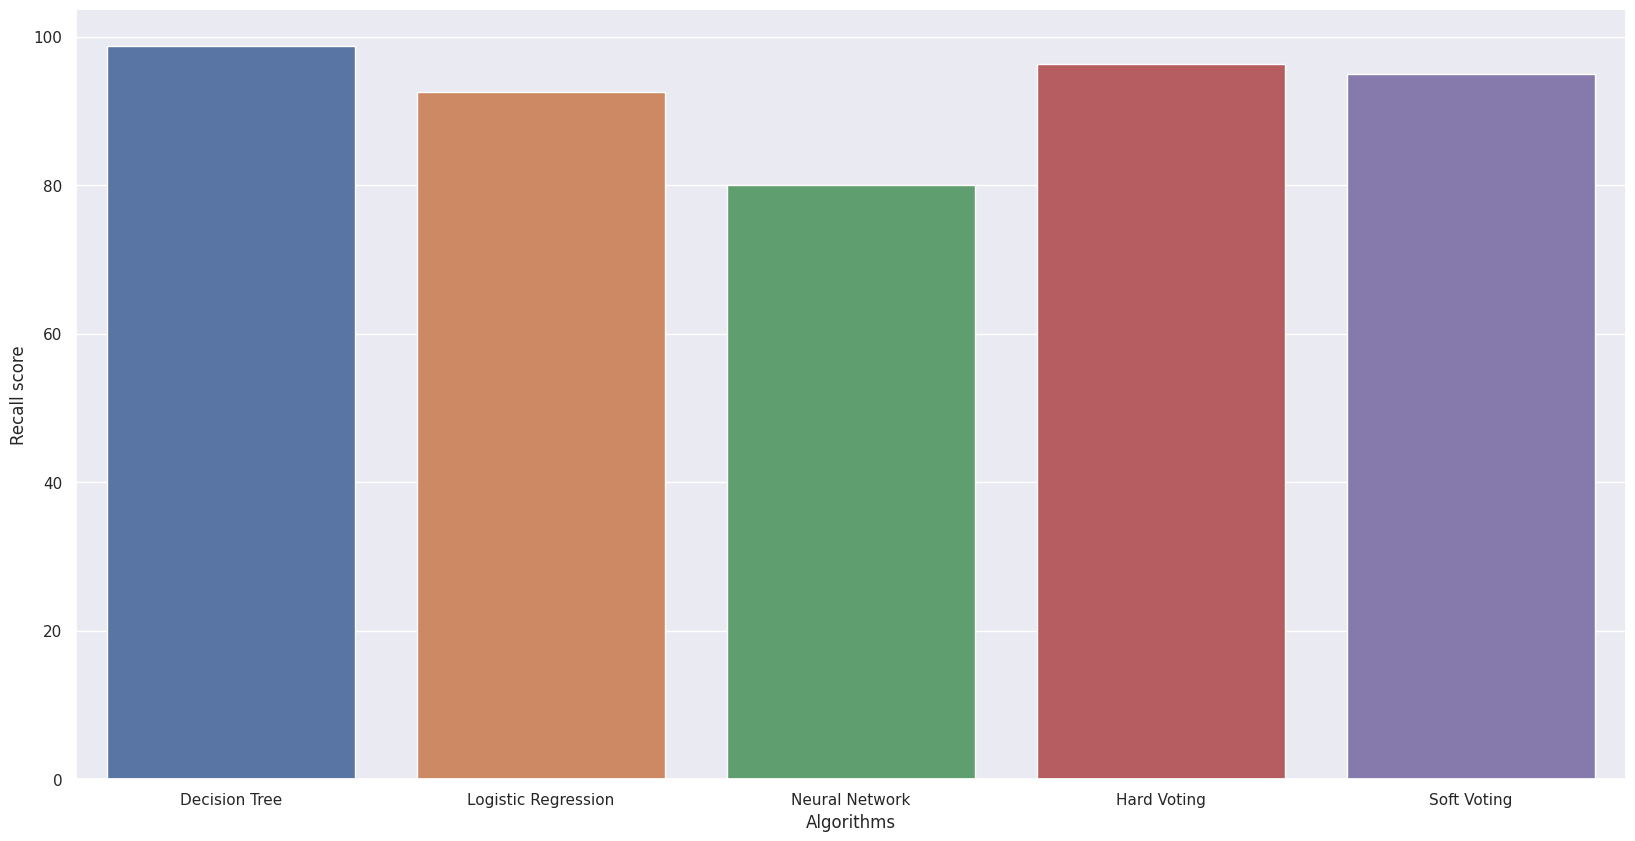


The f1 score achieved using Decision Tree is: 99.03 %
The f1 score achieved using Logistic Regression is: 93.88 %
The f1 score achieved using Neural Network is: 82.98 %
The f1 score achieved using Hard Voting is: 97.03 %
The f1 score achieved using Soft Voting is: 96.0 %


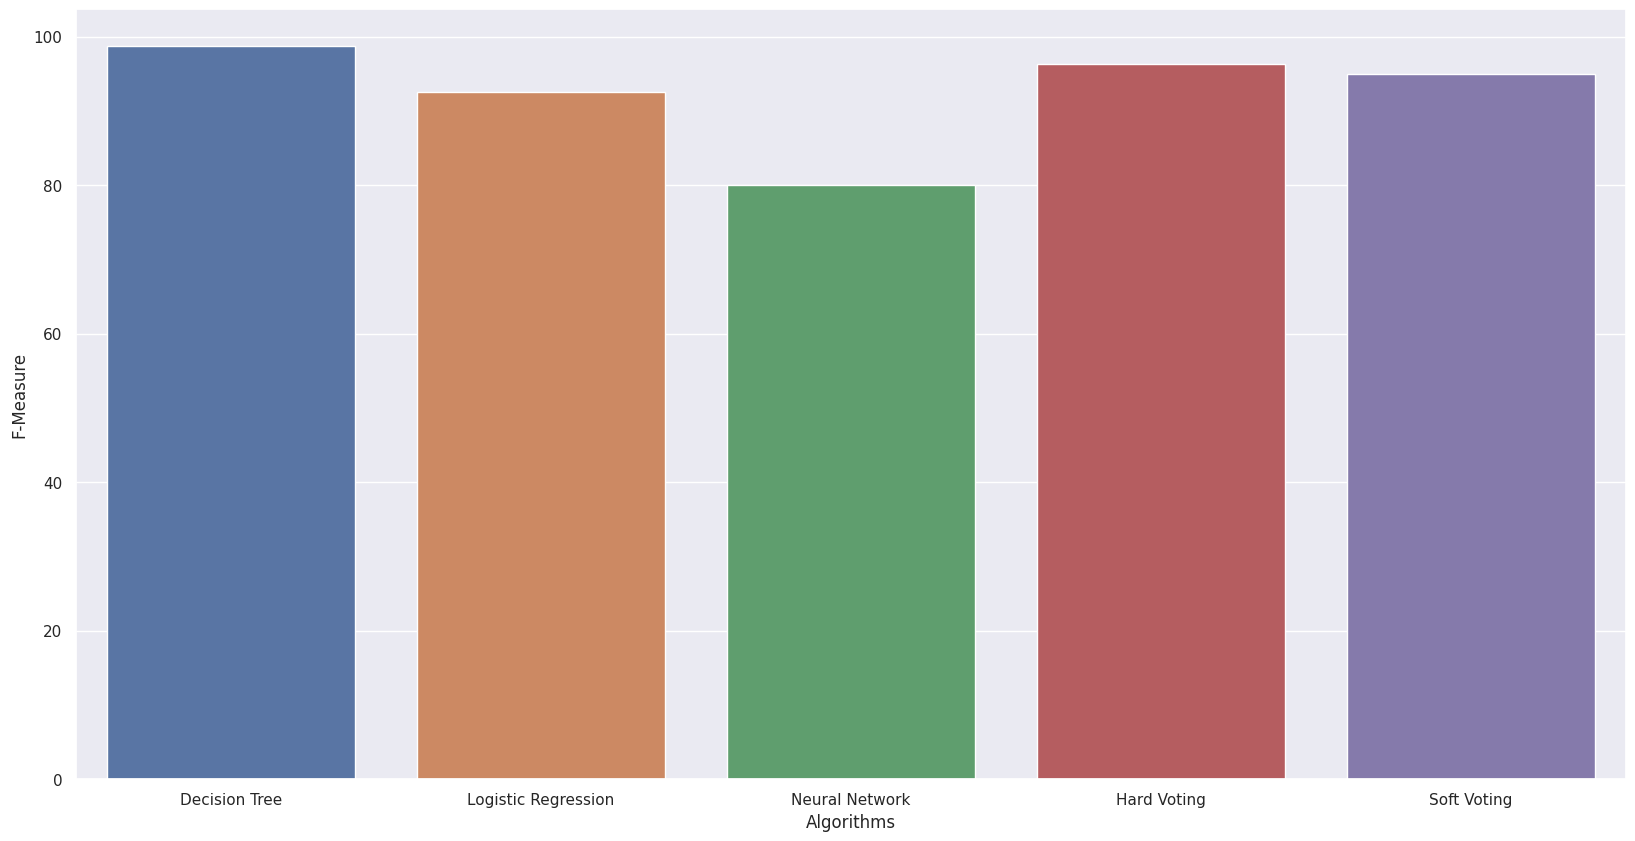

In [ ]:
#CKD

for i in range(len(algorithms_ckd)):
    print("The accuracy score achieved using "+algorithms_ckd[i]+" is: "+str(acc_scores[i])+" %")

sns.set(rc={'figure.figsize':(20,10)})
plt.xlabel("Algorithms")
plt.ylabel("Accuracy score")
sns.barplot(x=algorithms_ckd,y=acc_scores)
plt.show()

print()

for i in range(len(algorithms_ckd)):
    print("The precision score achieved using "+algorithms_ckd[i]+" is: "+str(pre_scores[i])+" %")

sns.set(rc={'figure.figsize':(20,10)})
plt.xlabel("Algorithms")
plt.ylabel("precision score")
sns.barplot(x=algorithms_ckd,y=acc_scores)
plt.show()

print()

for i in range(len(algorithms_ckd)):
    print("The recall score achieved using "+algorithms_ckd[i]+" is: "+str(rec_scores[i])+" %")

sns.set(rc={'figure.figsize':(20,10)})
plt.xlabel("Algorithms")
plt.ylabel("Recall score")
sns.barplot(x=algorithms_ckd,y=acc_scores)
plt.show()

print()

for i in range(len(algorithms_ckd)):
    print("The f1 score achieved using "+algorithms_ckd[i]+" is: "+str(f1_scores[i])+" %")

sns.set(rc={'figure.figsize':(20,10)})
plt.xlabel("Algorithms")
plt.ylabel("F-Measure")
sns.barplot(x=algorithms_ckd,y=acc_scores)
plt.show()

print()

The accuracy score achieved using Decision Tree is: 98.75 %
The accuracy score achieved using Logistic Regression is: 92.5 %
The accuracy score achieved using Neural Network is: 80.0 %
The accuracy score achieved using Hard Voting is: 96.25 %
The accuracy score achieved using Soft Voting is: 95.0 %


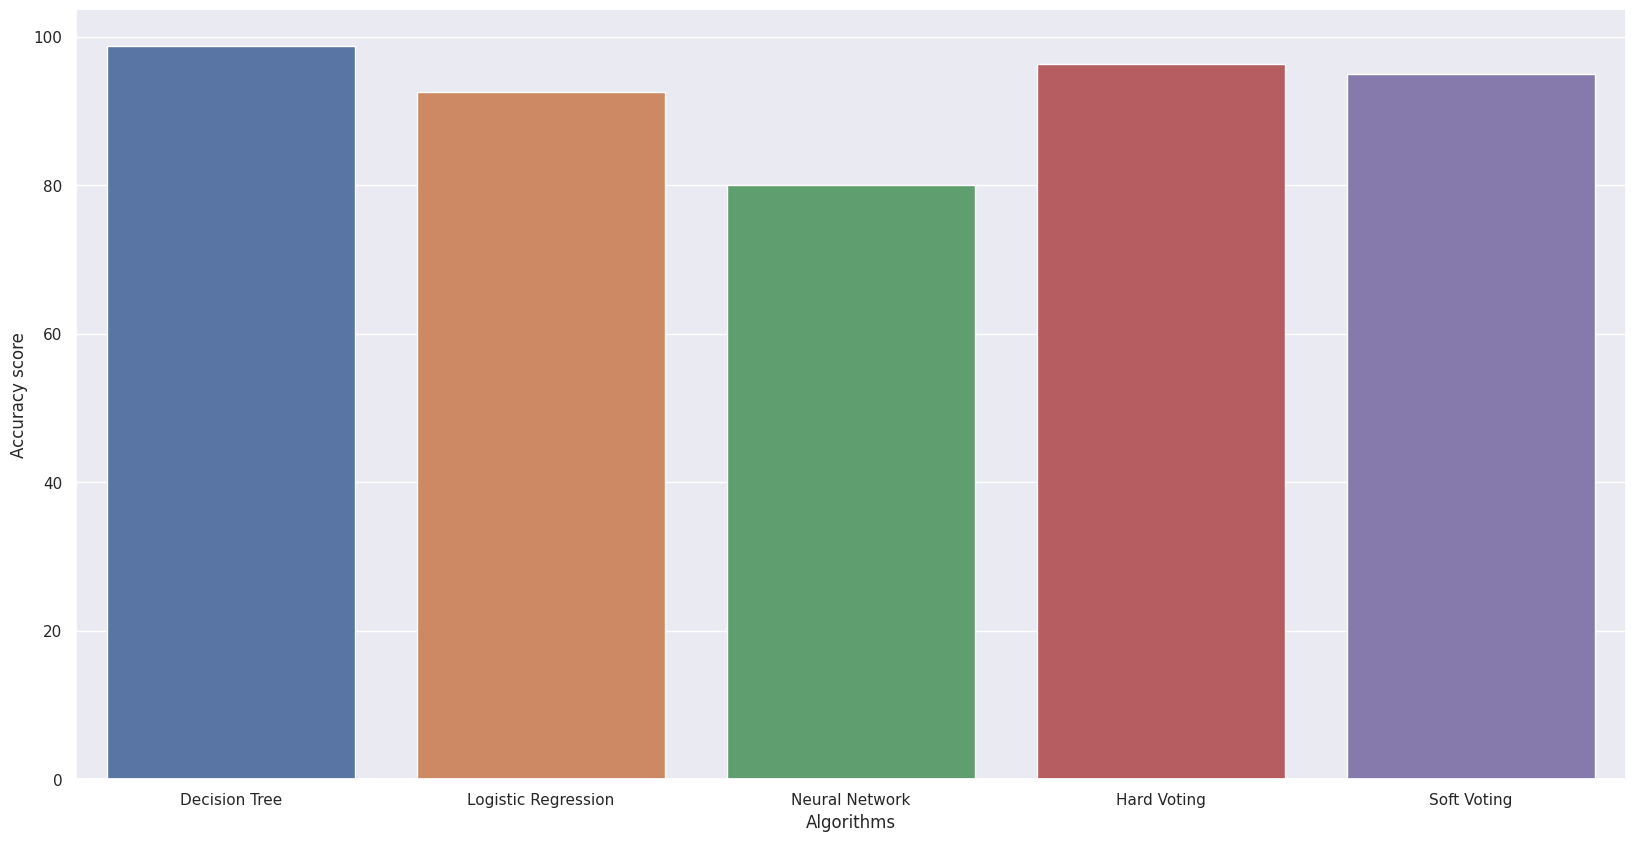


The precision score achieved using Decision Tree is: 100.0 %
The precision score achieved using Logistic Regression is: 100.0 %
The precision score achieved using Neural Network is: 92.86 %
The precision score achieved using Hard Voting is: 100.0 %
The precision score achieved using Soft Voting is: 100.0 %


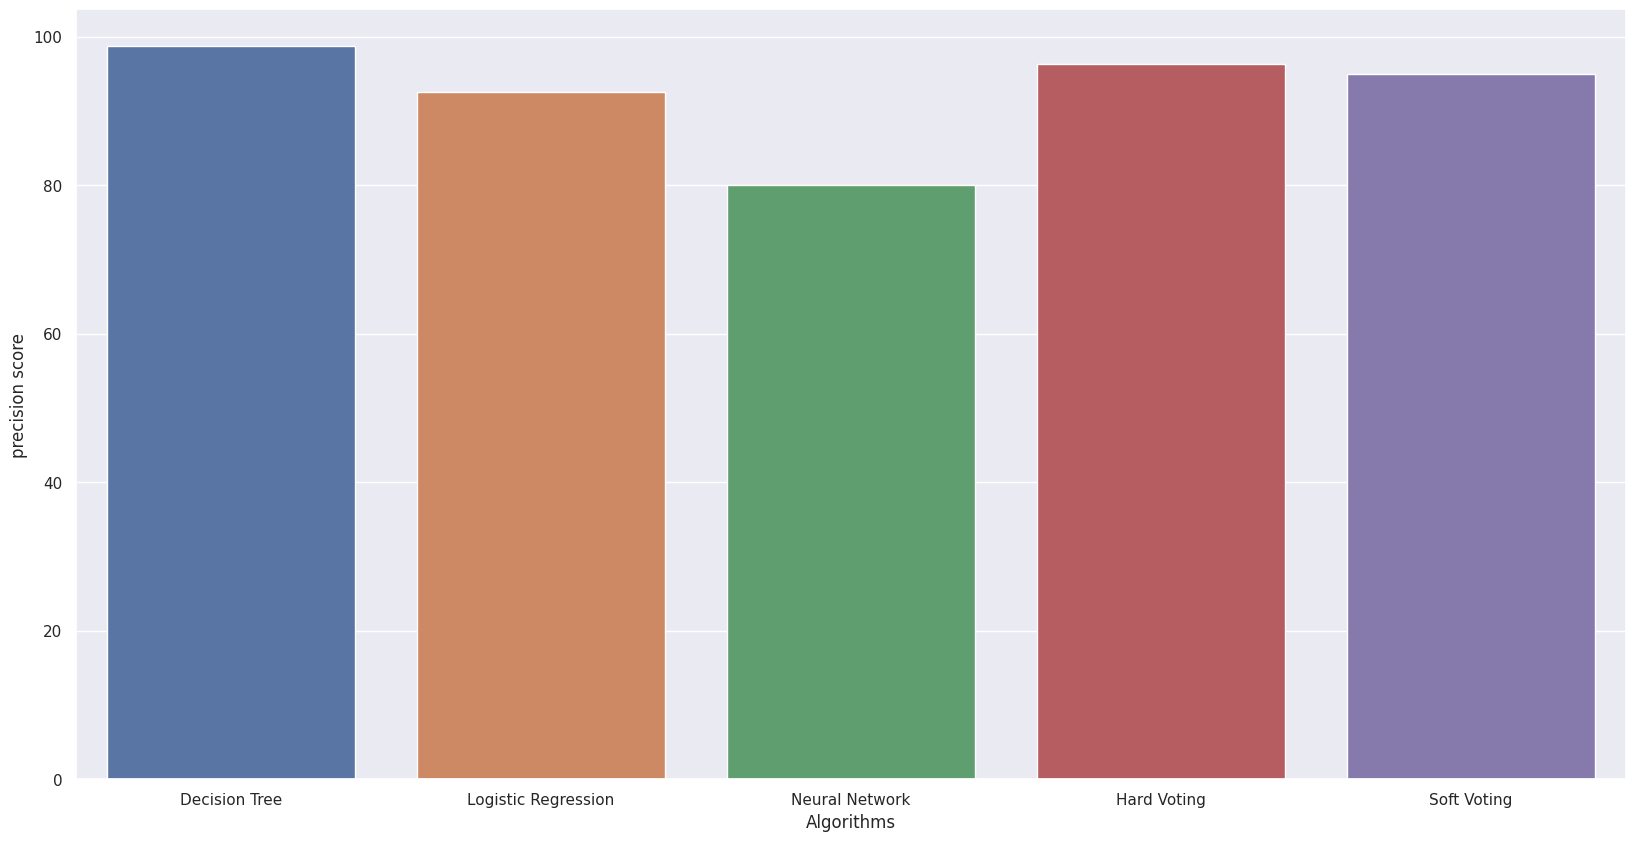


The recall score achieved using Decision Tree is: 98.08 %
The recall score achieved using Logistic Regression is: 88.46 %
The recall score achieved using Neural Network is: 75.0 %
The recall score achieved using Hard Voting is: 94.23 %
The recall score achieved using Soft Voting is: 92.31 %


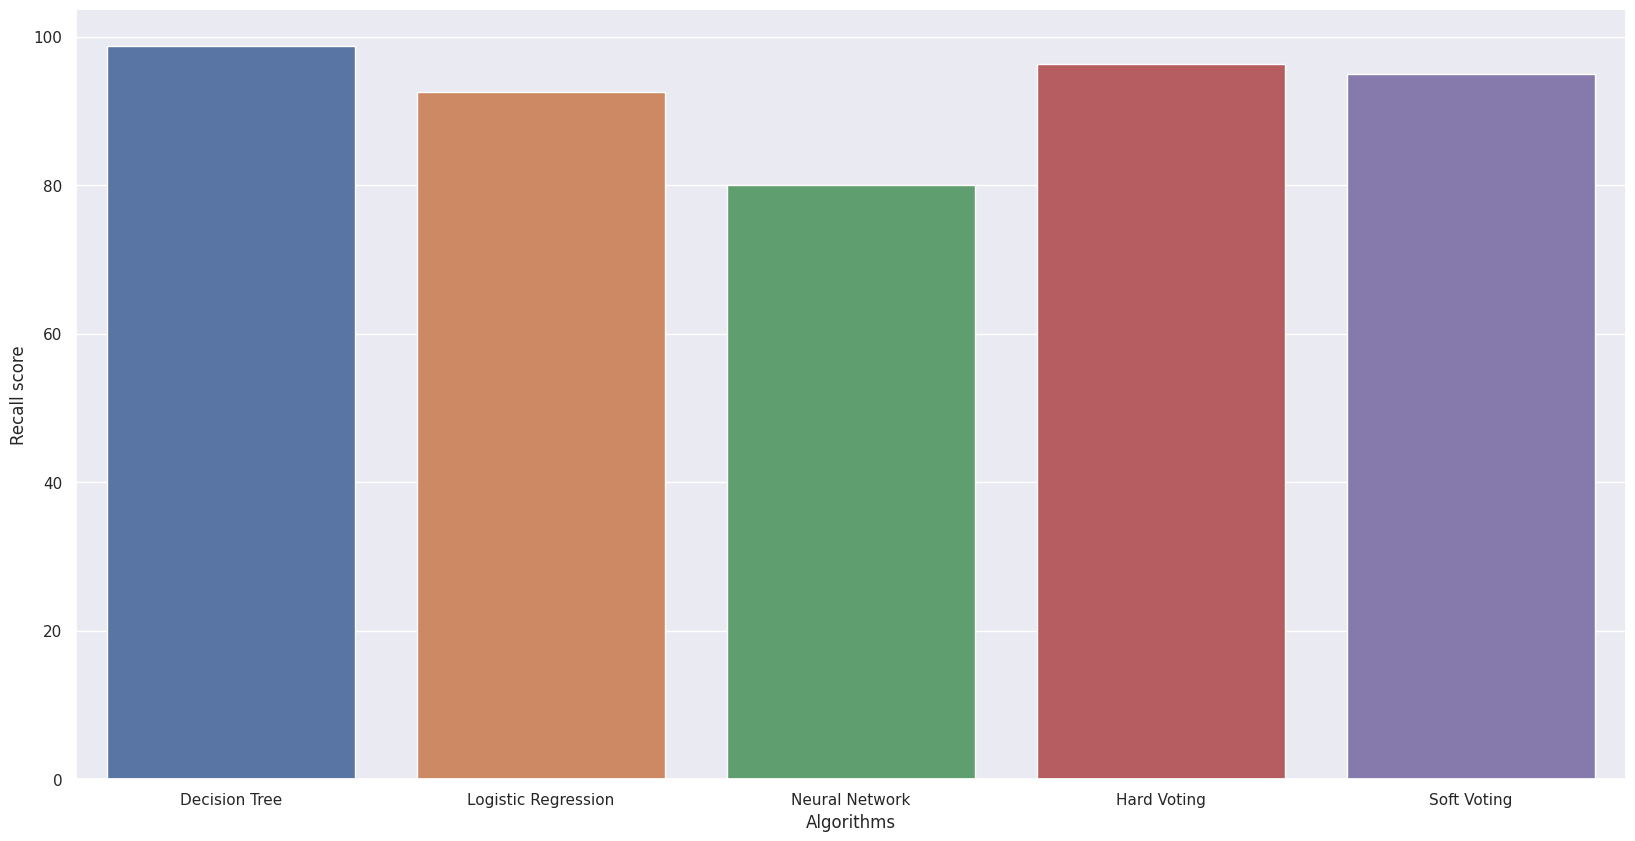


The f1 score achieved using Decision Tree is: 99.03 %
The f1 score achieved using Logistic Regression is: 93.88 %
The f1 score achieved using Neural Network is: 82.98 %
The f1 score achieved using Hard Voting is: 97.03 %
The f1 score achieved using Soft Voting is: 96.0 %


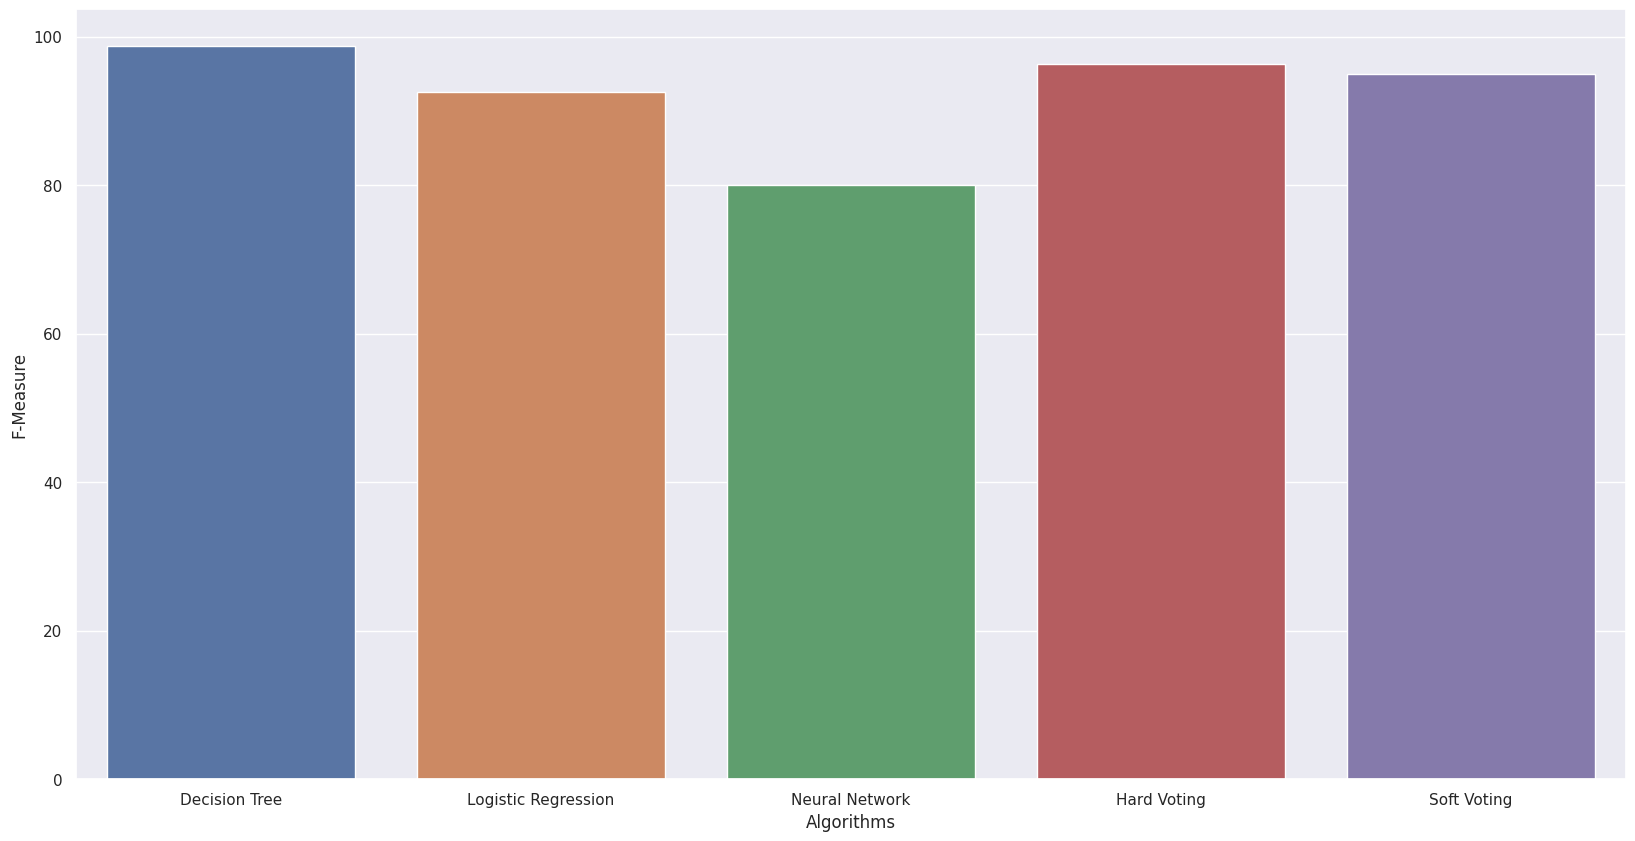

In [ ]:
#DB

for i in range(len(algorithms_db)):
    print("The accuracy score achieved using "+algorithms_db[i]+" is: "+str(acc_scores[i])+" %")

sns.set(rc={'figure.figsize':(20,10)})
plt.xlabel("Algorithms")
plt.ylabel("Accuracy score")
sns.barplot(x=algorithms_db,y=acc_scores)
plt.show()

print()

for i in range(len(algorithms_db)):
    print("The precision score achieved using "+algorithms_db[i]+" is: "+str(pre_scores[i])+" %")

sns.set(rc={'figure.figsize':(20,10)})
plt.xlabel("Algorithms")
plt.ylabel("precision score")
sns.barplot(x=algorithms_db,y=acc_scores)
plt.show()

print()

for i in range(len(algorithms_db)):
    print("The recall score achieved using "+algorithms_db[i]+" is: "+str(rec_scores[i])+" %")

sns.set(rc={'figure.figsize':(20,10)})
plt.xlabel("Algorithms")
plt.ylabel("Recall score")
sns.barplot(x=algorithms_db,y=acc_scores)
plt.show()

print()

for i in range(len(algorithms_db)):
    print("The f1 score achieved using "+algorithms_db[i]+" is: "+str(f1_scores[i])+" %")

sns.set(rc={'figure.figsize':(20,10)})
plt.xlabel("Algorithms")
plt.ylabel("F-Measure")
sns.barplot(x=algorithms_db,y=acc_scores)
plt.show()

print()

In [ ]:
eval_scores_ckd = pd.DataFrame(list(zip(acc_scores,pre_scores,rec_scores,f1_scores)),index=algorithms_ckd,columns=['accuracy','precision','recall','f1-score'])
eval_scores_db = pd.DataFrame(list(zip(acc_scores1,pre_scores1,rec_scores1,f1_scores1)),index=algorithms_db,columns=['accuracy','precision','recall','f1-score'])

In [ ]:
eval_scores_ckd.head(10)

accuracy  precision  recall  f1-score
Decision Tree           98.75     100.00   98.08     99.03
Logistic Regression     92.50     100.00   88.46     93.88
Neural Network          80.00      92.86   75.00     82.98
Hard Voting             96.25     100.00   94.23     97.03
Soft Voting             95.00     100.00   92.31     96.00

<Figure size 1000x1000 with 0 Axes>

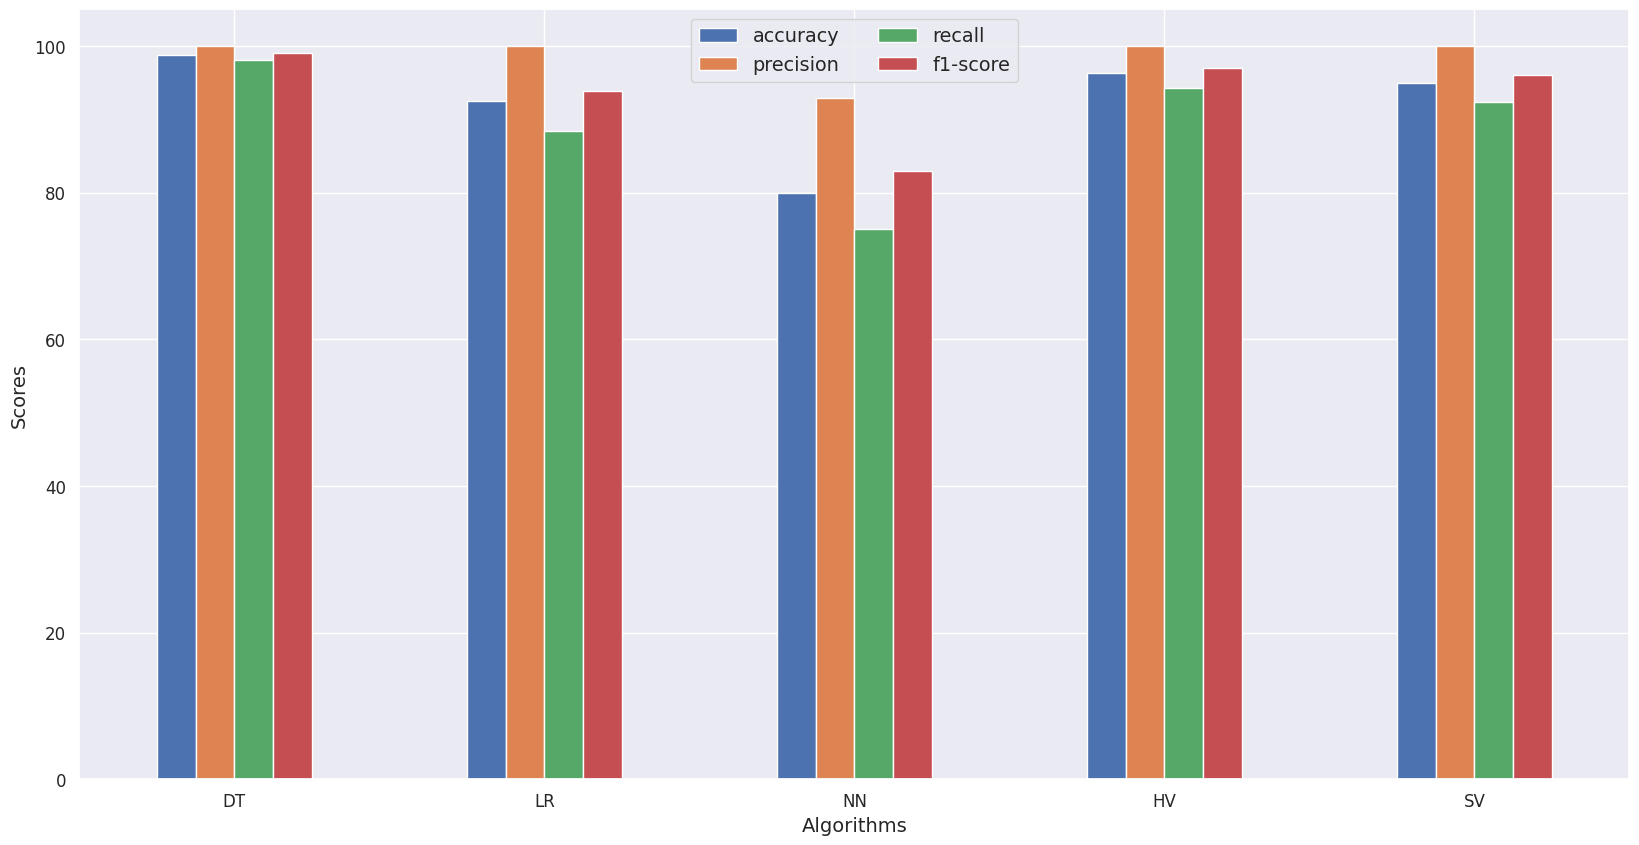

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from google.colab import files

N = 5
ind = np.arange(N)
width = 0.25

plt.figure(figsize=(10,10))
eval_scores_ckd.plot.bar()
#plt.suptitle('Comparision Analysis', fontsize=20)
plt.xlabel("Algorithms", fontsize=14)
plt.ylabel("Scores", fontsize=14)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.xticks(rotation = 360)
plt.xticks(ind,('DT','LR','NN','HV','SV'))
plt.legend(fontsize = 12)
plt.legend(loc='upper center', prop={'size':13.89}, ncol=2)
plt.savefig('comparision_scores_ckd.eps')
plt.show()
files.download('comparision_scores_ckd.eps')

In [ ]:
eval_scores_db.head(10)

accuracy  precision  recall  f1-score
Decision Tree           75.65      63.16   74.07     68.18
Logistic Regression     80.00      77.78   60.49     68.06
Neural Network          64.78       0.00    0.00      0.00
Hard Voting             78.26      72.46   61.73     66.67
Soft Voting             77.39      77.36   50.62     61.19

<Figure size 1000x1000 with 0 Axes>

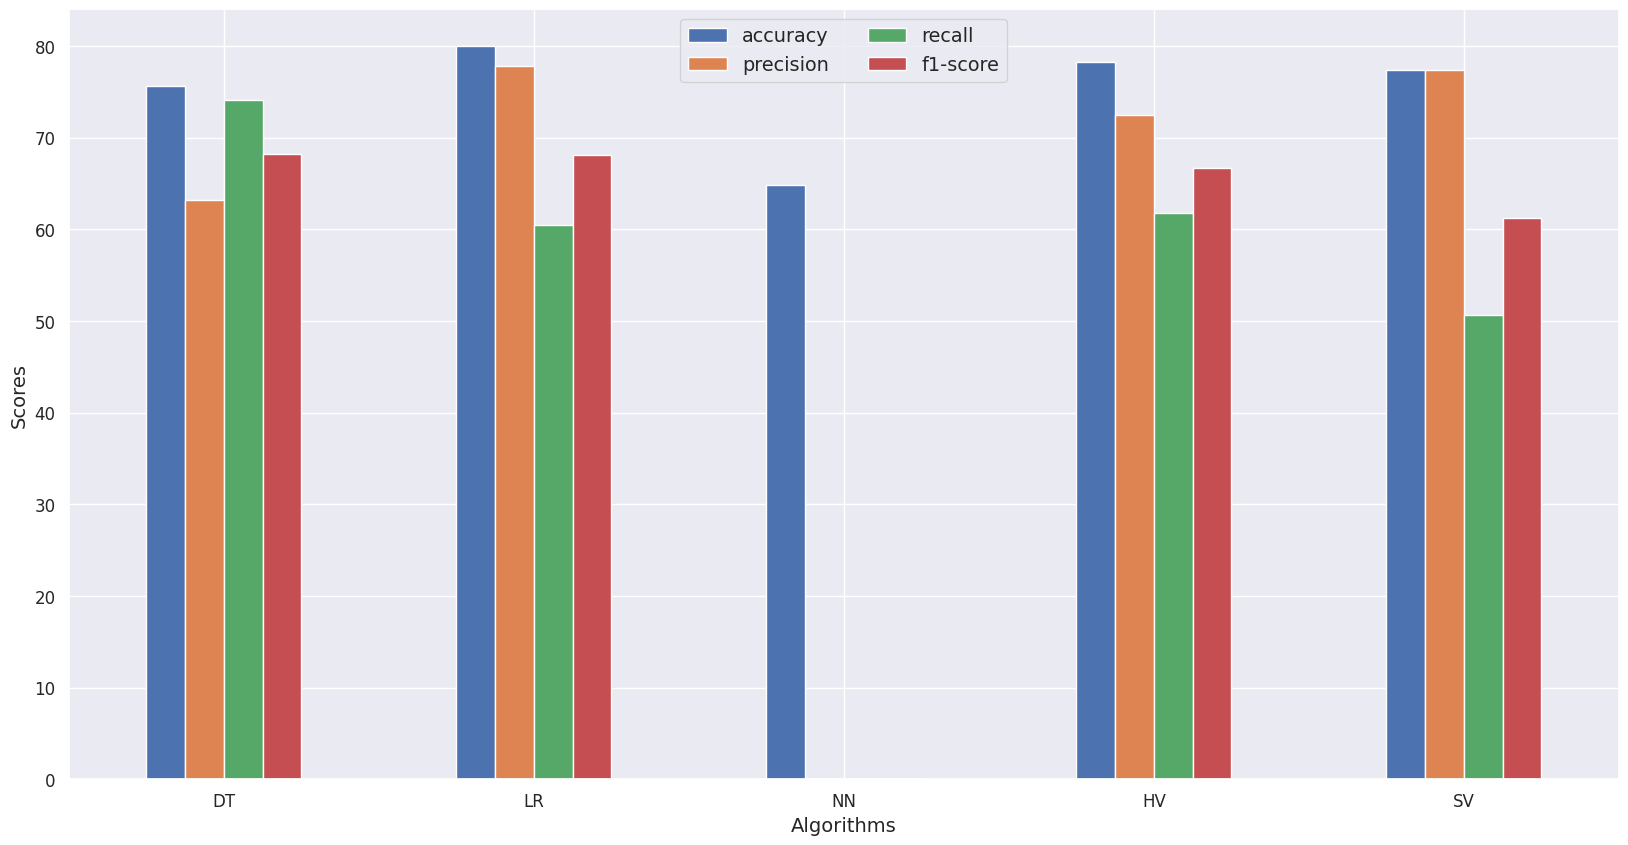

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from google.colab import files

N = 5
ind = np.arange(N)
width = 0.25

plt.figure(figsize=(10,10))
eval_scores_db.plot.bar()
#plt.suptitle('Comparision Analysis', fontsize=20)
plt.xlabel("Algorithms", fontsize=14)
plt.ylabel("Scores", fontsize=14)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.xticks(rotation = 360)
plt.xticks(ind,('DT','LR','NN','HV','SV'))
plt.legend(fontsize = 12)
plt.legend(loc='upper center', prop={'size':13.89}, ncol=2)
plt.savefig('comparision_scores_db.eps')
plt.show()
files.download('comparision_scores_db.eps')

In [ ]:
"""
import matplotlib.pyplot as plt
from google.colab import files

def roc_auc_plot(y_true, y_proba, label=' ', l='-', lw=1.0):
    from sklearn.metrics import roc_curve, roc_auc_score
    fpr, tpr, _ = roc_curve(y_true, y_proba[:,1])
    ax.plot(fpr, tpr, linestyle=l, linewidth=lw,
            label="%s (area=%.3f)"%(label,roc_auc_score(y_true, y_proba[:,1])))

f, ax = plt.subplots(figsize=(12,8))

roc_auc_plot(Y_test,ensemble1.predict_proba(X_test),label='Soft Voting Classifier ',l='-')
roc_auc_plot(Y_test,nb.predict_proba(X_test),label='Naive Bayes Classifier ',l='-')
roc_auc_plot(Y_test,sv.predict_proba(X_test),label='Support Vector Machine ',l='-')
roc_auc_plot(Y_test,knn.predict_proba(X_test),label='K-Nearest Neighbors ',l='-')
roc_auc_plot(Y_test,xgb_model.predict_proba(X_test),label='XGboost',l='-')

ax.plot([0,1], [0,1], color='k', linewidth=0.5, linestyle='--',
        )
ax.legend(loc="lower right")
ax.set_xlabel('False Positive Rate')
ax.set_ylabel('True Positive Rate')
ax.set_xlim([0, 1])
ax.set_ylim([0, 1])
ax.set_title('Receiver Operator Characteristic curves')
sns.despine()
plt.savefig('AUC.eps')
plt.show()
files.download('AUC.eps')
"""

'\nimport matplotlib.pyplot as plt\nfrom google.colab import files\n\ndef roc_auc_plot(y_true, y_proba, label=\' \', l=\'-\', lw=1.0):\n    from sklearn.metrics import roc_curve, roc_auc_score\n    fpr, tpr, _ = roc_curve(y_true, y_proba[:,1])\n    ax.plot(fpr, tpr, linestyle=l, linewidth=lw,\n            label="%s (area=%.3f)"%(label,roc_auc_score(y_true, y_proba[:,1])))\n\nf, ax = plt.subplots(figsize=(12,8))\n\nroc_auc_plot(Y_test,ensemble1.predict_proba(X_test),label=\'Soft Voting Classifier \',l=\'-\')\nroc_auc_plot(Y_test,nb.predict_proba(X_test),label=\'Naive Bayes Classifier \',l=\'-\')\nroc_auc_plot(Y_test,sv.predict_proba(X_test),label=\'Support Vector Machine \',l=\'-\')\nroc_auc_plot(Y_test,knn.predict_proba(X_test),label=\'K-Nearest Neighbors \',l=\'-\')\nroc_auc_plot(Y_test,xgb_model.predict_proba(X_test),label=\'XGboost\',l=\'-\')\n\nax.plot([0,1], [0,1], color=\'k\', linewidth=0.5, linestyle=\'--\',\n        )\nax.legend(loc="lower right")\nax.set_xlabel(\'False Positiv

In [ ]:
"""
def precision_recall_plot(y_true, y_proba, label=' ', l='-', lw=1.0):
    from sklearn.metrics import precision_recall_curve, average_precision_score
    precision, recall, _ = precision_recall_curve(Y_test, y_proba[:,1])
    average_precision = average_precision_score(Y_test, y_proba[:,1], average="micro")
    ax.plot(recall, precision, label='%s (average=%.3f)'%(label,average_precision), linestyle=l, linewidth=lw)

f, ax = plt.subplots(figsize=(14,10))

precision_recall_plot(Y_test,ensemble1.predict_proba(X_test),label='Soft Voting Classifier ',l='-')
precision_recall_plot(Y_test,nb.predict_proba(X_test),label='Naive Bayes Classifier ',l='-')
precision_recall_plot(Y_test,sv.predict_proba(X_test),label='Support Vector Machine ',l='-')
precision_recall_plot(Y_test,knn.predict_proba(X_test),label='K-Nearest Neighbors ',l='-')
precision_recall_plot(Y_test,xgb_model.predict_proba(X_test),label='XGboost',l='-')
ax.set_xlabel('Recall')
ax.set_ylabel('Precision')
ax.legend(loc="lower left")
ax.grid(True)
ax.set_xlim([0, 1])
ax.set_ylim([0, 1])
ax.set_title('Precision-recall curves')
sns.despine()
plt.savefig('P-R.eps')
plt.show()
files.download('P-R.eps')
"""

'\ndef precision_recall_plot(y_true, y_proba, label=\' \', l=\'-\', lw=1.0):\n    from sklearn.metrics import precision_recall_curve, average_precision_score\n    precision, recall, _ = precision_recall_curve(Y_test, y_proba[:,1])\n    average_precision = average_precision_score(Y_test, y_proba[:,1], average="micro")\n    ax.plot(recall, precision, label=\'%s (average=%.3f)\'%(label,average_precision), linestyle=l, linewidth=lw)\n\nf, ax = plt.subplots(figsize=(14,10))\n\nprecision_recall_plot(Y_test,ensemble1.predict_proba(X_test),label=\'Soft Voting Classifier \',l=\'-\')\nprecision_recall_plot(Y_test,nb.predict_proba(X_test),label=\'Naive Bayes Classifier \',l=\'-\')\nprecision_recall_plot(Y_test,sv.predict_proba(X_test),label=\'Support Vector Machine \',l=\'-\')\nprecision_recall_plot(Y_test,knn.predict_proba(X_test),label=\'K-Nearest Neighbors \',l=\'-\')\nprecision_recall_plot(Y_test,xgb_model.predict_proba(X_test),label=\'XGboost\',l=\'-\')\nax.set_xlabel(\'Recall\')\nax.set_yla